# 1. 파일 및 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 맷플롯립 한글 사용 가능
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import time
import requests
import sys
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree

In [2]:
# 아파트 실거래가 거래 데이터
apt_2018_07_09 = pd.read_csv('forDP/201809_address.csv')
apt_2018_10_12 = pd.read_csv('forDP/201812_address.csv')
apt_real_2019 = pd.read_csv('../1.Real_Estate_Market_Data/Actual_Transaction_Price/아파트(매매)_실거래가_2019.csv', encoding='cp949')
apt_real_2020 = pd.read_csv('../1.Real_Estate_Market_Data/Actual_Transaction_Price/아파트(매매)_실거래가_2020.csv', encoding='cp949')
apt_real_2021 = pd.read_csv('../1.Real_Estate_Market_Data/Actual_Transaction_Price/아파트(매매)_실거래가_2021.csv', encoding='cp949')
apt_real_2022 = pd.read_csv('../1.Real_Estate_Market_Data/Actual_Transaction_Price/아파트(매매)_실거래가_2022.csv', encoding='cp949')
apt_real_2023 = pd.read_csv('../1.Real_Estate_Market_Data/Actual_Transaction_Price/아파트(매매)_실거래가_2023.csv', encoding='cp949')

# 레이블 인코딩용 아파트 브랜드별 점수
apt_brand = pd.read_csv('forDP/apt_brand_rand_and_grade.csv', encoding='cp949')

# 소비자 물가지수
inflation_rate_df = pd.read_csv('forDP/소비자 물가 상승률.csv')

# 구별 행정동/법정동 목록
gu_adong = pd.read_csv('forDP/Gu_and_Administrative_dong.csv', encoding='cp949')
gu_ldong = pd.read_csv('forDP/Gu_and_Legal_dong.csv', encoding='cp949')

# 구, 행정동, 법정동 경계 데이터
a_dong_gdf = gpd.read_file('../4.Public_transportation/BND_ADM_DONG_PG_Adong/BND_ADM_DONG_PG.shp', encoding='euc-kr')
l_dong_gdf = gpd.read_file('../4.Public_transportation/LSMD_ADM_SECT_UMD_Ldong/LSMD_ADM_SECT_UMD_11_202409.shp', encoding='cp949')
gu_gdf = gpd.read_file('../4.Public_transportation/LARD_ADM_SECT_SGG_gu/LARD_ADM_SECT_SGG_11_202405.shp', encoding='cp949')

# 학교, 병원 데이터
school_df1 = pd.read_csv('forDP/from_Jey_서울시 고등학교 기본정보.csv', encoding='cp949')
school_df2 = pd.read_csv('forDP/from_Jey_서울시 대학.csv', encoding='cp949')
school_df3 = pd.read_csv('forDP/from_Jey_서울시 학교 기본정보.csv', encoding='cp949')
hospital_df = pd.read_csv('forDP/from_Jey_서울시 병의원 위치 정보.csv', encoding='cp949')

# 버스정류장, 공원의 위도, 경도 좌표 데이터
bus_ll = pd.read_csv('forDP/Bus_stop_latitude_and_longitude.csv', encoding='cp949')
park_ll = pd.read_csv('forDP/from_Jey_공원좌표.csv', encoding='cp949')

# 연도별 지하철역의 위도, 경도 좌표데이터
stationll_2019 = pd.read_csv('forDP/station_with_ll_2019.csv')
stationll_2020 = pd.read_csv('forDP/station_with_ll_2020.csv')
stationll_2021 = pd.read_csv('forDP/station_with_ll_2021.csv')
stationll_2022 = pd.read_csv('forDP/station_with_ll_2022.csv')
stationll_2023 = pd.read_csv('forDP/station_with_ll_2023.csv')

# 지하철역별 유동인구
num_pass_2019 = pd.read_csv('../4.Public_transportation/Subway_Number_of_passengers2019.csv', encoding='cp949')
num_pass_2020 = pd.read_csv('../4.Public_transportation/Subway_Number_of_passengers2020.csv', encoding='cp949')
num_pass_2021 = pd.read_csv('../4.Public_transportation/Subway_Number_of_passengers2021.csv', encoding='cp949')
num_pass_2022 = pd.read_csv('../4.Public_transportation/Subway_Number_of_passengers2022.csv', encoding='cp949')
num_pass_2023 = pd.read_csv('../4.Public_transportation/Subway_Number_of_passengers2023.csv', encoding='cp949')

# 연도별 지하철역 목록
stationlist_2019 = pd.read_csv('forDP/station_list_2019.csv')
stationlist_2020 = pd.read_csv('forDP/station_list_2020.csv')
stationlist_2021 = pd.read_csv('forDP/station_list_2021.csv')
stationlist_2022 = pd.read_csv('forDP/station_list_2022.csv')
stationlist_2023 = pd.read_csv('forDP/station_list_2023.csv')

# 정치 원-핫 데이터
politics = pd.read_csv('forDP/정치.csv')

# 환율 데이터
E_df = pd.read_csv('forDP/from_Jun_주요국 통화의 대원화환율.csv', encoding='cp949')

# 금리 데이터
rate_df = pd.read_csv('forDP/한국은행 기준금리 및 여수신금리_21153020.csv')

# 인구밀도 데이터
pop_df = pd.read_csv('forDP/mean_people.csv', encoding='cp949')

# 행정동별 소득소비 데이터
income_expense_df = pd.read_csv('forDP/from_Jun_complete_data_merge.csv')


# 2. 데이터 확인 및 초기 탐색  

### 2.1. 데이터 구조 및 컬럼 확인  

In [3]:
apt_real_2019.info(), \
apt_real_2020.info(), \
apt_real_2021.info(), \
apt_real_2022.info(), \
apt_real_2023.info(), \
gu_adong.info(), \
gu_ldong.info(), \
bus_ll.info(), \
school_df1.info(), \
school_df2.info(), \
school_df3.info(), \
hospital_df.info(), \
park_ll.info(), \
stationlist_2019.info(), \
stationlist_2020.info(), \
stationlist_2021.info(), \
stationlist_2022.info(), \
stationlist_2023.info(), \
num_pass_2019.info(), \
num_pass_2020.info(), \
num_pass_2021.info(), \
num_pass_2022.info(), \
num_pass_2023.info(), \
politics.info(), \
E_df.info(), \
rate_df.info(), \
pop_df.info(), \
income_expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75097 entries, 0 to 75096
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        75097 non-null  int64  
 1   시군구       75097 non-null  object 
 2   번지        75097 non-null  object 
 3   본번        75097 non-null  int64  
 4   부번        75097 non-null  int64  
 5   단지명       75097 non-null  object 
 6   전용면적(㎡)   75097 non-null  float64
 7   계약년월      75097 non-null  int64  
 8   계약일       75097 non-null  int64  
 9   거래금액(만원)  75097 non-null  object 
 10  동         75097 non-null  object 
 11  층         75097 non-null  int64  
 12  매수자       75097 non-null  object 
 13  매도자       75097 non-null  object 
 14  건축년도      75097 non-null  int64  
 15  도로명       75097 non-null  object 
 16  해제사유발생일   75097 non-null  object 
 17  거래유형      75097 non-null  object 
 18  중개사소재지    75097 non-null  object 
 19  등기일자      75097 non-null  object 
dtypes: float64(1), int64(7), obj

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [4]:
print(apt_real_2019.isna().sum(), '\n\n')
print(apt_real_2020.isna().sum(), '\n\n')
print(apt_real_2021.isna().sum(), '\n\n')
print(apt_real_2022.isna().sum(), '\n\n')
print(apt_real_2023.isna().sum(), '\n\n')
print(gu_adong.isna().sum(), '\n\n')
print(gu_ldong.isna().sum(), '\n\n')
print(bus_ll.isna().sum(), '\n\n')
print(school_df1.isna().sum(), '\n\n')
print(school_df2.isna().sum(), '\n\n')
print(school_df3.isna().sum(), '\n\n')
print(hospital_df.isna().sum(), '\n\n')
print(park_ll.isna().sum(), '\n\n')
print(stationlist_2019.isna().sum(), '\n\n')
print(stationlist_2020.isna().sum(), '\n\n')
print(stationlist_2021.isna().sum(), '\n\n')
print(stationlist_2022.isna().sum(), '\n\n')
print(stationlist_2023.isna().sum(), '\n\n')
print(num_pass_2019.isna().sum(), '\n\n')
print(num_pass_2020.isna().sum(), '\n\n')
print(num_pass_2021.isna().sum(), '\n\n')
print(num_pass_2022.isna().sum(), '\n\n')
print(num_pass_2023.isna().sum(), '\n\n')
print(politics.isna().sum(), '\n\n')
print(E_df.isna().sum(), '\n\n')
print(rate_df.isna().sum(), '\n\n')
print(pop_df.isna().sum(), '\n\n')
print(income_expense_df.isna().sum(), '\n\n')

NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0
계약일         0
거래금액(만원)    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
dtype: int64 


NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0
계약일         0
거래금액(만원)    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
dtype: int64 


NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0
계약일         0
거래금액(만원)    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
dtype: int64 


NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0


# 3. 아파트 실거래 데이터 전처리  

### 3.1. NO 컬럼 수정 (년도 + 5자리)  

In [5]:
def add_no_column(df, year):
    """
    데이터프레임에 NO 컬럼을 연도와 번호를 조합합니다.

    Parameters:
        df (pd.DataFrame): 처리할 데이터프레임.
        year (str or int): NO 컬럼에 추가할 연도 값.

    Returns:
        pd.DataFrame: NO 컬럼이 수정된 데이터프레임.
    """
    df['NO'] = f"{year}_" + df['NO'].astype('str').str.zfill(5)
    return df

In [6]:
apt_real_2019 = add_no_column(apt_real_2019, 2019)
apt_real_2020 = add_no_column(apt_real_2020, 2020)
apt_real_2021 = add_no_column(apt_real_2021, 2021)
apt_real_2022 = add_no_column(apt_real_2022, 2022)
apt_real_2023 = add_no_column(apt_real_2023, 2023)

### 3.2. 사용 컬럼 정리 및 전처리

##### 3.2.1. 불필요한 컬럼 제거

In [7]:
apt_real_all = pd.concat([apt_real_2019, apt_real_2020, apt_real_2021, apt_real_2022, apt_real_2023])

In [8]:
# 위도 경도 추출을 위한 주소 정제
apt_real_all['city'] = apt_real_all['시군구'].str.split('시 ').str[0] + '시'
apt_real_all['gu'] = apt_real_all['시군구'].str.split('시 ').str[1].str.split('구 ').str[0] + '구'
apt_real_all['dong'] = apt_real_all['시군구'].str.split('구 ').str[1]
apt_real_all['address'] = apt_real_all['city'] + ' ' + apt_real_all['gu'] + ' ' + apt_real_all['도로명']

# 계약년월과 계약일을 합쳐 계약일자
apt_real_all['contract_date'] = apt_real_all['계약년월'].astype('str') + apt_real_all['계약일'].astype('str')
apt_real_all['contract_date'] = pd.to_datetime(apt_real_all['contract_date'])

# 아파트 나이 계산
apt_real_all['apt_age'] = apt_real_all['contract_date'].dt.year - apt_real_all['건축년도']

apt_real_all = apt_real_all[['NO', 'contract_date', 'gu', 'dong', 'address', '단지명', 
                             '전용면적(㎡)', 'apt_age', '층', '거래금액(만원)']]
apt_real_all.columns = ['NO', 'contract_date', 'gu', 'dong', 'address', 'apt_name',
                        'exclusive_area_m2', 'apt_age', 'floor', 'price_man_won']

##### 3.2.3. 브랜드 레이블 인코딩 (고급, 중급, 하급, 브랜드없음)  

In [9]:
apt_brand.columns = ['rank', 'brand_name', 'grade']

In [10]:
def label_encode_brands(apt_real_all, apt_brand):
    """
    apt_name과 brand_name을 비교하여 apt_name이 포함된 경우 grade에 따라 레이블 인코딩.
    포함되지 않는 경우 '브랜드 아님'으로 레이블.
    고급 → 중급 → 하급 → 브랜드 아님 순으로 매핑.

    Parameters:
        apt_real_all (pd.DataFrame): 아파트 데이터
        apt_brand (pd.DataFrame): 브랜드 아파트 데이터
    
    Returns:
        pd.DataFrame: 레이블 인코딩된 데이터프레임
    """
    # 브랜드 매핑 딕셔너리 생성
    brand_mapping = dict(zip(apt_brand['brand_name'], apt_brand['grade']))
    
    # 우선 '브랜드 아님'으로 초기화
    apt_real_all['brand_label'] = '브랜드 아님'
    
    # apt_name에 포함된 브랜드 이름과 매핑
    for brand, grade in brand_mapping.items():
        apt_real_all.loc[apt_real_all['apt_name'].str.contains(brand, na=False), 'brand_label'] = grade
    
    # 원하는 순서로 매핑 (브랜드 아님: 1, 하급: 2, 중급: 3, 고급: 4)
    label_order = {'브랜드 아님': 1, '하급': 2, '중급': 3, '고급': 4}
    apt_real_all['brand_label_encoded'] = apt_real_all['brand_label'].map(label_order)
    
    return apt_real_all


In [11]:
apt_real_all = label_encode_brands(apt_real_all, apt_brand)

In [12]:
apt_real_all.head(2)

,NO,contract_date,gu,dong,address,apt_name,exclusive_area_m2,apt_age,floor,price_man_won,brand_label,brand_label_encoded
0,2019_00001,2019-12-31,성동구,마장동,서울특별시 성동구 살곶이길 50,현대,134.79,21,17,"88,000",브랜드 아님,1
1,2019_00002,2019-12-31,중랑구,면목동,서울특별시 중랑구 중랑천로 43,신성,84.98,21,9,"47,800",브랜드 아님,1


##### 3.2.4. 실거래 가격 현재가치 환산 (물가지수 및 금리 사용)

In [13]:
inflation_rate_df.columns = ['title', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
inflation_rate = inflation_rate_df.loc[:, ['title', '2018', '2019', '2020', '2021', '2022', '2023']].dropna()
inflation_rate

,title,2018,2019,2020,2021,2022,2023
0,소비자물가 총지수(2020=100),99.1,99.5,100.0,102.5,107.7,111.6
1,소비자물가상승률(%),1.5,0.4,0.5,2.5,5.1,3.6
2,식료품 · 비주류음료,2.8,0.0,4.4,5.9,5.9,5.5
3,주류 및 담배,0.3,0.6,0.3,0.4,2.2,1.0
4,의류 및 신발,1.1,0.1,0.7,0.6,3.1,6.7
5,주택 ·수도 · 전기 및 연료,0.7,1.2,0.5,1.6,5.5,5.0
6,가정용품 및 가사 서비스,2.3,2.1,0.0,1.9,4.8,5.4
7,보건,-0.1,0.5,1.5,-0.1,0.8,1.6
8,교통,2.4,-1.8,-1.8,6.3,9.7,-3.4
9,통신,-0.9,-2.3,-2.1,-0.9,0.9,1.0


In [14]:
apt_real_all['price_man_won'] = apt_real_all['price_man_won'].map(lambda v : int(str(v).replace(',', '')))

In [15]:
# CPI 데이터 및 조정 함수 정의
cpi_data = {"year": [2019, 2020, 2021, 2022, 2023],
            "cpi": [99.5, 100, 107.7, 111.6, 111.6],}  # 2020년을 기준

cpi_df = pd.DataFrame(cpi_data)

# CPI 조정 함수
def adjust_for_cpi(price, contract_date, target_year_cpi=111.6):
    year = contract_date.year
    year_cpi = cpi_df.loc[cpi_df['year'] == year, 'cpi'].values[0]
    return price * (target_year_cpi / year_cpi)

# 실질 가격 계산
apt_real_all['adjusted_price'] = apt_real_all.apply(
    lambda row: adjust_for_cpi(row['price_man_won'], row['contract_date']), axis=1
)

# 결과 확인
print(apt_real_all[['contract_date', 'price_man_won', 'adjusted_price']].head())

  contract_date  price_man_won  adjusted_price
0    2019-12-31          88000    98701.507538
1    2019-12-31          47800    53612.864322
2    2019-12-31          54500    61127.638191
3    2019-12-31          32200    36115.778894
4    2019-12-31          65500    73465.326633


##### 3.2.5. 분기별/계절별 원핫코딩

In [16]:
# 분기 계산 (1, 2, 3, 4)
apt_real_all['quarter'] = apt_real_all['contract_date'].dt.quarter

# 원-핫 인코딩
quarter_dummies = pd.get_dummies(apt_real_all['quarter'], prefix='Q')

# 데이터프레임에 추가
apt_real_all = pd.concat([apt_real_all, quarter_dummies], axis=1)

# 계절 계산 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 계절 컬럼 추가
apt_real_all['season'] = apt_real_all['contract_date'].dt.month.apply(get_season)

# 계절 원-핫 인코딩
season_dummies = pd.get_dummies(apt_real_all['season'], prefix='Season')

# 데이터프레임에 추가
apt_real_all = pd.concat([apt_real_all, season_dummies], axis=1)


In [17]:
apt_real_all2 = apt_real_all[['NO', 'Q_1', 'Q_2', 'Q_3',
                             'Q_4', 'Season_Fall', 'Season_Spring', 'Season_Summer',
                             'Season_Winter', 'adjusted_price']]
# 제외
# 'quarter', 'season', 'price_man_won','apt_name','contract_date', 'gu', 'dong', 'address', 
# 'exclusive_area_m2', 'apt_age', 'floor', 'brand_label', 'brand_label_encoded', 

In [18]:
apt_real_all2.to_csv('forDP/apt_Q1234_season.csv', index=False, encoding='utf-8')

In [164]:
apt_real_all.iloc[1:].describe()

,contract_date,exclusive_area_m2,apt_age,floor,price_man_won,brand_label_encoded,adjusted_price,quarter,year
count,251095,251095.000000,251095.000000,251095.000000,2.510950e+05,251095.000000,2.510950e+05,251095.000000,251095.000000
mean,2020-12-03 10:52:41.898086144,75.496747,19.064605,9.280491,9.072414e+04,1.611191,9.764059e+04,2.591115,2020.401645
min,2019-01-01 00:00:00,10.020000,-1.000000,-3.000000,5.400000e+03,1.000000,6.056683e+03,1.000000,2019.000000
25%,2019-11-24 00:00:00,59.420000,12.000000,4.000000,5.000000e+04,1.000000,5.439799e+04,2.000000,2019.000000
50%,2020-07-10 00:00:00,78.190000,19.000000,8.000000,7.400000e+04,1.000000,8.019497e+04,3.000000,2020.000000
75%,2021-07-16 00:00:00,84.960000,26.000000,13.000000,1.110000e+05,1.000000,1.195000e+05,4.000000,2021.000000
max,2023-12-31 00:00:00,317.360000,62.000000,68.000000,1.800000e+06,4.000000,1.800000e+06,4.000000,2023.000000
std,NaN,31.260865,10.277272,6.245054,6.676728e+04,1.162958,7.063689e+04,1.074349,1.338695


### 3.3. 주소 정제 및 위도/경도 변환

In [19]:
# 년도별로 분리
apt_real_all['year'] = apt_real_all['contract_date'].dt.year

apt_add_2019 = apt_real_all[apt_real_all['year']==2019].loc[:, ['NO', 'address']]
apt_add_2020 = apt_real_all[apt_real_all['year']==2020].loc[:, ['NO', 'address']]
apt_add_2021 = apt_real_all[apt_real_all['year']==2021].loc[:, ['NO', 'address']]
apt_add_2022 = apt_real_all[apt_real_all['year']==2022].loc[:, ['NO', 'address']]
apt_add_2023 = apt_real_all[apt_real_all['year']==2023].loc[:, ['NO', 'address']]

In [259]:
apt_add_2019

,NO,address
0,2019_00001,서울특별시 성동구 살곶이길 50
1,2019_00002,서울특별시 중랑구 중랑천로 43
2,2019_00003,서울특별시 동대문구 전농로10길 20
3,2019_00004,서울특별시 성북구 보국문로 167
4,2019_00005,서울특별시 동대문구 장안벚꽃로1길 7
...,...,...
75092,2019_75093,서울특별시 강서구 양천로6길 28
75093,2019_75094,서울특별시 서대문구 응암로 133
75094,2019_75095,서울특별시 노원구 석계로 49
75095,2019_75096,서울특별시 성북구 보국문로 116


In [20]:
# 파일로 저장(load_from_address.py를 활용하여 주소를 기반으로 위도 경도 찾기)

apt_add_2019.to_csv('forDP/address_2019.csv', index=False, encoding='utf-8')
apt_add_2020.to_csv('forDP/address_2020.csv', index=False, encoding='utf-8')
apt_add_2021.to_csv('forDP/address_2021.csv', index=False, encoding='utf-8')
apt_add_2022.to_csv('forDP/address_2022.csv', index=False, encoding='utf-8')
apt_add_2023.to_csv('forDP/address_2023.csv', index=False, encoding='utf-8')

In [21]:
# 아파트 주소의 위도, 경도 변환
# 아파트 위도, 경도 데이터- 아파트 도로명 주소로 위도경도 표시 후 데이터
apt_ll_2019 = pd.read_csv('forDP/l_and_l/address_with_mv_2019.csv', encoding='cp949')
apt_ll_2020 = pd.read_csv('forDP/l_and_l/address_with_mv_2020.csv', encoding='cp949')
apt_ll_2021 = pd.read_csv('forDP/l_and_l/address_with_mv_2021.csv', encoding='cp949')
apt_ll_2022 = pd.read_csv('forDP/l_and_l/address_with_mv_2022.csv', encoding='cp949')
apt_ll_2023 = pd.read_csv('forDP/l_and_l/address_with_mv_2023.csv', encoding='cp949')

In [22]:
# 결측치 확인
mv_2019 = apt_ll_2019[apt_ll_2019.isnull().any(axis=1)]
mv_2020 = apt_ll_2020[apt_ll_2020.isnull().any(axis=1)]
mv_2021 = apt_ll_2021[apt_ll_2021.isnull().any(axis=1)]
mv_2022 = apt_ll_2022[apt_ll_2022.isnull().any(axis=1)]
mv_2023 = apt_ll_2023[apt_ll_2023.isnull().any(axis=1)]

# 결측치 파일 저장
mv_2019.to_csv('forDP/was_missing_value_apt2019.csv', index=False, encoding='utf-8')
mv_2020.to_csv('forDP/was_missing_value_apt2020.csv', index=False, encoding='utf-8')
mv_2021.to_csv('forDP/was_missing_value_apt2021.csv', index=False, encoding='utf-8')
mv_2022.to_csv('forDP/was_missing_value_apt2022.csv', index=False, encoding='utf-8')
mv_2023.to_csv('forDP/was_missing_value_apt2023.csv', index=False, encoding='utf-8')

In [23]:
# 아파트 주소 위도, 경도 변환 후 결측치는 주소 수정해서 다시 위도, 경도 변환
was_mv_apt2019 = pd.read_csv('forDP/l_and_l/from_Jun_2019.csv', encoding='cp949')
was_mv_apt2020 = pd.read_csv('forDP/l_and_l/from_Jun_2020.csv', encoding='cp949')
was_mv_apt2021 = pd.read_csv('forDP/l_and_l/from_Jun_2021.csv', encoding='cp949')
was_mv_apt2022 = pd.read_csv('forDP/l_and_l/from_Jun_2022.csv', encoding='cp949')
was_mv_apt2023 = pd.read_csv('forDP/l_and_l/from_Jun_2023.csv', encoding='cp949')

In [24]:
# 결측치가 있던 위도 경도 데이터에 결측치의 위도경도 찾은 데이터 덧붙이기
apt_add_no_mv_2019 = pd.merge(apt_ll_2019, was_mv_apt2019, how='outer', on='NO')
apt_add_no_mv_2020 = pd.merge(apt_ll_2020, was_mv_apt2020, how='outer', on='NO')
apt_add_no_mv_2021 = pd.merge(apt_ll_2021, was_mv_apt2021, how='outer', on='NO')
apt_add_no_mv_2022 = pd.merge(apt_ll_2022, was_mv_apt2022, how='outer', on='NO')
apt_add_no_mv_2023 = pd.merge(apt_ll_2023, was_mv_apt2023, how='outer', on='NO')

In [25]:
# 데이터프레임 하나로 합치기
apt_add_all = pd.concat([apt_add_no_mv_2019, apt_add_no_mv_2020, apt_add_no_mv_2021, apt_add_no_mv_2022, apt_add_no_mv_2023])

# 결측값 채우기
apt_add_all['latitude'] = apt_add_all['latitude_x'].fillna(apt_add_all['latitude_y'])
apt_add_all['longitude'] = apt_add_all['longitude_x'].fillna(apt_add_all['longitude_y'])
apt_add_all['address'] = apt_add_all['address_x'].fillna(apt_add_all['address_y'])

# NO를 기준으로 중복/결측치 삭제
apt_add_all = apt_add_all.drop_duplicates(subset='NO')
apt_add_all = apt_add_all.dropna(subset='NO')

# 필요한 컬럼만 선택
apt_add_all = apt_add_all[['NO', 'address', 'latitude', 'longitude']]
apt_add_all.reset_index(drop=True, inplace=True)

In [26]:
apt_add_all.isna().sum()

NO           0
address      0
latitude     0
longitude    0
dtype: int64

In [27]:
# 위도 경도 변환한 아파트 데이터 저장
apt_add_all.to_csv('forDP/all_landl_apt.csv', index=False, encoding='utf-8')

In [166]:
apt_add_all.describe()

,latitude,longitude,year,bus_stop_within_0.5km,bus_stop_within_1km,bus_stop_within_1.5km,closest_bus_stop_dist_km,bus_stop_score,park_within_0.5km,park_within_1km,...,hospital_within_0.5km,hospital_within_1km,hospital_within_1.5km,closest_hospital_dist_km,hospital_score,school_within_0.5km,school_within_1km,school_within_1.5km,closest_school_dist_km,school_score
count,251096.000000,251096.000000,251096.000000,251096.00000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,...,251096.000000,251096.000000,251096.000000,2.510960e+05,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000
mean,37.555110,126.995693,2020.401639,17.49998,46.275006,70.109010,0.128200,476.483843,0.134785,0.400301,...,34.060778,93.700139,137.579412,1.460249e-01,946.687880,2.443635,6.335660,9.554485,0.298370,65.669138
std,0.056496,0.090399,1.338695,8.01505,17.414892,25.612158,0.081155,162.209203,0.363087,0.610280,...,34.610076,75.104517,103.692125,1.340632e-01,654.870322,1.737997,3.397107,4.603712,0.147196,26.622743
min,37.434420,126.806400,2019.000000,0.00000,4.000000,4.000000,0.004775,59.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.405564e-08,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,37.506884,126.917908,2019.000000,12.00000,34.000000,51.000000,0.068287,366.000000,0.000000,0.000000,...,12.000000,48.000000,74.000000,4.494805e-02,572.000000,1.000000,4.000000,6.000000,0.184990,46.000000
50%,37.549193,127.017588,2020.000000,17.00000,46.000000,70.000000,0.113256,470.000000,0.000000,0.000000,...,26.000000,80.000000,116.000000,1.224690e-01,845.000000,2.000000,6.000000,9.000000,0.274222,63.000000
75%,37.599466,127.065709,2021.000000,22.00000,58.000000,87.000000,0.169378,580.000000,0.000000,1.000000,...,46.000000,120.000000,172.000000,2.163792e-01,1145.000000,3.000000,8.000000,13.000000,0.388204,80.000000
max,37.687503,127.179998,2023.000000,53.00000,122.000000,153.000000,0.705239,1120.000000,3.000000,3.000000,...,487.000000,871.000000,1337.000000,1.357089e+00,7611.000000,11.000000,23.000000,27.000000,1.297277,160.000000


# 4. 주변 시설 데이터 정제

### 4.1. 병원, 학교 데이터의 주소 정제 및 위도/경도 변환  

##### 4.1.1. 학교 데이터의 주소 정제 및 위도/경도 변환

In [28]:
# 데이터 확인
school_df1.info()
school_df2.info()
school_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   학교종류명        319 non-null    object 
 1   설립구분         318 non-null    object 
 2   표준학교코드       318 non-null    float64
 3   학교명          319 non-null    object 
 4   영문학교명        319 non-null    object 
 5   관할조직명        319 non-null    object 
 6   도로명우편번호      319 non-null    int64  
 7   도로명주소        319 non-null    object 
 8   도로명상세주소      319 non-null    object 
 9   전화번호         319 non-null    object 
 10  홈페이지주소       319 non-null    object 
 11  팩스번호         318 non-null    object 
 12  남녀공학구분명      319 non-null    object 
 13  고등학교구분명      319 non-null    object 
 14  산업체특별학급존재여부  319 non-null    object 
 15  고등학교일반실업구분명  319 non-null    object 
 16  특수목적고등학교계열명  21 non-null     object 
 17  입시전후기구분명     319 non-null    object 
 18  주야구분명        319 non-null    object 
 19  설립일자    

In [29]:
school_df1 = school_df1[['표준학교코드', '학교명', '도로명주소']]
school_df2 = school_df2[['키값', '학교명', '주소']]
school_df3 = school_df3[['표준학교코드', '학교명', '도로명주소']]
school_df1.columns = ['school_id', 'school_name', 'address']
school_df2.columns = ['school_id', 'school_name', 'address']
school_df3.columns = ['school_id', 'school_name', 'address']

In [30]:
school_1_3 = pd.merge(school_df1, school_df3, how='outer', on = ['school_id', 'school_name', 'address'])
school_1_3['school_id'] = school_1_3['school_id'].astype('str')
school_all = pd.merge(school_1_3, school_df2, how='outer', on = ['school_id', 'school_name', 'address'])
school_all

,school_id,school_name,address
0,0.0,경기기계공업고등학교부설미래기술교육센터,서울특별시 노원구 공릉로 264
1,1342098.0,서울맹학교,서울특별시 종로구 필운대로 97
2,1342099.0,서울농학교,서울특별시 종로구 필운대로 103
3,1342102.0,한국우진학교,서울특별시 마포구 월드컵북로38길 21
4,1371661.0,국립국악고등학교,서울특별시 강남구 개포로22길 65
...,...,...,...
3937,BE_LiST23-0061,한양대학교,서울특별시 성동구 왕십리로 222
3938,BE_LiST23-0062,한양여자대학교,서울 성동구 행당동 살곶이길 200
3939,BE_LiST23-0063,한영신학대학교,서울 구로구 경인로 290-42 한영신학대학교
3940,BE_LiST23-0064,홍익대학교,서울특별시 마포구 와우산로 94(상수동)


In [31]:
cnts = school_all.groupby("school_id")['school_name'].count()
school_all[school_all['school_id'] == '1371661.0']

,school_id,school_name,address
4,1371661.0,국립국악고등학교,서울특별시 강남구 개포로22길 65
5,1371661.0,국립국악고등학교,서울특별시 강남구 개포로22길 65


In [32]:
index_list = cnts[cnts >= 2].index

In [33]:
mask = school_all["school_id"].map(lambda x: True if x in index_list else False)
print(school_all[mask])
school_all[mask].to_csv('duplicated_school.csv', index=False)

      school_id school_name               address
4     1371661.0    국립국악고등학교   서울특별시 강남구 개포로22길 65
5     1371661.0    국립국악고등학교   서울특별시 강남구 개포로22길 65
7     1371663.0  국립전통예술고등학교  서울특별시 금천구 시흥대로38길 62
8     1371663.0  국립전통예술고등학교  서울특별시 금천구 시흥대로38길 62
9     1371663.0  국립전통예술고등학교  서울특별시 금천구 시흥대로38길 62
...         ...         ...                   ...
2862  7011569.0  미림마이스터고등학교     서울특별시 관악구 호암로 546
2863  7011569.0  미림마이스터고등학교     서울특별시 관악구 호암로 546
2864  7011569.0  미림마이스터고등학교     서울특별시 관악구 호암로 546
2865  7011569.0  미림마이스터고등학교     서울특별시 관악구 호암로 546
2866  7011569.0  미림마이스터고등학교     서울특별시 관악구 호암로 546

[2790 rows x 3 columns]


In [34]:
cnts2 = school_all.groupby(['school_id', 'school_name', 'address'])[['school_id']].count()
cnts2[cnts2 >= 2]

,,,school_id
school_id,school_name,address,
0.0,경기기계공업고등학교부설미래기술교육센터,서울특별시 노원구 공릉로 264,NaN
1342098.0,서울맹학교,서울특별시 종로구 필운대로 97,NaN
1342099.0,서울농학교,서울특별시 종로구 필운대로 103,NaN
1342102.0,한국우진학교,서울특별시 마포구 월드컵북로38길 21,NaN
1371661.0,국립국악고등학교,서울특별시 강남구 개포로22길 65,2.0
...,...,...,...
BE_LiST23-0061,한양대학교,서울특별시 성동구 왕십리로 222,NaN
BE_LiST23-0062,한양여자대학교,서울 성동구 행당동 살곶이길 200,NaN
BE_LiST23-0063,한영신학대학교,서울 구로구 경인로 290-42 한영신학대학교,NaN


In [35]:
cnts2.columns = ['dup_count']
cnts2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1478 entries, ('0.0', '경기기계공업고등학교부설미래기술교육센터', '서울특별시 노원구 공릉로 264') to ('nan', '(가칭)서울온라인학교', '서울특별시 성동구 왕십리로 199')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dup_count  1478 non-null   int64
dtypes: int64(1)
memory usage: 53.6+ KB


In [36]:
cnts2.reset_index()

,school_id,school_name,address,dup_count
0,0.0,경기기계공업고등학교부설미래기술교육센터,서울특별시 노원구 공릉로 264,1
1,1342098.0,서울맹학교,서울특별시 종로구 필운대로 97,1
2,1342099.0,서울농학교,서울특별시 종로구 필운대로 103,1
3,1342102.0,한국우진학교,서울특별시 마포구 월드컵북로38길 21,1
4,1371661.0,국립국악고등학교,서울특별시 강남구 개포로22길 65,2
...,...,...,...,...
1473,BE_LiST23-0061,한양대학교,서울특별시 성동구 왕십리로 222,1
1474,BE_LiST23-0062,한양여자대학교,서울 성동구 행당동 살곶이길 200,1
1475,BE_LiST23-0063,한영신학대학교,서울 구로구 경인로 290-42 한영신학대학교,1
1476,BE_LiST23-0064,홍익대학교,서울특별시 마포구 와우산로 94(상수동),1


In [37]:
school_all = school_all.astype('str')

In [38]:
school_all[school_all['school_name'].str.contains('경기기계공업고등학교부설미래기술교육센터')], \
school_all[school_all['school_name'].str.contains('가칭')]

(  school_id           school_name            address
 0       0.0  경기기계공업고등학교부설미래기술교육센터  서울특별시 노원구 공릉로 264,
      school_id  school_name             address
 3941       nan  (가칭)서울온라인학교  서울특별시 성동구 왕십리로 199)

In [39]:
school_all = school_all[school_all['school_name'] != '경기기계공업고등학교부설미래기술교육센터']
school_all = school_all[school_all['school_name'] != '(가칭)서울온라인학교']

In [40]:
school_all = school_all.drop_duplicates(subset='school_id')

In [41]:
# 학교, 병원의 위도, 경도 변환
# # 아파트 위도, 경도 데이터- 아파트 도로명 주소로 위도경도 표시 후 데이터
school_ll = pd.read_csv('forDP/from_Jey_uniq_all_school.csv')

In [42]:
school_ll.head()

,no,address,latitude,longitude
0,선화예술중학교,서울특별시 광진구 천호대로 664,37.550980,127.087095
1,서울숭신초등학교,서울특별시 성동구 마장로 161,37.567688,127.028005
2,행당중학교,서울특별시 성동구 왕십리로 189,37.554554,127.041963
3,한양대학교사범대학부속중학교,서울특별시 성동구 마조로 42,37.561919,127.042324
4,자양중학교,서울특별시 광진구 뚝섬로41길 33,37.535730,127.074369


In [43]:
us1 = school_ll['no'].unique()
us2 = school_all['school_name'].unique()

In [44]:
# 결측치 확인
not_exists_school = []
for s in us2:
    if s not in us1:
        not_exists_school.append(s)

len(not_exists_school)

177

In [45]:
not_exists_school

['국립국악고등학교',
 '국립전통예술고등학교',
 '경기여자고등학교',
 '경동고등학교',
 '경복고등학교',
 '금옥여자고등학교',
 '서울여자고등학교',
 '서울체육고등학교',
 '수도여자고등학교',
 '영등포고등학교',
 '강서고등학교',
 '경성고등학교',
 '경신고등학교',
 '경희고등학교',
 '경희여자고등학교',
 '광신고등학교',
 '광영고등학교',
 '남강고등학교',
 '단국대학교사범대학부속고등학교',
 '대광고등학교',
 '대성고등학교',
 '대신고등학교',
 '대원고등학교',
 '대원여자고등학교',
 '대원외국어고등학교',
 '덕원여자고등학교',
 '덕원예술고등학교',
 '동국대학교사범대학부속고등학교',
 '동덕여자고등학교',
 '동명여자고등학교',
 '동북고등학교',
 '동성고등학교',
 '동일여자고등학교',
 '마포고등학교',
 '명덕고등학교',
 '명덕여자고등학교',
 '명덕외국어고등학교',
 '명지고등학교',
 '문일고등학교',
 '미림여자고등학교',
 '배명고등학교',
 '배문고등학교',
 '배재고등학교',
 '배화여자고등학교',
 '보성고등학교',
 '보성여자고등학교',
 '상명대학교사범대학부속여자고등학교',
 '상일여자고등학교',
 '서문여자고등학교',
 '선덕고등학교',
 '선일여자고등학교',
 '선정고등학교',
 '선화예술고등학교',
 '성남고등학교',
 '성보고등학교',
 '성심여자고등학교',
 '세화고등학교',
 '세화여자고등학교',
 '송곡여자고등학교',
 '숙명여자고등학교',
 '숭문고등학교',
 '숭실고등학교',
 '숭의여자고등학교',
 '신광여자고등학교',
 '신일고등학교',
 '양정고등학교',
 '영락고등학교',
 '영신여자고등학교',
 '영파여자고등학교',
 '영훈고등학교',
 '예일여자고등학교',
 '오산고등학교',
 '용문고등학교',
 '우신고등학교',
 '은광여자고등학교',
 '인창고등학교',
 '잠실여자고등학교',
 '장충고등학교',
 '재현고등학교',
 '정신여자고등학교',
 '정의여자고등학교',
 

In [46]:
# 학교 자체가 결측치인 데이터의 위도 경도 변환
from load_from_address import geocode_kakao

kakao_api_key = "9f1b6d302d0ac5f7a72ad73b94b97d4f" 

coordinates = []
for s in not_exists_school:
    s2 = school_all[school_all["school_name"] == s]
    if s2.shape[0]> 0:
        address = s2.iloc[0, 2]

        lat, lng = geocode_kakao(address, kakao_api_key)

        coordinates.append({'school_id': s2.iloc[0, 0] ,'address': address, 'latitude': lat, 'longitude': lng})

        time.sleep(0.3)  # 0.2초 대기 (초당 5건 요청)

In [47]:
# 학교 자체가 결측치였지만 찾아서 위도, 경도 변환한 데이터 저장
wasmv_school1 = pd.DataFrame(coordinates)
wasmv_school1.to_csv('forDP/still_mv_school.csv', index=False, encoding='utf-8')

In [48]:
# 학교 파일에 위도 경도 변환한 데이터 붙이기
merge_school = pd.merge(wasmv_school1[['school_id', 'latitude', 'longitude']], school_all, how='outer', on='school_id')
merge_school = merge_school.drop_duplicates()
school_ll.columns = ['school_name', 'address', 'latitude', 'longitude']

merged_school = pd.merge(merge_school, school_ll[['school_name', 'latitude', 'longitude']], how='outer', on='school_name')
merged_school = merged_school.dropna(subset='school_id')
merged_school['latitude'] = merged_school['latitude_x'].fillna(merged_school['latitude_y'])
merged_school['longitude'] = merged_school['longitude_x'].fillna(merged_school['longitude_y'])
merged_school = merged_school[['school_id', 'school_name', 'address', 'latitude', 'longitude']]

In [49]:
# 위도 경도 결측치 확인
merged_school.isna().sum()

# 위도 경도가 결측치인 데이터 저장
mv_school = merged_school[merged_school.isnull().any(axis=1)]
mv_school.to_csv('forDP/mv_school.csv', index=False, encoding='utf-8')

In [50]:
# 위도 경도가 결측치였던 데이터 변환 후 불러오기
wasmv_school2 = pd.read_csv('forDP/from_Jun_was_mv_school.csv')

# 위도 경도 변환한 학교 데이터에 붙이기
merged_school_df = pd.merge(merged_school, wasmv_school2[['no', 'latitude', 'longitude']], how='outer', left_on='school_name', right_on='no')

merged_school_df['latitude'] = merged_school_df['latitude_x'].fillna(merged_school_df['latitude_y'])
merged_school_df['longitude'] = merged_school_df['longitude_x'].fillna(merged_school_df['longitude_y'])
merged_school_df = merged_school_df[['school_id', 'school_name', 'address', 'latitude', 'longitude']]

In [51]:
# 결측치 확인
merged_school_df.isna().sum()

school_id      0
school_name    0
address        0
latitude       0
longitude      0
dtype: int64

In [167]:
merged_school_df.describe()

,latitude,longitude
count,1480.000000,1480.000000
mean,37.553014,126.994308
std,0.054867,0.090418
min,37.441421,126.804694
25%,37.505209,126.920957
50%,37.550887,127.009794
75%,37.591597,127.063999
max,37.694840,127.180267


In [52]:
# 위도 경도 변환한 학교 데이터 저장
merged_school_df.to_csv('forDP/all_landl_school.csv', index=False, encoding='utf-8')

##### 4.1.2. 병원 데이터의 정제

In [53]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21040 entries, 0 to 21039
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기관ID          21040 non-null  object 
 1   주소            21040 non-null  object 
 2   병원분류          21040 non-null  object 
 3   병원분류명         21040 non-null  object 
 4   응급의료기관코드      21040 non-null  object 
 5   응급의료기관코드명     21040 non-null  object 
 6   응급실운영여부(1/2)  21040 non-null  int64  
 7   비고            20961 non-null  object 
 8   기관설명상세        21016 non-null  object 
 9   간이약도          21039 non-null  object 
 10  기관명           21040 non-null  object 
 11  대표전화1         21040 non-null  object 
 12  응급실전화         20732 non-null  object 
 13  진료시간(월요일)C    21039 non-null  float64
 14  진료시간(화요일)C    21040 non-null  int64  
 15  진료시간(수요일)C    21039 non-null  float64
 16  진료시간(목요일)C    21040 non-null  int64  
 17  진료시간(금요일)C    21040 non-null  int64  
 18  진료시간(토요일)C    21039 non-nu

In [54]:
# 필요 컬럼 추출
hospital_df = hospital_df[['기관ID', '기관명', '주소', '병원위도', '병원경도']]
hospital_df.columns = ['hospital_id', 'hospital_name', 'address', 'latitude', 'longitude']
hospital_df.info()

# 정제한 병원 데이터 저장
hospital_df.to_csv('forDP/all_landl_hospital.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21040 entries, 0 to 21039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hospital_id    21040 non-null  object 
 1   hospital_name  21040 non-null  object 
 2   address        21040 non-null  object 
 3   latitude       21040 non-null  float64
 4   longitude      21040 non-null  float64
dtypes: float64(2), object(3)
memory usage: 822.0+ KB


In [168]:
hospital_df.describe()

,latitude,longitude
count,21040.000000,21040.000000
mean,37.540431,126.994538
std,0.145425,0.821431
min,17.662356,8.450911
25%,37.502580,126.929949
50%,37.531762,127.021726
75%,37.570474,127.057276
max,37.687789,127.179271


##### 4.1.3. 공원 데이터의 정제

In [55]:
selected_park = park_ll.dropna()
selected_park = selected_park[['공원명', 'Y좌표(WGS84)', 'X좌표(WGS84)']]
selected_park.columns = ['park_name', 'latitude', 'longitude']

# 정제한 공원 데이터 저장
selected_park.to_csv('forDP/all_landl_park.csv', index=False, encoding='utf-8')

In [169]:
selected_park.describe()

,latitude,longitude
count,119.000000,119.000000
mean,37.550757,126.984929
std,0.057183,0.091444
min,37.422435,126.806828
25%,37.509223,126.912424
50%,37.551714,126.984287
75%,37.581312,127.048401
max,37.699232,127.167670


##### 4.1.4. 지하철역 데이터의 정제

In [56]:
def process_station_data(station_data):
    """
    지하철 역 데이터를 처리하는 함수.
    작업 내용:
    1. 'line_name' 열 추가 (호선과 역 이름 결합).
    2. 'line_name' 기준 중복 제거.
    3. 필요한 열('line_name', 'latitude', 'longitude')만 선택.
    매개변수:
        station_data (pd.DataFrame): 처리할 지하철 역 데이터프레임.
    반환값:
        pd.DataFrame: 처리된 데이터프레임.
    """
    # 'line_name' 열 추가 (호선과 역 이름을 결합)
    station_data['line_name'] = station_data['line'] + '_' + station_data['name']

    # 'line_name' 기준으로 중복 제거
    station_data = station_data.drop_duplicates(subset='line_name')
    
    # 열 이름 변경 (일관성 있게 정리)
    station_data.columns = ['stationll_name', 'line', 'latitude', 'longitude', 'line_name']
    
    # 필요한 열만 선택
    station_data = station_data[['line_name', 'latitude', 'longitude']]
    
    return station_data

In [57]:
station_2019_df = process_station_data(stationll_2019)
station_2020_df = process_station_data(stationll_2020)
station_2021_df = process_station_data(stationll_2021)
station_2022_df = process_station_data(stationll_2022)
station_2023_df = process_station_data(stationll_2023)

### 4.2. 위도/경도 기반 거리 및 점수 계산

##### 4.2.1. 버스정류장, 공원, 학교, 병원의 거리 기반 점수 매기기

In [58]:
# 아파트 데이터 년도 컬럼 추가
# 'NO' 컬럼에서 앞의 4자리를 추출해 'year' 컬럼 생성
apt_add_all['year'] = apt_add_all['NO'].str[:4]

apt_add_all

,NO,address,latitude,longitude,year
0,2019_00001,서울특별시 성동구 살곶이길 50,37.569628,127.041524,2019
1,2019_00002,서울특별시 중랑구 중랑천로 43,37.589283,127.072500,2019
2,2019_00003,서울특별시 동대문구 전농로10길 20,37.574609,127.060129,2019
3,2019_00004,서울특별시 성북구 보국문로 167,37.616686,127.001842,2019
4,2019_00005,서울특별시 동대문구 장안벚꽃로1길 7,37.576338,127.074573,2019
...,...,...,...,...,...
251091,2023_35638,서울특별시 은평구 연서로28길 12,37.617576,126.921087,2023
251092,2023_35639,서울특별시 은평구 진흥로 153,37.609112,126.926435,2023
251093,2023_35640,서울특별시 강남구 광평로19길 15,37.485531,127.084798,2023
251094,2023_35641,서울특별시 강남구 광평로19길 15,37.485531,127.084798,2023


In [59]:
def calculate_nearest_facilities_with_scores(apt_df, ref_df, ref_name, radius_km_list=[0.5, 1, 1.5], 
                                             scores=[10, 5, 1], name_column='name'):
    """
    아파트 기준으로 가장 가까운 시설 이름 및 거리 계산 (중복 방지) + 점수 계산 추가.
    apt_df: 아파트 데이터프레임
    ref_df: 기준 데이터프레임 (공원, 버스정류장, 등)
    ref_name: 기준 이름 ('공원', '버스정류장', 등)
    radius_km_list: 계산할 반경 (km 단위)
    scores: 반경별 가중치 점수 (반경 순서에 맞게 입력)
    name_column: 시설 이름 컬럼 (기본값 'name')
    """
    # 결과 저장용 딕셔너리
    results = {f'{ref_name}_within_{r}km': [] for r in radius_km_list}
    results[f'closest_{ref_name}_dist_km'] = []
    results[f'closest_{ref_name}_name'] = []
    total_score_col = f'{ref_name}_score'  # 점수 컬럼 이름
    results[total_score_col] = []

    # KDTree 생성 (ref_df 기준 좌표를 라디안으로 변환)
    ref_tree = cKDTree(np.radians(ref_df[['latitude', 'longitude']].values))

    for _, apt_row in apt_df.iterrows():
        apt_coords = np.radians([apt_row['latitude'], apt_row['longitude']])  # 아파트 좌표 라디안 변환
        seen_indices = set()  # 중복 방지용 인덱스 저장
        total_score = 0  # 점수 초기화

        for radius_km, score in zip(radius_km_list, scores):
            radius_rad = radius_km / 6371.0  # 반경을 라디안 단위로 변환
            indices = ref_tree.query_ball_point(apt_coords, r=radius_rad)

            # 반경 내 고유 시설 개수 계산
            unique_indices = [idx for idx in indices if idx not in seen_indices]
            seen_indices.update(unique_indices)  # 이미 처리한 인덱스 추가

            count = len(unique_indices)
            results[f'{ref_name}_within_{radius_km}km'].append(count)

            # 점수 계산 (반경 내 개수 * 가중치)
            total_score += count * score

        # 가장 가까운 거리 및 인덱스 계산
        dist, idx = ref_tree.query(apt_coords, k=1)
        closest_distance = dist * 6371.0  # 라디안 -> km 변환
        closest_name = ref_df.iloc[idx][name_column]  # 인덱스를 통해 시설 이름 가져오기

        results[f'closest_{ref_name}_dist_km'].append(closest_distance)
        results[f'closest_{ref_name}_name'].append(closest_name)
        results[total_score_col].append(total_score)  # 최종 점수 저장

    # 결과를 apt_df에 추가
    for col_name, col_values in results.items():
        apt_df[col_name] = col_values

    return apt_df


In [60]:
# 버스정류장 (반경 500m, 1km, 1.5km -> 점수 10, 5, 1)
apt_add_all = calculate_nearest_facilities_with_scores(apt_add_all, bus_ll, 'bus_stop', 
                                                  radius_km_list=[0.5, 1, 1.5], scores=[10, 5, 1], 
                                                  name_column='bus_stop_name')
# 공원 (반경 500m, 1km, 1.5km -> 점수 10, 5, 1)
apt_add_all = calculate_nearest_facilities_with_scores(apt_add_all, selected_park, 'park', 
                                                  radius_km_list=[0.5, 1, 1.5], scores=[10, 5, 1], 
                                                  name_column='park_name')
# 병원
apt_add_all = calculate_nearest_facilities_with_scores(apt_add_all, hospital_df, 'hospital', 
                                                  radius_km_list=[0.5, 1, 1.5], scores=[10, 5, 1], 
                                                  name_column='hospital_name')
# 학교
apt_add_all = calculate_nearest_facilities_with_scores(apt_add_all, merged_school_df, 'school', 
                                                  radius_km_list=[0.5, 1, 1.5], scores=[10, 5, 1], 
                                                  name_column='school_name')

In [61]:
# 거리 계산 및 점수 확인
apt_without_station = apt_add_all
apt_without_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NO                        251096 non-null  object 
 1   address                   251096 non-null  object 
 2   latitude                  251096 non-null  float64
 3   longitude                 251096 non-null  float64
 4   year                      251096 non-null  object 
 5   bus_stop_within_0.5km     251096 non-null  int64  
 6   bus_stop_within_1km       251096 non-null  int64  
 7   bus_stop_within_1.5km     251096 non-null  int64  
 8   closest_bus_stop_dist_km  251096 non-null  float64
 9   closest_bus_stop_name     251096 non-null  object 
 10  bus_stop_score            251096 non-null  int64  
 11  park_within_0.5km         251096 non-null  int64  
 12  park_within_1km           251096 non-null  int64  
 13  park_within_1.5km         251096 non-null  i

In [170]:
apt_without_station.describe()

,latitude,longitude,year,bus_stop_within_0.5km,bus_stop_within_1km,bus_stop_within_1.5km,closest_bus_stop_dist_km,bus_stop_score,park_within_0.5km,park_within_1km,...,hospital_within_0.5km,hospital_within_1km,hospital_within_1.5km,closest_hospital_dist_km,hospital_score,school_within_0.5km,school_within_1km,school_within_1.5km,closest_school_dist_km,school_score
count,251096.000000,251096.000000,251096.000000,251096.00000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,...,251096.000000,251096.000000,251096.000000,2.510960e+05,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000
mean,37.555110,126.995693,2020.401639,17.49998,46.275006,70.109010,0.128200,476.483843,0.134785,0.400301,...,34.060778,93.700139,137.579412,1.460249e-01,946.687880,2.443635,6.335660,9.554485,0.298370,65.669138
std,0.056496,0.090399,1.338695,8.01505,17.414892,25.612158,0.081155,162.209203,0.363087,0.610280,...,34.610076,75.104517,103.692125,1.340632e-01,654.870322,1.737997,3.397107,4.603712,0.147196,26.622743
min,37.434420,126.806400,2019.000000,0.00000,4.000000,4.000000,0.004775,59.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.405564e-08,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,37.506884,126.917908,2019.000000,12.00000,34.000000,51.000000,0.068287,366.000000,0.000000,0.000000,...,12.000000,48.000000,74.000000,4.494805e-02,572.000000,1.000000,4.000000,6.000000,0.184990,46.000000
50%,37.549193,127.017588,2020.000000,17.00000,46.000000,70.000000,0.113256,470.000000,0.000000,0.000000,...,26.000000,80.000000,116.000000,1.224690e-01,845.000000,2.000000,6.000000,9.000000,0.274222,63.000000
75%,37.599466,127.065709,2021.000000,22.00000,58.000000,87.000000,0.169378,580.000000,0.000000,1.000000,...,46.000000,120.000000,172.000000,2.163792e-01,1145.000000,3.000000,8.000000,13.000000,0.388204,80.000000
max,37.687503,127.179998,2023.000000,53.00000,122.000000,153.000000,0.705239,1120.000000,3.000000,3.000000,...,487.000000,871.000000,1337.000000,1.357089e+00,7611.000000,11.000000,23.000000,27.000000,1.297277,160.000000


##### 4.2.2. 지하철역의 거리 기반 점수 매기기 

In [62]:
apt_without_station['year'] = apt_without_station['year'].astype('int16')

apt_2019 = apt_without_station[apt_without_station['year'] == 2019]
apt_2020 = apt_without_station[apt_without_station['year'] == 2020]
apt_2021 = apt_without_station[apt_without_station['year'] == 2021]
apt_2022 = apt_without_station[apt_without_station['year'] == 2022]
apt_2023 = apt_without_station[apt_without_station['year'] == 2023]

In [63]:
def calculate_apartment_station_distances_and_scores(apt_df, station_df, radius_km_list=[0.5, 1, 1.5], scores=[10, 5, 1]):
    """
    아파트를 기준으로 가장 가까운 지하철역 거리 및 점수 계산
    - apt_df: 아파트 데이터프레임 (latitude, longitude 필요)
    - station_df: 지하철 데이터프레임 (latitude, longitude, line_name 필요)
    - radius_km_list: 반경별 거리 범위 리스트 (km 단위)
    - scores: 거리 범위별 가중치 점수 리스트
    """
    # 결과 저장용 딕셔너리
    results = {
        f'station_within_{int(r * 1000)}m': [] for r in radius_km_list
    }
    results['closest_station_dist_km'] = []
    results['closest_station_name'] = []
    results['station_score'] = []  # 총 점수

    # KDTree 생성 (지하철 역 데이터)
    station_tree = cKDTree(np.radians(station_df[['latitude', 'longitude']].values))

    # 각 아파트의 좌표를 라디안으로 변환
    for _, apt_row in apt_df.iterrows():
        apt_coords = np.radians([apt_row['latitude'], apt_row['longitude']])  # 아파트 좌표
        seen_indices = set()  # 중복 방지용 인덱스 저장
        total_score = 0  # 점수 초기화

        # 반경별 거리 계산 및 점수 집계
        for radius_km, score in zip(radius_km_list, scores):
            radius_rad = radius_km / 6371.0  # 반경을 라디안으로 변환
            indices = station_tree.query_ball_point(apt_coords, r=radius_rad)

            # 중복되지 않은 고유 시설 개수 계산
            unique_indices = [idx for idx in indices if idx not in seen_indices]
            seen_indices.update(unique_indices)  # 처리한 인덱스 기록

            # 반경 내 고유 지하철역 개수 저장
            results[f'station_within_{int(radius_km * 1000)}m'].append(len(unique_indices))

            # 점수 추가
            total_score += len(unique_indices) * score

        # 가장 가까운 지하철 역 거리 및 이름
        dist, idx = station_tree.query(apt_coords, k=1)
        closest_distance_km = dist * 6371.0  # 라디안 -> km 변환
        closest_station_name = station_df.iloc[idx]['line_name']  # 지하철 역 이름

        results['closest_station_dist_km'].append(closest_distance_km)
        results['closest_station_name'].append(closest_station_name)
        results['station_score'].append(total_score)

    # 결과를 아파트 데이터프레임에 추가
    for col_name, col_values in results.items():
        apt_df[col_name] = col_values

    return apt_df

In [64]:
years = range(2019, 2024)
radius_km_list = [0.5, 1, 1.5]  # 반경 리스트 (km)
scores = [10, 5, 1]  # 반경별 가중치 점수
results = {}

for year in years:
    apt_df = globals()[f"apt_{year}"]  # 연도별 아파트 데이터
    station_df = globals()[f"station_{year}_df"]  # 연도별 지하철 데이터
    
    # 거리 계산 및 점수 집계
    results[year] = calculate_apartment_station_distances_and_scores(
        apt_df=apt_df,
        station_df=station_df,
        radius_km_list=radius_km_list,
        scores=scores
    )

# 연도별 결과 출력
for year in years:
    print(f"{year}년도 처리 결과:")
    print(results[year].head())

C:\Users\human\AppData\Local\Temp\ipykernel_5284\181864758.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df[col_name] = col_values
C:\Users\human\AppData\Local\Temp\ipykernel_5284\181864758.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df[col_name] = col_values
C:\Users\human\AppData\Local\Temp\ipykernel_5284\181864758.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

2019년도 처리 결과:
           NO               address   latitude   longitude  year  \
0  2019_00001     서울특별시 성동구 살곶이길 50  37.569628  127.041524  2019   
1  2019_00002     서울특별시 중랑구 중랑천로 43  37.589283  127.072500  2019   
2  2019_00003  서울특별시 동대문구 전농로10길 20  37.574609  127.060129  2019   
3  2019_00004    서울특별시 성북구 보국문로 167  37.616686  127.001842  2019   
4  2019_00005  서울특별시 동대문구 장안벚꽃로1길 7  37.576338  127.074573  2019   

   bus_stop_within_0.5km  bus_stop_within_1km  bus_stop_within_1.5km  \
0                     21                   40                     99   
1                     13                   49                     70   
2                     15                   29                     80   
3                     11                   38                     36   
4                     18                   47                     78   

   closest_bus_stop_dist_km closest_bus_stop_name  ...  school_within_1.5km  \
0                  0.177642              마장동현대아파트  ...           

C:\Users\human\AppData\Local\Temp\ipykernel_5284\181864758.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df[col_name] = col_values
C:\Users\human\AppData\Local\Temp\ipykernel_5284\181864758.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df[col_name] = col_values
C:\Users\human\AppData\Local\Temp\ipykernel_5284\181864758.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [65]:
# 5개 데이터프레임을 concat으로 병합
apt_all_distance = pd.concat([apt_2019, apt_2020, apt_2021, apt_2022, apt_2023], ignore_index=True)

In [171]:
apt_all_distance.describe()

,latitude,longitude,year,bus_stop_within_0.5km,bus_stop_within_1km,bus_stop_within_1.5km,closest_bus_stop_dist_km,bus_stop_score,park_within_0.5km,park_within_1km,...,school_within_0.5km,school_within_1km,school_within_1.5km,closest_school_dist_km,school_score,station_within_500m,station_within_1000m,station_within_1500m,closest_station_dist_km,station_score
count,251096.000000,251096.000000,251096.000000,251096.00000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,...,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000
mean,37.555110,126.995693,2020.401639,17.49998,46.275006,70.109010,0.128200,476.483843,0.134785,0.400301,...,2.443635,6.335660,9.554485,0.298370,65.669138,0.524493,1.500247,2.203329,0.643731,14.949489
std,0.056496,0.090399,1.338695,8.01505,17.414892,25.612158,0.081155,162.209203,0.363087,0.610280,...,1.737997,3.397107,4.603712,0.147196,26.622743,0.671202,1.349064,1.738641,0.441178,10.018991
min,37.434420,126.806400,2019.000000,0.00000,4.000000,4.000000,0.004775,59.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.023348,0.000000
25%,37.506884,126.917908,2019.000000,12.00000,34.000000,51.000000,0.068287,366.000000,0.000000,0.000000,...,1.000000,4.000000,6.000000,0.184990,46.000000,0.000000,0.000000,1.000000,0.362482,7.000000
50%,37.549193,127.017588,2020.000000,17.00000,46.000000,70.000000,0.113256,470.000000,0.000000,0.000000,...,2.000000,6.000000,9.000000,0.274222,63.000000,0.000000,1.000000,2.000000,0.550742,13.000000
75%,37.599466,127.065709,2021.000000,22.00000,58.000000,87.000000,0.169378,580.000000,0.000000,1.000000,...,3.000000,8.000000,13.000000,0.388204,80.000000,1.000000,2.000000,3.000000,0.782758,21.000000
max,37.687503,127.179998,2023.000000,53.00000,122.000000,153.000000,0.705239,1120.000000,3.000000,3.000000,...,11.000000,23.000000,27.000000,1.297277,160.000000,6.000000,8.000000,14.000000,4.269431,84.000000


##### 4.2.3. 거리 내 개수 컬럼 삭제 및 점수 컬럼만 유지  

In [66]:
apt_all_distance.info(), apt_all_distance.columns
apt_with_distance_score = apt_all_distance[['NO', 'latitude', 'longitude', 
                                       'closest_bus_stop_dist_km', 'bus_stop_score',
                                       'closest_park_dist_km', 'park_score',
                                       'closest_hospital_dist_km', 'hospital_score',
                                       'closest_school_dist_km', 'school_score',
                                       'closest_station_dist_km', 'station_score']]
                                       
apt_without_distance_score = apt_all_distance[['NO', 'year', 'bus_stop_within_0.5km', 'bus_stop_within_1km', 
                                           'bus_stop_within_1.5km', 'park_within_0.5km', 
                                           'park_within_1km', 'park_within_1.5km', 
                                           'hospital_within_0.5km', 'hospital_within_1km', 
                                           'hospital_within_1.5km', 'school_within_0.5km', 
                                           'school_within_1km', 'school_within_1.5km', 
                                           'station_within_500m', 'station_within_1000m', 
                                           'station_within_1500m', 'closest_bus_stop_name', 
                                           'closest_park_name', 'closest_hospital_name', 
                                           'closest_school_name', 'closest_station_name', 'address']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NO                        251096 non-null  object 
 1   address                   251096 non-null  object 
 2   latitude                  251096 non-null  float64
 3   longitude                 251096 non-null  float64
 4   year                      251096 non-null  int16  
 5   bus_stop_within_0.5km     251096 non-null  int64  
 6   bus_stop_within_1km       251096 non-null  int64  
 7   bus_stop_within_1.5km     251096 non-null  int64  
 8   closest_bus_stop_dist_km  251096 non-null  float64
 9   closest_bus_stop_name     251096 non-null  object 
 10  bus_stop_score            251096 non-null  int64  
 11  park_within_0.5km         251096 non-null  int64  
 12  park_within_1km           251096 non-null  int64  
 13  park_within_1.5km         251096 non-null  i

In [67]:
# 파일로 저장
apt_all_distance.to_csv('forDP/all_distance_and_score_with_landl.csv', index=False, encoding='utf-8')
apt_with_distance_score.to_csv('forDP/all_distance_score_with_landl.csv', index=False, encoding='utf-8')
apt_without_distance_score.to_csv('forDP/all_distance_without_score.csv', index=False, encoding='utf-8')

### 4.3. 아파트 NO 기준으로 거리 데이터 병합  

In [68]:
merged_apt = pd.merge(apt_real_all, apt_with_distance_score, how='inner', on='NO')
selected_apt = merged_apt[['NO', 'contract_date', 'year', 'gu', 'dong', 'latitude', 'longitude',
                         'apt_name', 'brand_label_encoded', 'exclusive_area_m2', 'apt_age', 'floor',
                         'closest_bus_stop_dist_km', 'bus_stop_score', 'closest_station_dist_km', 
                         'station_score', 'closest_school_dist_km', 'school_score',
                         'closest_hospital_dist_km', 'hospital_score', 'closest_park_dist_km', 'park_score',
                         'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter',
                         'Q_1', 'Q_2', 'Q_3', 'Q_4', 'adjusted_price']]

# 제외한 컬럼
# 'brand_label', 'price_man_won', 'address'

In [69]:
# 결측치 확인
selected_apt.info()
selected_apt.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  int32         
 3   gu                        251096 non-null  object        
 4   dong                      251096 non-null  object        
 5   latitude                  251096 non-null  float64       
 6   longitude                 251096 non-null  float64       
 7   apt_name                  251096 non-null  object        
 8   brand_label_encoded       251096 non-null  int64         
 9   exclusive_area_m2         251096 non-null  float64       
 10  apt_age                   251096 non-null  int64         
 11  floor                     251096 non-null  int64         
 12  cl

NO                          0
contract_date               0
year                        0
gu                          0
dong                        0
latitude                    0
longitude                   0
apt_name                    0
brand_label_encoded         0
exclusive_area_m2           0
apt_age                     0
floor                       0
closest_bus_stop_dist_km    0
bus_stop_score              0
closest_station_dist_km     0
station_score               0
closest_school_dist_km      0
school_score                0
closest_hospital_dist_km    0
hospital_score              0
closest_park_dist_km        0
park_score                  0
Season_Spring               0
Season_Summer               0
Season_Fall                 0
Season_Winter               0
Q_1                         0
Q_2                         0
Q_3                         0
Q_4                         0
adjusted_price              0
dtype: int64

In [172]:
selected_apt.describe()

,contract_date,year,latitude,longitude,brand_label_encoded,exclusive_area_m2,apt_age,floor,closest_bus_stop_dist_km,bus_stop_score,closest_station_dist_km,station_score,closest_school_dist_km,school_score,closest_hospital_dist_km,hospital_score,closest_park_dist_km,park_score,adjusted_price
count,251096,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,251096.000000,2.510960e+05,251096.000000,251096.000000,251096.000000,2.510960e+05
mean,2020-12-03 10:50:45.439194624,2020.401639,37.555110,126.995693,1.611189,75.496983,19.064613,9.280522,0.128200,476.483843,0.643731,14.949489,0.298370,65.669138,1.460249e-01,946.687880,1.230374,3.951708,9.764059e+04
min,2019-01-01 00:00:00,2019.000000,37.434420,126.806400,1.000000,10.020000,-1.000000,-3.000000,0.004775,59.000000,0.023348,0.000000,0.000000,1.000000,7.405564e-08,5.000000,0.060915,0.000000,6.056683e+03
25%,2019-11-24 00:00:00,2019.000000,37.506884,126.917908,1.000000,59.420000,12.000000,4.000000,0.068287,366.000000,0.362482,7.000000,0.184990,46.000000,4.494805e-02,572.000000,0.712168,0.000000,5.439799e+04
50%,2020-07-10 00:00:00,2020.000000,37.549193,127.017588,1.000000,78.190000,19.000000,8.000000,0.113256,470.000000,0.550742,13.000000,0.274222,63.000000,1.224690e-01,845.000000,1.137641,1.000000,8.019497e+04
75%,2021-07-16 00:00:00,2021.000000,37.599466,127.065709,1.000000,84.960000,26.000000,13.000000,0.169378,580.000000,0.782758,21.000000,0.388204,80.000000,2.163792e-01,1145.000000,1.629731,6.000000,1.195000e+05
max,2023-12-31 00:00:00,2023.000000,37.687503,127.179998,4.000000,317.360000,62.000000,68.000000,0.705239,1120.000000,4.269431,84.000000,1.297277,160.000000,1.357089e+00,7611.000000,3.488768,30.000000,1.800000e+06
std,NaN,1.338695,0.056496,0.090399,1.162956,31.261027,10.277252,6.245061,0.081155,162.209203,0.441178,10.018991,0.147196,26.622743,1.340632e-01,654.870322,0.658943,4.803330,7.063675e+04


In [70]:
# 파일로 저장
selected_apt.to_csv('forDP/apt_information_with_distance_score.csv', index=False, encoding='utf-8')

# 5. 행정동 및 구 정보 추가

### 5.1. 위도/경도를 기반으로 구/행정동/법정동 매핑  

In [71]:
# 동별 거래 건수를 계산하기 위해 2018년 데이터 정제
apt_2018_07_09['contract_date'] = apt_2018_07_09['계약년월'].astype('str') + apt_2018_07_09['계약일'].astype('str')
apt_2018_10_12['contract_date'] = apt_2018_10_12['계약년월'].astype('str') + apt_2018_10_12['계약일'].astype('str')
apt_2018_07_09['contract_date'] = pd.to_datetime(apt_2018_07_09['contract_date'])
apt_2018_10_12['contract_date'] = pd.to_datetime(apt_2018_10_12['contract_date'])
apt_2018_07_09 = apt_2018_07_09[['NO', 'contract_date', 'latitude', 'longitude']]
apt_2018_10_12 = apt_2018_10_12[['NO', 'contract_date', 'latitude', 'longitude']]
apt_2018 = pd.concat([apt_2018_10_12, apt_2018_07_09])
apt_2018['NO'] = '2018_' + apt_2018['NO'].astype('str').str.zfill(5)
apt_2018

,NO,contract_date,latitude,longitude
0,2018_00001,2018-12-31,37.590193,127.086826
1,2018_00002,2018-12-31,37.582675,127.014414
2,2018_00003,2018-12-31,37.603475,127.093654
3,2018_00004,2018-12-31,37.590193,127.086826
4,2018_00005,2018-12-31,37.575176,127.089222
...,...,...,...,...
29276,2018_35946,2018-07-01,37.490700,126.923944
29277,2018_35947,2018-07-01,37.485803,126.971255
29278,2018_35948,2018-07-01,37.490889,126.976057
29279,2018_35949,2018-07-01,37.501449,126.943814


In [72]:
print("=== 데이터 현황 ===")
print("\n[구 경계 데이터]")
print("- 데이터 크기:", gu_gdf.shape)
print("- 컬럼 목록:", gu_gdf.columns.tolist())
print("- 구 목록:", sorted(gu_gdf['SGG_NM'].tolist()))
print("- 좌표계:", gu_gdf.crs)

print("\n[행정동 경계 데이터]")
print("- 데이터 크기:", a_dong_gdf.shape)
print("- 컬럼 목록:", a_dong_gdf.columns.tolist())
print("- 좌표계:", a_dong_gdf.crs)

print("\n[법정동 경계 데이터]")
print("- 데이터 크기:", l_dong_gdf.shape)
print("- 컬럼 목록:", l_dong_gdf.columns.tolist())
print("- 좌표계:", l_dong_gdf.crs)

print("\n[아파트 데이터]")
print("- 데이터 크기:", selected_apt.shape)
print("- 컬럼 목록:", selected_apt.columns.tolist())

print("\n[2018 아파트 데이터]")
print("- 데이터 크기:", apt_2018.shape)
print("- 컬럼 목록:", apt_2018.columns.tolist())


=== 데이터 현황 ===

[구 경계 데이터]
- 데이터 크기: (25, 5)
- 컬럼 목록: ['ADM_SECT_C', 'SGG_NM', 'SGG_OID', 'COL_ADM_SE', 'geometry']
- 구 목록: ['서울특별시 강남구', '서울특별시 강동구', '서울특별시 강북구', '서울특별시 강서구', '서울특별시 관악구', '서울특별시 광진구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 노원구', '서울특별시 도봉구', '서울특별시 동대문구', '서울특별시 동작구', '서울특별시 마포구', '서울특별시 서대문구', '서울특별시 서초구', '서울특별시 성동구', '서울특별시 성북구', '서울특별시 송파구', '서울특별시 양천구', '서울특별시 영등포구', '서울특별시 용산구', '서울특별시 은평구', '서울특별시 종로구', '서울특별시 중구', '서울특별시 중랑구']
- 좌표계: PROJCS["Korea_2000_Korea_Central_Belt_2010",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]



In [73]:
selected_apt_with2018 = pd.merge(selected_apt, apt_2018, how='outer', on=['NO', 'contract_date', 'latitude', 'longitude'])
selected_apt_with2018

,NO,contract_date,year,gu,dong,latitude,longitude,apt_name,brand_label_encoded,exclusive_area_m2,...,park_score,Season_Spring,Season_Summer,Season_Fall,Season_Winter,Q_1,Q_2,Q_3,Q_4,adjusted_price
0,2018_00001,2018-12-31,NaN,NaN,NaN,37.590193,127.086826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018_00002,2018-12-31,NaN,NaN,NaN,37.582675,127.014414,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018_00003,2018-12-31,NaN,NaN,NaN,37.603475,127.093654,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018_00004,2018-12-31,NaN,NaN,NaN,37.590193,127.086826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018_00005,2018-12-31,NaN,NaN,NaN,37.575176,127.089222,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287041,2023_35638,2023-01-02,2023.0,은평구,대조동,37.617576,126.921087,메트하임,1.0,14.03,...,6.0,False,False,False,True,True,False,False,False,17000.0
287042,2023_35639,2023-01-02,2023.0,은평구,대조동,37.609112,126.926435,대경아르체아파트,1.0,29.99,...,1.0,False,False,False,True,True,False,False,False,40000.0
287043,2023_35640,2023-01-01,2023.0,강남구,일원동,37.485531,127.084798,목련타운,1.0,99.79,...,5.0,False,False,False,True,True,False,False,False,175000.0
287044,2023_35641,2023-01-01,2023.0,강남구,일원동,37.485531,127.084798,목련타운,1.0,99.79,...,5.0,False,False,False,True,True,False,False,False,175000.0


In [74]:
# 좌표계 통일 (모두 EPSG:4326으로 변환)
a_dong_gdf = a_dong_gdf.to_crs("EPSG:4326")
l_dong_gdf = l_dong_gdf.to_crs("EPSG:4326")
gu_gdf = gu_gdf.to_crs("EPSG:4326")

# 아파트 데이터를 GeoDataFrame으로 변환
apt_geometry = [Point(xy) for xy in zip(selected_apt_with2018['longitude'], selected_apt_with2018['latitude'])]
apt_gdf = gpd.GeoDataFrame(
    selected_apt_with2018, 
    geometry=apt_geometry,
    crs="EPSG:4326"
)

print("\n=== 전처리 결과 ===")
print("- 행정동 좌표계:", a_dong_gdf.crs)
print("- 법정동 좌표계:", l_dong_gdf.crs)
print("- 구 좌표계:", gu_gdf.crs)
print("- 아파트 좌표계:", apt_gdf.crs)


=== 전처리 결과 ===
- 행정동 좌표계: EPSG:4326
- 법정동 좌표계: EPSG:4326
- 구 좌표계: EPSG:4326
- 아파트 좌표계: EPSG:4326


In [75]:
# 아파트와 구 매칭
apt_with_gu = gpd.sjoin(apt_gdf, gu_gdf, how='left', predicate='within')

# 아파트와 행정동 매칭
apt_with_a_dong = gpd.sjoin(apt_gdf, a_dong_gdf, how='left', predicate='within')

# 아파트와 법정동 매칭
apt_with_l_dong = gpd.sjoin(apt_gdf, l_dong_gdf, how='left', predicate='within')

# 최종 데이터프레임 생성
result_df = pd.DataFrame({
    'NO': apt_with_gu['NO'],
    'contract_date': apt_with_gu['contract_date'],
    'gu': apt_with_gu['SGG_NM'],
    'adong': apt_with_a_dong['ADM_NM'],
    'ldong': apt_with_l_dong['EMD_NM']
})

In [76]:
# 정보 확인
result_df.info(), result_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 287046 entries, 0 to 287045
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   NO             287046 non-null  object        
 1   contract_date  287046 non-null  datetime64[ns]
 2   gu             287046 non-null  object        
 3   adong          287046 non-null  object        
 4   ldong          287046 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 13.1+ MB


(None,
 NO               0
 contract_date    0
 gu               0
 adong            0
 ldong            0
 dtype: int64)

In [77]:
result_df['gu'] = result_df['gu'].str.replace('서울특별시 ', '')

In [78]:
result_df['gu_adong'] = result_df['gu'] + '_' + result_df['adong']
result_df['gu_ldong'] = result_df['gu'] + '_' + result_df['ldong']
result_df

,NO,contract_date,gu,adong,ldong,gu_adong,gu_ldong
0,2018_00001,2018-12-31,중랑구,면목본동,면목동,중랑구_면목본동,중랑구_면목동
1,2018_00002,2018-12-31,성북구,삼선동,삼선동2가,성북구_삼선동,성북구_삼선동2가
2,2018_00003,2018-12-31,중랑구,상봉1동,상봉동,중랑구_상봉1동,중랑구_상봉동
3,2018_00004,2018-12-31,중랑구,면목본동,면목동,중랑구_면목본동,중랑구_면목동
4,2018_00005,2018-12-31,중랑구,면목7동,면목동,중랑구_면목7동,중랑구_면목동
...,...,...,...,...,...,...,...
287041,2023_35638,2023-01-02,은평구,대조동,대조동,은평구_대조동,은평구_대조동
287042,2023_35639,2023-01-02,은평구,대조동,대조동,은평구_대조동,은평구_대조동
287043,2023_35640,2023-01-01,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동
287044,2023_35641,2023-01-01,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동


### 5.2. 경계파일 활용하여 구/행정동 오류 수정  

In [79]:
gu_adong.columns = ['gu', 'adong']
gu_ldong.columns = ['id', 'gu', 'ldong']
gu_ldong = gu_ldong[['gu', 'ldong']]
gu_adong['gu_adong'] = gu_adong['gu'] + '_' + gu_adong['adong']
gu_ldong['gu_ldong'] = gu_ldong['gu'] + '_' + gu_ldong['ldong']
selected_apt['gu_dong'] = selected_apt['gu'] + '_' + selected_apt['dong']

C:\Users\human\AppData\Local\Temp\ipykernel_5284\577473731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_apt['gu_dong'] = selected_apt['gu'] + '_' + selected_apt['dong']


In [80]:
# 행정동 426개, 법정동 467개 맞는지 확인
gu_adong.nunique(), gu_ldong.nunique()

(gu           25
 adong       425
 gu_adong    426
 dtype: int64,
 gu           25
 ldong       465
 gu_ldong    467
 dtype: int64)

In [81]:
# 두 컬럼 값을 집합으로 변환
result_avalues = set(result_df['gu_adong'])
gu_adong_values = set(gu_adong['gu_adong'])
result_lvalues = set(result_df['gu_ldong'])
gu_ldong_values = set(gu_ldong['gu_ldong'])
result_values = set(selected_apt['gu_dong'])
gu_dong_values = set(gu_ldong['gu_ldong'])

# result_df에는 있지만 gu_adong에는 없는 값
only_in_aresult = result_avalues - gu_adong_values
only_in_lresult = result_lvalues - gu_ldong_values
only_in_result = result_values - gu_dong_values

# gu_adong에는 있지만 result_df에는 없는 값
only_in_gu_adong = gu_adong_values - result_avalues
only_in_gu_ldong = gu_ldong_values - result_lvalues
only_in_gu_ldong = gu_ldong_values - result_values

print("result_df에만 있는 행정동:", only_in_aresult)
print("gu_adong에만 있는 행정동:", only_in_gu_adong)

print("result_df에만 있는 법정동:", only_in_lresult)
print("gu_ldong에만 있는 법정동:", only_in_gu_ldong)

print("selected_apt에만 있는 법정동:", only_in_result)
print("gu_ldong에만 있는 행정동:", only_in_gu_ldong)

result_df에만 있는 행정동: {'관악구_신대방2동', '마포구_효창동'}
gu_adong에만 있는 행정동: {'종로구_삼청동', '종로구_가회동'}
result_df에만 있는 법정동: set()
gu_ldong에만 있는 법정동: {'종로구_내자동', '종로구_교남동', '중구_남대문로1가', '종로구_봉익동', '중구_수표동', '중구_광희동2가', '중구_의주로2가', '용산구_용산동3가', '중구_쌍림동', '중구_저동1가', '종로구_삼청동', '종로구_계동', '종로구_장사동', '중구_수하동', '중구_장교동', '용산구_주성동', '중구_봉래동1가', '중구_예관동', '강서구_과해동', '종로구_종로5가', '중구_저동2가', '종로구_창성동', '중구_충무로1가', '중구_충무로2가', '영등포구_양화동', '종로구_체부동', '중구_북창동', '용산구_서계동', '종로구_송현동', '종로구_가회동', '서대문구_대신동', '종로구_팔판동', '중구_주자동', '종로구_궁정동', '종로구_관철동', '성북구_안암동2가', '중구_남대문로2가', '서대문구_미근동', '중구_무교동', '강서구_오곡동', '종로구_서린동', '서초구_원지동', '중구_남대문로4가', '종로구_공평동', '용산구_용산동4가', '영등포구_문래동1가', '중구_광희동1가', '중구_남산동1가', '종로구_관수동', '중구_을지로4가', '중구_을지로6가', '성북구_보문동7가', '성북구_동선동2가', '종로구_누하동', '종로구_소격동', '중구_방산동', '용산구_용산동1가', '서초구_염곡동', '중구_남대문로3가', '강서구_외발산동', '종로구_효자동', '영등포구_영등포동6가', '중구_회현동3가', '중구_태평로1가', '서대문구_봉원동', '중구_봉래동2가', '종로구_묘동', '종로구_와룡동', '종로구_원남동', '종로구_종로3가', '중구_소공동', '영등포구_양평동', '중구_충무로3가', '중구_태평로2가', '강서구_오쇠동', '강서구_

In [82]:
# 에러 해결 > 마포구_효창동

# 조건 생성: gu_adong이 "마포구_효창동"인 행
mask = result_df['gu_adong'] == '마포구_효창동'

# 조건에 맞는 행에서 gu, gu_adong, gu_ldong 값 변경
result_df.loc[mask, 'gu'] = '용산구'
result_df.loc[mask, 'gu_adong'] = '용산구_효창동'
result_df.loc[mask, 'gu_ldong'] = '용산구_효창동'

mask = result_df['gu_adong'] == '용산구_효창동'
result_df.loc[mask, 'ldong'] = '효창동'
result_df.loc[mask, 'gu_ldong'] = '용산구_효창동'

print(result_df[result_df['gu_adong']=='용산구_효창동'])
print(result_df[result_df['gu_adong']=='마포구_효창동'])

                NO contract_date   gu adong ldong gu_adong gu_ldong
187     2018_00188    2018-12-28  용산구   효창동   효창동  용산구_효창동  용산구_효창동
3639    2018_03640    2018-10-27  용산구   효창동   효창동  용산구_효창동  용산구_효창동
4249    2018_04250    2018-10-20  용산구   효창동   효창동  용산구_효창동  용산구_효창동
5106    2018_05107    2018-10-12  용산구   효창동   효창동  용산구_효창동  용산구_효창동
5337    2018_05338    2018-10-10  용산구   효창동   효창동  용산구_효창동  용산구_효창동
...            ...           ...  ...   ...   ...      ...      ...
278821  2023_27418    2023-04-10  용산구   효창동   효창동  용산구_효창동  용산구_효창동
279172  2023_27769    2023-04-07  용산구   효창동   효창동  용산구_효창동  용산구_효창동
279968  2023_28565    2023-03-31  용산구   효창동   효창동  용산구_효창동  용산구_효창동
281222  2023_29819    2023-03-17  용산구   효창동   효창동  용산구_효창동  용산구_효창동
284576  2023_33173    2023-02-11  용산구   효창동   효창동  용산구_효창동  용산구_효창동

[192 rows x 7 columns]
Empty DataFrame
Columns: [NO, contract_date, gu, adong, ldong, gu_adong, gu_ldong]
Index: []


In [83]:
# 에러 해결 > 관악구_신대방2동
# 조건 생성
mask = result_df['gu_adong'] == '관악구_신대방2동'

# 조건에 맞는 행에서 열 값 변경
result_df.loc[mask, 'adong'] = result_df.loc[mask, 'adong'].replace('신대방2동', '보라매동')
result_df.loc[mask, 'ldong'] = result_df.loc[mask, 'ldong'].replace('신대방2동', '보라매동')
result_df.loc[mask, 'gu_adong'] = result_df.loc[mask, 'gu_adong'].replace('관악구_신대방2동', '관악구_보라매동')
result_df.loc[mask, 'gu_ldong'] = result_df.loc[mask, 'gu_ldong'].replace('관악구_신대방2동', '관악구_보라매동')

result_df[result_df['gu_adong']=='관악구_신대방2동']


,NO,contract_date,gu,adong,ldong,gu_adong,gu_ldong


In [84]:
# 수정 후 재확인
# 두 컬럼 값을 집합으로 변환
result_avalues = set(result_df['gu_adong'])
gu_adong_values = set(gu_adong['gu_adong'])
result_lvalues = set(result_df['gu_ldong'])
gu_ldong_values = set(gu_ldong['gu_ldong'])
result_values = set(selected_apt['gu_dong'])
gu_dong_values = set(gu_ldong['gu_ldong'])

# result_df에는 있지만 gu_adong에는 없는 값
only_in_aresult = result_avalues - gu_adong_values
only_in_lresult = result_lvalues - gu_ldong_values
only_in_result = result_values - gu_dong_values

# gu_adong에는 있지만 result_df에는 없는 값
only_in_gu_adong = gu_adong_values - result_avalues
only_in_gu_ldong = gu_ldong_values - result_lvalues
only_in_gu_ldong = gu_ldong_values - result_values

print("result_df에만 있는 행정동:", only_in_aresult)
print("gu_adong에만 있는 행정동:", only_in_gu_adong)

print("result_df에만 있는 법정동:", only_in_lresult)
print("gu_ldong에만 있는 법정동:", only_in_gu_ldong)

print("selected_apt에만 있는 법정동:", only_in_result)
print("gu_ldong에만 있는 행정동:", only_in_gu_ldong)

result_df에만 있는 행정동: set()
gu_adong에만 있는 행정동: {'종로구_삼청동', '종로구_가회동'}
result_df에만 있는 법정동: set()
gu_ldong에만 있는 법정동: {'종로구_내자동', '종로구_교남동', '중구_남대문로1가', '종로구_봉익동', '중구_수표동', '중구_광희동2가', '중구_의주로2가', '용산구_용산동3가', '중구_쌍림동', '중구_저동1가', '종로구_삼청동', '종로구_계동', '종로구_장사동', '중구_수하동', '중구_장교동', '용산구_주성동', '중구_봉래동1가', '중구_예관동', '강서구_과해동', '종로구_종로5가', '중구_저동2가', '종로구_창성동', '중구_충무로1가', '중구_충무로2가', '영등포구_양화동', '종로구_체부동', '중구_북창동', '용산구_서계동', '종로구_송현동', '종로구_가회동', '서대문구_대신동', '종로구_팔판동', '중구_주자동', '종로구_궁정동', '종로구_관철동', '성북구_안암동2가', '중구_남대문로2가', '서대문구_미근동', '중구_무교동', '강서구_오곡동', '종로구_서린동', '서초구_원지동', '중구_남대문로4가', '종로구_공평동', '용산구_용산동4가', '영등포구_문래동1가', '중구_광희동1가', '중구_남산동1가', '종로구_관수동', '중구_을지로4가', '중구_을지로6가', '성북구_보문동7가', '성북구_동선동2가', '종로구_누하동', '종로구_소격동', '중구_방산동', '용산구_용산동1가', '서초구_염곡동', '중구_남대문로3가', '강서구_외발산동', '종로구_효자동', '영등포구_영등포동6가', '중구_회현동3가', '중구_태평로1가', '서대문구_봉원동', '중구_봉래동2가', '종로구_묘동', '종로구_와룡동', '종로구_원남동', '종로구_종로3가', '중구_소공동', '영등포구_양평동', '중구_충무로3가', '중구_태평로2가', '강서구_오쇠동', '강서구_개화동', '종로구_송월동', '종

In [85]:
merged_apt = pd.merge(selected_apt, result_df, how='outer', on=['NO', 'contract_date'])
merged_apt = merged_apt[['NO', 'contract_date', 'year', 'gu_x', 'gu_y', 
                         'adong', 'ldong', 'gu_adong', 'gu_ldong', 'dong', 'gu_dong',
                         'latitude', 'longitude', 'brand_label_encoded',  'exclusive_area_m2', 
                         'apt_age', 'floor', 'closest_bus_stop_dist_km', 'bus_stop_score', 
                         'closest_station_dist_km', 'station_score', 'closest_school_dist_km', 
                         'school_score', 'closest_hospital_dist_km', 'hospital_score', 
                         'closest_park_dist_km', 'park_score', 'Q_1', 'Q_2', 'Q_3', 'Q_4',
                         'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter',
                         'adjusted_price']]

print(merged_apt[merged_apt['gu_x'] != merged_apt['gu_y']]['gu_x'].unique())
print(merged_apt[merged_apt['gu_x'] != merged_apt['gu_y']]['gu_y'].unique())
print(merged_apt[merged_apt['gu_x'] != merged_apt['gu_y']])

[nan '관악구' '노원구' '동작구' '마포구' '중구']
['중랑구' '성북구' '중구' '동대문구' '광진구' '용산구' '도봉구' '노원구' '은평구' '강북구' '구로구' '금천구'
 '관악구' '동작구' '영등포구' '서초구' '강남구' '강동구' '서대문구' '양천구' '강서구' '마포구' '성동구' '송파구'
 '종로구']
                NO contract_date    year gu_x gu_y  adong  ldong   gu_adong  \
0       2018_00001    2018-12-31     NaN  NaN  중랑구   면목본동    면목동   중랑구_면목본동   
1       2018_00002    2018-12-31     NaN  NaN  성북구    삼선동  삼선동2가    성북구_삼선동   
2       2018_00003    2018-12-31     NaN  NaN  중랑구   상봉1동    상봉동   중랑구_상봉1동   
3       2018_00004    2018-12-31     NaN  NaN  중랑구   면목본동    면목동   중랑구_면목본동   
4       2018_00005    2018-12-31     NaN  NaN  중랑구   면목7동    면목동   중랑구_면목7동   
...            ...           ...     ...  ...  ...    ...    ...        ...   
236260  2021_41079    2021-01-15  2021.0  마포구  용산구    효창동    효창동    용산구_효창동   
266226  2023_14823    2023-07-23  2023.0  동작구  관악구   보라매동    봉천동   관악구_보라매동   
273410  2023_22007    2023-05-27  2023.0  동작구  관악구   보라매동    봉천동   관악구_보라매동   
274180  2023_22777 

In [86]:
merged_apt = merged_apt[['NO', 'contract_date', 'year', 'gu_y', 'adong', 'ldong',
                         'gu_adong', 'gu_ldong', 'latitude', 'longitude',
                         'brand_label_encoded', 'exclusive_area_m2', 'apt_age', 'floor',
                         'closest_station_dist_km', 'station_score', 
                         'closest_bus_stop_dist_km', 'bus_stop_score', 
                         'closest_school_dist_km', 'school_score',
                         'closest_hospital_dist_km', 'hospital_score', 
                         'closest_park_dist_km', 'park_score', 'Q_1', 'Q_2', 'Q_3', 'Q_4',
                         'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter',
                         'adjusted_price']]

merged_apt = merged_apt.rename(columns={'gu_y':'gu'})

In [87]:
merged_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287046 entries, 0 to 287045
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        287046 non-null  object        
 1   contract_date             287046 non-null  datetime64[ns]
 2   year                      251096 non-null  float64       
 3   gu                        287046 non-null  object        
 4   adong                     287046 non-null  object        
 5   ldong                     287046 non-null  object        
 6   gu_adong                  287046 non-null  object        
 7   gu_ldong                  287046 non-null  object        
 8   latitude                  251096 non-null  float64       
 9   longitude                 251096 non-null  float64       
 10  brand_label_encoded       251096 non-null  float64       
 11  exclusive_area_m2         251096 non-null  float64       
 12  ap

In [88]:
# 파일 저장
merged_apt.to_csv('forDP/apt_information_with_distance_score_and_gu_adong_plus_2018.csv', index=False, encoding='utf-8')

### 5.3. 계약월 기준 동별 거래 건수 계산  (직전 1/3/6개월)

In [89]:
# 데이터 준비
merged_apt['contract_ym'] = merged_apt['contract_date'].dt.to_period('M')  # 계약 년월 추가
merged_apt['count'] = 1  # 거래 건수 세기용 컬럼

# 1. 계약 년월별 행정동, 법정동 거래 건수 집계
monthly_counts = merged_apt.groupby(['contract_ym', 'gu_adong', 'gu_ldong'])['count'].sum().reset_index()

# 2. 거래 물량 계산 함수
def calculate_lag_counts(df, group_col, value_col):
    # 그룹화 및 이동 평균 계산
    grouped = df.groupby(group_col)
    
    # 직전 1개월
    df['prev_1_month'] = grouped[value_col].shift(1)
    
    # 직전 3개월 합계
    df['prev_3_months'] = (
        grouped[value_col]
        .rolling(window=3, min_periods=1)
        .sum()
        .shift(1)
        .reset_index(level=group_col, drop=True)
    )
    
    # 직전 6개월 합계
    df['prev_6_months'] = (
        grouped[value_col]
        .rolling(window=6, min_periods=1)
        .sum()
        .shift(1)
        .reset_index(level=group_col, drop=True)
    )
    
    return df

# 3. 행정동 기준 거래 물량 계산
adong_counts = calculate_lag_counts(monthly_counts, group_col='gu_adong', value_col='count')
adong_counts = adong_counts.rename(columns={
    'prev_1_month': 'adong_prev_1_month',
    'prev_3_months': 'adong_prev_3_months',
    'prev_6_months': 'adong_prev_6_months'
})

# 4. 법정동 기준 거래 물량 계산
ldong_counts = calculate_lag_counts(monthly_counts, group_col='gu_ldong', value_col='count')
ldong_counts = ldong_counts.rename(columns={
    'prev_1_month': 'ldong_prev_1_month',
    'prev_3_months': 'ldong_prev_3_months',
    'prev_6_months': 'ldong_prev_6_months'
})

# 5. 두 결과를 결합
result = pd.merge(adong_counts, ldong_counts, on=['contract_ym', 'gu_adong', 'gu_ldong', 'count'], how='left')

# 6. 원본 데이터와 결합하여 최종 결과 생성
final_result = pd.merge(merged_apt, result, on=['contract_ym', 'gu_adong', 'gu_ldong'], how='left')

In [90]:
# 결과 확인
final_result.head()
final_result.isna().sum()
final_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287046 entries, 0 to 287045
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        287046 non-null  object        
 1   contract_date             287046 non-null  datetime64[ns]
 2   year                      251096 non-null  float64       
 3   gu                        287046 non-null  object        
 4   adong                     287046 non-null  object        
 5   ldong                     287046 non-null  object        
 6   gu_adong                  287046 non-null  object        
 7   gu_ldong                  287046 non-null  object        
 8   latitude                  251096 non-null  float64       
 9   longitude                 251096 non-null  float64       
 10  brand_label_encoded       251096 non-null  float64       
 11  exclusive_area_m2         251096 non-null  float64       
 12  ap

In [91]:
final_result['year'] = final_result['contract_date'].dt.year
final_result = final_result[final_result['year'] != 2018]

# 결측치 확인
final_result.isna().sum()   # ldong_prev_1_month 106 나머지 결측치 0

# 결측치 0으로 채우기
final_result = final_result.fillna(0)

# 데이터프레임 인덱스 초기화
final_result.reset_index(drop=True, inplace=True)
final_result

C:\Users\human\AppData\Local\Temp\ipykernel_5284\159255997.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_result = final_result.fillna(0)


,NO,contract_date,year,gu,adong,ldong,gu_adong,gu_ldong,latitude,longitude,...,adjusted_price,contract_ym,count_x,count_y,adong_prev_1_month,adong_prev_3_months,adong_prev_6_months,ldong_prev_1_month,ldong_prev_3_months,ldong_prev_6_months
0,2019_00001,2019-12-31,2019,성동구,마장동,마장동,성동구_마장동,성동구_마장동,37.569628,127.041524,...,98701.507538,2019-12,1,25,45.0,96.0,151.0,45.0,96.0,151.0
1,2019_00002,2019-12-31,2019,중랑구,면목2동,면목동,중랑구_면목2동,중랑구_면목동,37.589283,127.072500,...,53612.864322,2019-12,1,60,10.0,32.0,63.0,3.0,26.0,48.0
2,2019_00003,2019-12-31,2019,동대문구,답십리2동,답십리동,동대문구_답십리2동,동대문구_답십리동,37.574609,127.060129,...,61127.638191,2019-12,1,45,46.0,97.0,152.0,37.0,127.0,214.0
3,2019_00004,2019-12-31,2019,성북구,정릉4동,정릉동,성북구_정릉4동,성북구_정릉동,37.616686,127.001842,...,36115.778894,2019-12,1,49,35.0,103.0,178.0,2.0,65.0,125.0
4,2019_00005,2019-12-31,2019,동대문구,장안2동,장안동,동대문구_장안2동,동대문구_장안동,37.576338,127.074573,...,73465.326633,2019-12,1,104,2.0,66.0,123.0,49.0,163.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251091,2023_35638,2023-01-02,2023,은평구,대조동,대조동,은평구_대조동,은평구_대조동,37.617576,126.921087,...,17000.000000,2023-01,1,7,1.0,5.0,18.0,1.0,5.0,18.0
251092,2023_35639,2023-01-02,2023,은평구,대조동,대조동,은평구_대조동,은평구_대조동,37.609112,126.926435,...,40000.000000,2023-01,1,7,1.0,5.0,18.0,1.0,5.0,18.0
251093,2023_35640,2023-01-01,2023,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동,37.485531,127.084798,...,175000.000000,2023-01,1,10,5.0,10.0,16.0,1.0,5.0,11.0
251094,2023_35641,2023-01-01,2023,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동,37.485531,127.084798,...,175000.000000,2023-01,1,10,5.0,10.0,16.0,1.0,5.0,11.0


In [92]:
final_result = final_result[['NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong', 'gu_ldong', 
                             'latitude', 'longitude', 'brand_label_encoded', 'exclusive_area_m2', 
                             'apt_age', 'floor', 'closest_station_dist_km', 'station_score', 
                             'closest_bus_stop_dist_km', 'bus_stop_score', 'closest_school_dist_km', 
                             'school_score', 'closest_hospital_dist_km', 'hospital_score', 
                             'closest_park_dist_km', 'park_score', 'adong_prev_1_month', 
                             'adong_prev_3_months', 'adong_prev_6_months', 'ldong_prev_1_month', 
                             'ldong_prev_3_months', 'ldong_prev_6_months', 'Q_1', 'Q_2', 'Q_3', 'Q_4',
                             'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter',
                             'adjusted_price']]

In [93]:
final_result.to_csv('forDP/apt_Information_D_Score_GuDong_Transaction_counts.csv', index=False, encoding='utf-8')

# 6. 정치 데이터 처리

In [94]:
politics.iloc[:, 1:].corr()

,K_progressive_president,K_conservative_president,K_progressive_majority,K_conservative_majority,A_progressive_president,A_conservative_president,A_progressive_senate,A_conservative_senate,A_progressive_house,A_conservative_house
K_progressive_president,1.000000,-1.000000,NaN,NaN,-0.585443,0.585443,-0.585443,0.585443,0.704853,-0.704853
K_conservative_president,-1.000000,1.000000,NaN,NaN,0.585443,-0.585443,0.585443,-0.585443,-0.704853,0.704853
K_progressive_majority,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K_conservative_majority,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A_progressive_president,-0.585443,0.585443,NaN,NaN,1.000000,-1.000000,1.000000,-1.000000,-0.409421,0.409421
A_conservative_president,0.585443,-0.585443,NaN,NaN,-1.000000,1.000000,-1.000000,1.000000,0.409421,-0.409421
A_progressive_senate,-0.585443,0.585443,NaN,NaN,1.000000,-1.000000,1.000000,-1.000000,-0.409421,0.409421
A_conservative_senate,0.585443,-0.585443,NaN,NaN,-1.000000,1.000000,-1.000000,1.000000,0.409421,-0.409421
A_progressive_house,0.704853,-0.704853,NaN,NaN,-0.409421,0.409421,-0.409421,0.409421,1.000000,-1.000000
A_conservative_house,-0.704853,0.704853,NaN,NaN,0.409421,-0.409421,0.409421,-0.409421,-1.000000,1.000000


In [95]:
# 정치 재임기간 및 한미 대통령 및 정당 정보 원핫 인코딩 데이터 적용
# 컬럼 이름 변경
politics.columns = ['date', 'K_progressive_president', 'K_conservative_president',
                    'K_progressive_majority', 'K_conservative_majority',
                    'A_progressive_president', 'A_conservative_president',
                    'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house',
                    'A_conservative_house']

# 한국의 다수당은 조사기간 내내 같아서 삭제
politics_df = politics[['date', 'K_progressive_president', 'K_conservative_president', # 한국 대통령의 진보/보수
                        'A_progressive_president', 'A_conservative_president',         # 미국 대통령의 진보/보수
                        'A_progressive_senate', 'A_conservative_senate',               # 미국 상원 다수당 진보/보수
                        'A_progressive_house', 'A_conservative_house']]                # 미국 하원 다수당 진보/보수

In [96]:
# 컬럼 타입 변경
politics_df['date'] = pd.to_datetime(politics_df['date'])

# 첫 번째 컬럼 제외한 나머지 컬럼을 int8로 변환
for col in politics_df.columns[1:]:
    politics_df[col] = politics_df[col].astype('int8')


C:\Users\human\AppData\Local\Temp\ipykernel_5284\947134881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics_df['date'] = pd.to_datetime(politics_df['date'])
C:\Users\human\AppData\Local\Temp\ipykernel_5284\947134881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics_df[col] = politics_df[col].astype('int8')
C:\Users\human\AppData\Local\Temp\ipykernel_5284\947134881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [97]:
merged_apt_politics = pd.merge(final_result, politics_df, how='outer', left_on='contract_date', right_on='date')
merged_apt_politics = merged_apt_politics[[
                        'NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong',
                        'gu_ldong', 'latitude', 'longitude', 'brand_label_encoded',
                        'exclusive_area_m2', 'apt_age', 'floor', 'closest_station_dist_km',
                        'station_score', 'closest_bus_stop_dist_km', 'bus_stop_score',
                        'closest_school_dist_km', 'school_score', 'closest_hospital_dist_km',
                        'hospital_score', 'closest_park_dist_km', 'park_score',
                        'adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months',
                        'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months',
                        'K_progressive_president', 'K_conservative_president', 
                        'A_progressive_president', 'A_conservative_president', 
                        'A_progressive_senate',  'A_conservative_senate', 
                        'A_progressive_house', 'A_conservative_house', 
                        'Q_1', 'Q_2', 'Q_3', 'Q_4',
                        'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter','adjusted_price']]

In [98]:
# 결측치 확인
merged_apt_politics.isna().sum()

# 결측치 제거
merged_apt_politics = merged_apt_politics.dropna(subset='NO')

# 결측치 재확인
merged_apt_politics.isna().sum()

NO                          0
contract_date               0
year                        0
gu                          0
adong                       0
ldong                       0
gu_adong                    0
gu_ldong                    0
latitude                    0
longitude                   0
brand_label_encoded         0
exclusive_area_m2           0
apt_age                     0
floor                       0
closest_station_dist_km     0
station_score               0
closest_bus_stop_dist_km    0
bus_stop_score              0
closest_school_dist_km      0
school_score                0
closest_hospital_dist_km    0
hospital_score              0
closest_park_dist_km        0
park_score                  0
adong_prev_1_month          0
adong_prev_3_months         0
adong_prev_6_months         0
ldong_prev_1_month          0
ldong_prev_3_months         0
ldong_prev_6_months         0
K_progressive_president     0
K_conservative_president    0
A_progressive_president     0
A_conserva

In [99]:
# 파일 저장
merged_apt_politics.to_csv('forDP/apt_Information_D_Score_GuDong_T_counts_Politics.csv', index=False, encoding='utf-8')

# 7. 환율 및 금리 데이터 처리  

### 7.1. 거래일 기준 환율 및 금리 매핑  

In [100]:
# 환율 데이터 확인
E_df.info()

# 환율 데이터 컬럼 정리
E_df.columns = ['date', 'USD_exchange_rate', 'CNY_exchange_rate', 'JPY_exchange_rate']
E_df['date'] = pd.to_datetime(E_df['date'])
E_df.info(), E_df.head()

# 환율 데이터 문자를 숫자로 변환
E_df["USD_exchange_rate"] = \
        E_df["USD_exchange_rate"].map(lambda v : float(str(v).replace(",", "")))

E_df["JPY_exchange_rate"] = \
        E_df["JPY_exchange_rate"].map(lambda v : float(str(v).replace(",", "")))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             1239 non-null   object 
 1   원/미국달러(매매기준율)  1239 non-null   object 
 2   원/위안(매매기준율)    1239 non-null   float64
 3   원/일본엔(100엔)    1239 non-null   object 
dtypes: float64(1), object(3)
memory usage: 38.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1239 non-null   datetime64[ns]
 1   USD_exchange_rate  1239 non-null   object        
 2   CNY_exchange_rate  1239 non-null   float64       
 3   JPY_exchange_rate  1239 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 38.8+ KB


In [101]:
merged_apt_E = pd.merge(merged_apt_politics, E_df, how='outer', left_on='contract_date', right_on='date')
merged_apt_E = merged_apt_E[['NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong',
                             'gu_ldong', 'latitude', 'longitude', 'brand_label_encoded',
                             'exclusive_area_m2', 'apt_age', 'floor', 'closest_station_dist_km',
                             'station_score', 'closest_bus_stop_dist_km', 'bus_stop_score',
                             'closest_school_dist_km', 'school_score', 'closest_hospital_dist_km',
                             'hospital_score', 'closest_park_dist_km', 'park_score',
                             'adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months',
                             'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months',
                             'K_progressive_president', 'K_conservative_president',
                             'A_progressive_president', 'A_conservative_president',
                             'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house',
                             'A_conservative_house', 'USD_exchange_rate', 'CNY_exchange_rate', 
                             'JPY_exchange_rate', 'Q_1', 'Q_2', 'Q_3', 'Q_4',
                             'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter','adjusted_price']]

### 7.2. 결측값 처리 (전날 혹은 전전날 값 대체)  

In [102]:
# 결측치 확인
merged_apt_E.isna().sum()

# 'ffill'을 사용하여 환율 결측치 채우기 (환율 컬럼만 선택)
rate_columns = ['USD_exchange_rate', 'CNY_exchange_rate', 'JPY_exchange_rate']
merged_apt_E[rate_columns] = merged_apt_E[rate_columns].fillna(method='ffill', axis=0)

# 추가적으로 빈 날짜가 있을 경우, 이전 값으로 채우기
# 'limit'을 설정해 원하는 만큼 전날, 전전날 등으로 채우기
merged_apt_E[rate_columns] = merged_apt_E[rate_columns].fillna(method='ffill', limit=7, axis=0)

# NO가 없는 날 (2019-01-01 이전) 데이터 제거
merged_apt_E = merged_apt_E.dropna(subset='NO')

# 결과 확인 (결측치가 남아있는지 확인)
print(merged_apt_E.isna().sum())

C:\Users\human\AppData\Local\Temp\ipykernel_5284\1025708744.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_apt_E[rate_columns] = merged_apt_E[rate_columns].fillna(method='ffill', axis=0)
C:\Users\human\AppData\Local\Temp\ipykernel_5284\1025708744.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_apt_E[rate_columns] = merged_apt_E[rate_columns].fillna(method='ffill', limit=7, axis=0)


NO                          0
contract_date               0
year                        0
gu                          0
adong                       0
ldong                       0
gu_adong                    0
gu_ldong                    0
latitude                    0
longitude                   0
brand_label_encoded         0
exclusive_area_m2           0
apt_age                     0
floor                       0
closest_station_dist_km     0
station_score               0
closest_bus_stop_dist_km    0
bus_stop_score              0
closest_school_dist_km      0
school_score                0
closest_hospital_dist_km    0
hospital_score              0
closest_park_dist_km        0
park_score                  0
adong_prev_1_month          0
adong_prev_3_months         0
adong_prev_6_months         0
ldong_prev_1_month          0
ldong_prev_3_months         0
ldong_prev_6_months         0
K_progressive_president     0
K_conservative_president    0
A_progressive_president     0
A_conserva

### 7.3. 금리 데이터 입력

In [103]:
# 금리 데이터 확인
rate_df

# 필요 부분 추출
rate_from_2018 = rate_df.iloc[:, 1482:]
rate_from_2018_title = rate_df.iloc[:, 1:2]
rate_from2018 = pd.concat([rate_from_2018_title, rate_from_2018], axis=1)
rate_from2018 = rate_from2018.dropna(thresh=300)

# 첫 번째 행을 컬럼명으로 설정하고, 해당 행은 데이터에서 제외
rate_from2018_transposed = rate_from2018.T

# 첫 번째 행을 컬럼명으로 설정
rate_from2018_transposed.columns = rate_from2018_transposed.iloc[0]

# 첫 번째 행 삭제 (데이터에서 제외)
rate_from2018_transposed = rate_from2018_transposed.iloc[1:]

In [104]:
rate_from2018_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1239 entries, 2018/12/31 to 2023/12/29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   한국은행 기준금리           1239 non-null   object
 1   정부대출금금리             1239 non-null   object
 2   무역금융지원 프로그램대출금리     1239 non-null   object
 3   영세자영업자지원 프로그램대출금리   1239 non-null   object
 4   신성장·일자리지원 프로그램대출금리  1239 non-null   object
 5   설비투자지원 프로그램대출금리     1239 non-null   object
 6   지방중소기업지원 프로그램대출금리   1239 non-null   object
 7   자금조정 대출금리           1239 non-null   object
 8   자금조정 예금금리           1239 non-null   object
dtypes: object(9)
memory usage: 96.8+ KB


In [105]:
# 날짜를 일반 컬럼으로 변환
rate_from2018_transposed = rate_from2018_transposed.reset_index()

# 컬럼명 변경 (선택사항)
rate_from2018_transposed = rate_from2018_transposed.rename(columns={'index': 'date'})

# datetime으로 변환
rate_from2018_transposed['date'] = pd.to_datetime(rate_from2018_transposed['date'], format='%Y/%m/%d')

# 결측치 확인
rate_from2018_transposed.isna().sum()

계정항목
date                  0
한국은행 기준금리             0
정부대출금금리               0
무역금융지원 프로그램대출금리       0
영세자영업자지원 프로그램대출금리     0
신성장·일자리지원 프로그램대출금리    0
설비투자지원 프로그램대출금리       0
지방중소기업지원 프로그램대출금리     0
자금조정 대출금리             0
자금조정 예금금리             0
dtype: int64

In [106]:
# 날짜를 기준으로 데이터프레임 병합
merged_apt_E_r = pd.merge(merged_apt_E, rate_from2018_transposed, how='outer', left_on='contract_date', right_on='date')

In [107]:
merged_apt_E_r.dropna(subset="NO")
merged_apt_E_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251097 entries, 0 to 251096
Data columns (total 60 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  float64       
 3   gu                        251096 non-null  object        
 4   adong                     251096 non-null  object        
 5   ldong                     251096 non-null  object        
 6   gu_adong                  251096 non-null  object        
 7   gu_ldong                  251096 non-null  object        
 8   latitude                  251096 non-null  float64       
 9   longitude                 251096 non-null  float64       
 10  brand_label_encoded       251096 non-null  float64       
 11  exclusive_area_m2         251096 non-null  float64       
 12  ap

In [108]:
merged_apt_E_r.columns

Index(['NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong',
       'gu_ldong', 'latitude', 'longitude', 'brand_label_encoded',
       'exclusive_area_m2', 'apt_age', 'floor', 'closest_station_dist_km',
       'station_score', 'closest_bus_stop_dist_km', 'bus_stop_score',
       'closest_school_dist_km', 'school_score', 'closest_hospital_dist_km',
       'hospital_score', 'closest_park_dist_km', 'park_score',
       'adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months',
       'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months',
       'K_progressive_president', 'K_conservative_president',
       'A_progressive_president', 'A_conservative_president',
       'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house',
       'A_conservative_house', 'USD_exchange_rate', 'CNY_exchange_rate',
       'JPY_exchange_rate', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Season_Spring',
       'Season_Summer', 'Season_Fall', 'Season_Winter', 'adjusted_price',
 

In [109]:
# 결측치 확인
merged_apt_E_r.isna().sum()

# 'ffill'을 사용하여 환율 결측치 채우기 (환율 컬럼만 선택)
rate_columns = ['한국은행 기준금리', '정부대출금금리', '무역금융지원 프로그램대출금리', 
                '영세자영업자지원 프로그램대출금리', '신성장·일자리지원 프로그램대출금리', 
                '설비투자지원 프로그램대출금리', '지방중소기업지원 프로그램대출금리', 
                '자금조정 대출금리', '자금조정 예금금리']
merged_apt_E_r[rate_columns] = merged_apt_E_r[rate_columns].fillna(method='ffill', axis=0)

# 추가적으로 빈 날짜가 있을 경우, 이전 값으로 채우기
# 'limit'을 설정해 원하는 만큼 전날, 전전날 등으로 채우기
merged_apt_E_r[rate_columns] = merged_apt_E_r[rate_columns].fillna(method='ffill', limit=7, axis=0)

# NO가 없는 날 (2019-01-01 이전) 데이터 제거
merged_apt_E_r = merged_apt_E_r.dropna(subset='NO')

# 결과 확인 (결측치가 남아있는지 확인)
print(merged_apt_E_r.isna().sum())

# 불필요 컬럼 삭제 및 컬럼명 수정
merged_apt_E_r = merged_apt_E_r[[
    'NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong',
    'gu_ldong', 'latitude', 'longitude', 'brand_label_encoded',
    'exclusive_area_m2', 'apt_age', 'floor', 'closest_station_dist_km',
    'station_score', 'closest_bus_stop_dist_km', 'bus_stop_score',
    'closest_school_dist_km', 'school_score', 'closest_hospital_dist_km',
    'hospital_score', 'closest_park_dist_km', 'park_score',
    'adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months',
    'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months',
    'K_progressive_president', 'K_conservative_president',
    'A_progressive_president', 'A_conservative_president',
    'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house',
    'A_conservative_house', 'USD_exchange_rate', 'CNY_exchange_rate',
    'JPY_exchange_rate', '한국은행 기준금리', '정부대출금금리',
    '무역금융지원 프로그램대출금리', '영세자영업자지원 프로그램대출금리', 
    '신성장·일자리지원 프로그램대출금리', '설비투자지원 프로그램대출금리', 
    '지방중소기업지원 프로그램대출금리', '자금조정 대출금리', '자금조정 예금금리', 
    'Q_1', 'Q_2', 'Q_3', 'Q_4',
    'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter','adjusted_price']]

merged_apt_E_r.columns = ['NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong',
    'gu_ldong', 'latitude', 'longitude', 'brand_label_encoded',
    'exclusive_area_m2', 'apt_age', 'floor', 'closest_station_dist_km',
    'station_score', 'closest_bus_stop_dist_km', 'bus_stop_score',
    'closest_school_dist_km', 'school_score', 'closest_hospital_dist_km',
    'hospital_score', 'closest_park_dist_km', 'park_score',
    'adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months',
    'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months',
    'K_progressive_president', 'K_conservative_president',
    'A_progressive_president', 'A_conservative_president',
    'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house',
    'A_conservative_house', 'USD_exchange_rate', 'CNY_exchange_rate',
    'JPY_exchange_rate', '한국은행_기준금리', '정부대출금금리',
    '무역금융지원_프로그램대출금리', '영세자영업자지원_프로그램대출금리', 
    '신성장·일자리지원_프로그램대출금리', '설비투자지원_프로그램대출금리', 
    '지방중소기업지원_프로그램대출금리', '자금조정_대출금리', '자금조정_예금금리', 
    'Q_1', 'Q_2', 'Q_3', 'Q_4',
    'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter','adjusted_price']

C:\Users\human\AppData\Local\Temp\ipykernel_5284\3888147440.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_apt_E_r[rate_columns] = merged_apt_E_r[rate_columns].fillna(method='ffill', axis=0)
C:\Users\human\AppData\Local\Temp\ipykernel_5284\3888147440.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_apt_E_r[rate_columns] = merged_apt_E_r[rate_columns].fillna(method='ffill', axis=0)
C:\Users\human\AppData\Local\Temp\ipykernel_5284\3888147440.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_apt_E_r[rate_columns] = merged_apt_E_r[rate_columns].fillna(method='ff

NO                              0
contract_date                   0
year                            0
gu                              0
adong                           0
ldong                           0
gu_adong                        0
gu_ldong                        0
latitude                        0
longitude                       0
brand_label_encoded             0
exclusive_area_m2               0
apt_age                         0
floor                           0
closest_station_dist_km         0
station_score                   0
closest_bus_stop_dist_km        0
bus_stop_score                  0
closest_school_dist_km          0
school_score                    0
closest_hospital_dist_km        0
hospital_score                  0
closest_park_dist_km            0
park_score                      0
adong_prev_1_month              0
adong_prev_3_months             0
adong_prev_6_months             0
ldong_prev_1_month              0
ldong_prev_3_months             0
ldong_prev_6_m

In [110]:
merged_apt_E_r.sort_values('NO', inplace=True)
merged_apt_E_r.reset_index(drop=True, inplace=True)

In [111]:
merged_apt_E_r

,NO,contract_date,year,gu,adong,ldong,gu_adong,gu_ldong,latitude,longitude,...,자금조정_예금금리,Q_1,Q_2,Q_3,Q_4,Season_Spring,Season_Summer,Season_Fall,Season_Winter,adjusted_price
0,2019_00001,2019-12-31,2019.0,성동구,마장동,마장동,성동구_마장동,성동구_마장동,37.569628,127.041524,...,0.25,False,False,False,True,False,False,False,True,98701.507538
1,2019_00002,2019-12-31,2019.0,중랑구,면목2동,면목동,중랑구_면목2동,중랑구_면목동,37.589283,127.072500,...,0.25,False,False,False,True,False,False,False,True,53612.864322
2,2019_00003,2019-12-31,2019.0,동대문구,답십리2동,답십리동,동대문구_답십리2동,동대문구_답십리동,37.574609,127.060129,...,0.25,False,False,False,True,False,False,False,True,61127.638191
3,2019_00004,2019-12-31,2019.0,성북구,정릉4동,정릉동,성북구_정릉4동,성북구_정릉동,37.616686,127.001842,...,0.25,False,False,False,True,False,False,False,True,36115.778894
4,2019_00005,2019-12-31,2019.0,동대문구,장안2동,장안동,동대문구_장안2동,동대문구_장안동,37.576338,127.074573,...,0.25,False,False,False,True,False,False,False,True,73465.326633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251091,2023_35638,2023-01-02,2023.0,은평구,대조동,대조동,은평구_대조동,은평구_대조동,37.617576,126.921087,...,2.25,True,False,False,False,False,False,False,True,17000.000000
251092,2023_35639,2023-01-02,2023.0,은평구,대조동,대조동,은평구_대조동,은평구_대조동,37.609112,126.926435,...,2.25,True,False,False,False,False,False,False,True,40000.000000
251093,2023_35640,2023-01-01,2023.0,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동,37.485531,127.084798,...,2.25,True,False,False,False,False,False,False,True,175000.000000
251094,2023_35641,2023-01-01,2023.0,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동,37.485531,127.084798,...,2.25,True,False,False,False,False,False,False,True,175000.000000


In [112]:
# 결측치 및 정보 확인
merged_apt_E_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  float64       
 3   gu                        251096 non-null  object        
 4   adong                     251096 non-null  object        
 5   ldong                     251096 non-null  object        
 6   gu_adong                  251096 non-null  object        
 7   gu_ldong                  251096 non-null  object        
 8   latitude                  251096 non-null  float64       
 9   longitude                 251096 non-null  float64       
 10  brand_label_encoded       251096 non-null  float64       
 11  exclusive_area_m2         251096 non-null  float64       
 12  ap

In [113]:
# 파일 저장
merged_apt_E_r.to_csv('forDP/apt_Info_DScore_GDong_TCs_Politics_E_Rate.csv', index=False, encoding='utf-8')

# 8. 인구밀도 및 경제소득 데이터 처리  

### 8.1. 계약년 기준 인구밀도의 행정동과 아파트의 행정동 비교

In [114]:
# 인구밀도 데이터 확인
pop_df.info()

# 인구밀도 데이터 컬럼 정리
pop_df.columns = ['합계', 'gu', 'a_dong', 'population_density_2019','population_density_2020',
                  'population_density_2021', 'population_density_2022', 'population_density_2023']
pop_df['gu_adong'] = pop_df['gu'] + '_' + pop_df['a_dong']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별(1)   456 non-null    object
 1   동별(2)   456 non-null    object
 2   동별(3)   456 non-null    object
 3   2019    456 non-null    object
 4   2020    456 non-null    object
 5   2021    456 non-null    object
 6   2022    456 non-null    object
 7   2023    456 non-null    object
dtypes: object(8)
memory usage: 28.6+ KB


In [115]:
pop_df.isna().sum()

합계                         0
gu                         0
a_dong                     0
population_density_2019    0
population_density_2020    0
population_density_2021    0
population_density_2022    0
population_density_2023    0
gu_adong                   0
dtype: int64

In [116]:
# '소계'를 포함하는 행을 제외하기
pop_density_df = pop_df[~pop_df['gu_adong'].str.contains('소계', na=False)]
pop_density_df = pop_density_df.drop(index=0)  # 0번째 행 제거

# 결과 확인
print(pop_density_df.head())

pop_density_df.info()

pop_density_df = pop_density_df[['gu_adong', 'gu', 'a_dong',  'population_density_2019', 
                                 'population_density_2020', 'population_density_2021', 
                                 'population_density_2022',  'population_density_2023']]

   합계   gu a_dong population_density_2019 population_density_2020  \
3  합계  종로구    사직동                    7980                    7972   
4  합계  종로구    삼청동                    2011                    1952   
5  합계  종로구    부암동                    4648                    4552   
6  합계  종로구    평창동                    2121                    2095   
7  합계  종로구    무악동                   24278                   23867   

  population_density_2021 population_density_2022 population_density_2023  \
3                    7834                    7606                    7539   
4                    1838                    1773                    1649   
5                    4309                    4201                    4136   
6                    2066                    2013                    1982   
7                   23047                   22367                   22197   

  gu_adong  
3  종로구_사직동  
4  종로구_삼청동  
5  종로구_부암동  
6  종로구_평창동  
7  종로구_무악동  
<class 'pandas.core.frame.DataFrame'>
Index:

In [117]:
# 방법 1: 개별 컬럼 변환
columns_to_convert = ['population_density_2019','population_density_2020',
                      'population_density_2021','population_density_2022']

# '-' 값을 0으로 대체
pop_density_df[columns_to_convert] = pop_density_df[columns_to_convert].replace('-', '0')

# 소수형으로 변환
for col in columns_to_convert:
    pop_density_df[col] = pop_density_df[col].str.replace(',', '').astype(float)
    
pop_density_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 3 to 455
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gu_adong                 429 non-null    object 
 1   gu                       429 non-null    object 
 2   a_dong                   429 non-null    object 
 3   population_density_2019  429 non-null    float64
 4   population_density_2020  429 non-null    float64
 5   population_density_2021  429 non-null    float64
 6   population_density_2022  429 non-null    float64
 7   population_density_2023  429 non-null    object 
dtypes: float64(4), object(4)
memory usage: 30.2+ KB


In [118]:
# population_density_2023  429 non-null    object > 숫자가 아닌 문자형 > 에러 수정
pop_density_df['population_density_2023'] = pop_density_df['population_density_2023'].replace('-', '0')
pop_density_df['population_density_2023'] = pop_density_df['population_density_2023'].astype('float')
pop_density_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 3 to 455
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gu_adong                 429 non-null    object 
 1   gu                       429 non-null    object 
 2   a_dong                   429 non-null    object 
 3   population_density_2019  429 non-null    float64
 4   population_density_2020  429 non-null    float64
 5   population_density_2021  429 non-null    float64
 6   population_density_2022  429 non-null    float64
 7   population_density_2023  429 non-null    float64
dtypes: float64(5), object(3)
memory usage: 30.2+ KB


In [119]:
# 인구밀도와 아파트의 구별 동의 비교

# 두 컬럼의 값을 집합으로 변환
gu_adong_set = set(pop_density_df["gu_adong"])
gu_dong_set = set(merged_apt_E_r["gu_adong"])

# gu_adong에만 있고 gu_dong에 없는 값
only_in_gu_adong = gu_adong_set - gu_dong_set

# gu_dong에만 있고 gu_adong에 없는 값
only_in_gu_dong = gu_dong_set - gu_adong_set

# 결과 출력
print("인구밀도에만 있는 값:", only_in_gu_adong)
print("아파트에만 있는 값:", only_in_gu_dong)

# 인구밀도에만 있는 값
# '강남구_일원2동' > 강남구 개포3동으로 변경 > 인구밀도에서 일원2동을 개포3동으로 변환
# '종로구_삼청동' > 아파트 데이터에 '삼청'을 포함한 값이 없음 > 거래 없음 > 해당 동의 인구밀도 삭제
# '강동구_상일동' > 강동구 상일1동, 상일2동으로 분동 > 인구밀도에 상일1, 2동 있으므로 삭제하기
# '종로구_가회동' > 아파트 데이터에 '가회'을 포함한 값이 없음 > 거래 없음 > 해당 동의 인구밀도 삭제

인구밀도에만 있는 값: {'종로구_삼청동', '강남구_일원2동', '종로구_가회동', '강동구_상일동'}
아파트에만 있는 값: set()


### 8.2. 인구밀도 데이터와 아파트 데이터의 통합

In [120]:
pop_density_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 3 to 455
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gu_adong                 429 non-null    object 
 1   gu                       429 non-null    object 
 2   a_dong                   429 non-null    object 
 3   population_density_2019  429 non-null    float64
 4   population_density_2020  429 non-null    float64
 5   population_density_2021  429 non-null    float64
 6   population_density_2022  429 non-null    float64
 7   population_density_2023  429 non-null    float64
dtypes: float64(5), object(3)
memory usage: 30.2+ KB


In [121]:
pop_density_df[pop_density_df['gu_adong']=='강남구_일원2동']

,gu_adong,gu,a_dong,population_density_2019,population_density_2020,population_density_2021,population_density_2022,population_density_2023
399,강남구_일원2동,강남구,일원2동,14645.0,14281.0,14181.0,14369.0,14369.0


In [122]:
# 에러 해결 > 강남구_일원2동 > 강남구_개포3동

# 조건 생성: gu_adong이 "강남구_일원2동"인 행
mask = pop_density_df['gu_adong'] == '강남구_일원2동'

# 조건에 맞는 행에서 gu, gu_adong, gu_ldong 값 변경
pop_density_df.loc[mask, 'gu_adong'] = '강남구_개포3동'
pop_density_df.loc[mask, 'a_dong'] = '개포3동'

print(pop_density_df[pop_density_df['gu_adong']=='강남구_개포3동'])
print(pop_density_df[pop_density_df['gu_adong']=='강남구_일원2동'])

     gu_adong   gu a_dong  population_density_2019  population_density_2020  \
384  강남구_개포3동  강남구   개포3동                  13821.0                  13821.0   
399  강남구_개포3동  강남구   개포3동                  14645.0                  14281.0   

     population_density_2021  population_density_2022  population_density_2023  
384                  13821.0                  14018.0                  13624.0  
399                  14181.0                  14369.0                  14369.0  
Empty DataFrame
Columns: [gu_adong, gu, a_dong, population_density_2019, population_density_2020, population_density_2021, population_density_2022, population_density_2023]
Index: []


In [123]:
pop_density_df.columns

Index(['gu_adong', 'gu', 'a_dong', 'population_density_2019',
       'population_density_2020', 'population_density_2021',
       'population_density_2022', 'population_density_2023'],
      dtype='object')

In [124]:
# 중복 확인
duplicates_pop_density_df = pop_density_df[pop_density_df.duplicated(subset=['gu_adong'], keep=False)]
print('인구밀도 중복:\n', duplicates_pop_density_df)

인구밀도 중복:
      gu_adong   gu a_dong  population_density_2019  population_density_2020  \
384  강남구_개포3동  강남구   개포3동                  13821.0                  13821.0   
399  강남구_개포3동  강남구   개포3동                  14645.0                  14281.0   
435   강동구_강일동  강동구    강일동                  11474.0                  12778.0   
453   강동구_강일동  강동구    강일동                  14797.0                  14797.0   

     population_density_2021  population_density_2022  population_density_2023  
384                  13821.0                  14018.0                  13624.0  
399                  14181.0                  14369.0                  14369.0  
435                  12126.0                  12126.0                  12126.0  
453                  14594.0                  14627.0                  15169.0  


In [125]:
temp = pop_density_df.groupby('gu_adong')[pop_density_df.columns[3:]].mean().reset_index()

In [126]:
# 중복 확인
temp2 = temp[temp.duplicated(subset=['gu_adong'], keep=False)]
print('인구밀도 중복:\n', temp2)

인구밀도 중복:
 Empty DataFrame
Columns: [gu_adong, population_density_2019, population_density_2020, population_density_2021, population_density_2022, population_density_2023]
Index: []


In [127]:
# 인구밀도 데이터를 년도별로 분할
pop_density_2019 = temp[['gu_adong', 'population_density_2019']]
pop_density_2020 = temp[['gu_adong', 'population_density_2020']]
pop_density_2021 = temp[['gu_adong', 'population_density_2021']]
pop_density_2022 = temp[['gu_adong', 'population_density_2022']]
pop_density_2023 = temp[['gu_adong', 'population_density_2023']]

In [128]:
# 2019~2023 범위를 가진 year 컬럼 추가 및 데이터 타입을 int16으로 설정
for year in range(2019, 2024):
    df_name = f'pop_density_{year}'
    globals()[df_name]['year'] = year  # year 컬럼 추가
    globals()[df_name]['year'] = globals()[df_name]['year'].astype('int16')  # 데이터 타입을 int8로 변환

C:\Users\human\AppData\Local\Temp\ipykernel_5284\4202797148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df_name]['year'] = year  # year 컬럼 추가
C:\Users\human\AppData\Local\Temp\ipykernel_5284\4202797148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df_name]['year'] = globals()[df_name]['year'].astype('int16')  # 데이터 타입을 int8로 변환
C:\Users\human\AppData\Local\Temp\ipykernel_5284\4202797148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [129]:
# 정보 확인
pop_density_2019.info(), pop_density_2020.info(), pop_density_2021.info(), \
    pop_density_2022.info(), pop_density_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gu_adong                 427 non-null    object 
 1   population_density_2019  427 non-null    float64
 2   year                     427 non-null    int16  
dtypes: float64(1), int16(1), object(1)
memory usage: 7.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gu_adong                 427 non-null    object 
 1   population_density_2020  427 non-null    float64
 2   year                     427 non-null    int16  
dtypes: float64(1), int16(1), object(1)
memory usage: 7.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column             

(None, None, None, None, None)

In [130]:
# 정보 확인
pop_density_2019, pop_density_2020, pop_density_2021, pop_density_2022, pop_density_2023
pop_density_2019.columns = ['gu_adong', 'population_density', 'year']
pop_density_2020.columns = ['gu_adong', 'population_density', 'year']
pop_density_2021.columns = ['gu_adong', 'population_density', 'year']
pop_density_2022.columns = ['gu_adong', 'population_density', 'year']
pop_density_2023.columns = ['gu_adong', 'population_density', 'year']
pop_all = pd.concat([pop_density_2019, pop_density_2020, pop_density_2021, pop_density_2022, pop_density_2023])
pop_all['population_density'] = pop_all['population_density'].astype('uint16')
pop_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2135 entries, 0 to 426
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gu_adong            2135 non-null   object
 1   population_density  2135 non-null   uint16
 2   year                2135 non-null   int16 
dtypes: int16(1), object(1), uint16(1)
memory usage: 41.7+ KB


In [131]:
merged_apt_E_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  float64       
 3   gu                        251096 non-null  object        
 4   adong                     251096 non-null  object        
 5   ldong                     251096 non-null  object        
 6   gu_adong                  251096 non-null  object        
 7   gu_ldong                  251096 non-null  object        
 8   latitude                  251096 non-null  float64       
 9   longitude                 251096 non-null  float64       
 10  brand_label_encoded       251096 non-null  float64       
 11  exclusive_area_m2         251096 non-null  float64       
 12  ap

In [132]:
# 메모리를 위한 자료형 변환
# 년도는 int16으로 바꾸기
merged_apt_E_r['year'] = merged_apt_E_r['year'].astype('int16')

# 모든 float64 컬럼을 float32로 변환
float_columns = merged_apt_E_r.select_dtypes(include=['float64']).columns
merged_apt_E_r[float_columns] = merged_apt_E_r[float_columns].astype('float32')

# 결과 확인
print(merged_apt_E_r.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  int16         
 3   gu                        251096 non-null  object        
 4   adong                     251096 non-null  object        
 5   ldong                     251096 non-null  object        
 6   gu_adong                  251096 non-null  object        
 7   gu_ldong                  251096 non-null  object        
 8   latitude                  251096 non-null  float32       
 9   longitude                 251096 non-null  float32       
 10  brand_label_encoded       251096 non-null  float32       
 11  exclusive_area_m2         251096 non-null  float32       
 12  ap

In [133]:
merged_apt_E_r.shape, pop_all.shape

((251096, 59), (2135, 3))

In [134]:
# 인구밀도 데이터와 아파트 데이터 결합
merged_apt_pop = pd.merge(merged_apt_E_r, pop_all, how='inner', on=['year', 'gu_adong'])
merged_apt_pop

,NO,contract_date,year,gu,adong,ldong,gu_adong,gu_ldong,latitude,longitude,...,Q_1,Q_2,Q_3,Q_4,Season_Spring,Season_Summer,Season_Fall,Season_Winter,adjusted_price,population_density
0,2019_00001,2019-12-31,2019,성동구,마장동,마장동,성동구_마장동,성동구_마장동,37.569626,127.041527,...,False,False,False,True,False,False,False,True,98701.507812,22890
1,2019_00002,2019-12-31,2019,중랑구,면목2동,면목동,중랑구_면목2동,중랑구_면목동,37.589283,127.072502,...,False,False,False,True,False,False,False,True,53612.863281,35537
2,2019_00003,2019-12-31,2019,동대문구,답십리2동,답십리동,동대문구_답십리2동,동대문구_답십리동,37.574608,127.060127,...,False,False,False,True,False,False,False,True,61127.636719,35866
3,2019_00004,2019-12-31,2019,성북구,정릉4동,정릉동,성북구_정릉4동,성북구_정릉동,37.616688,127.001839,...,False,False,False,True,False,False,False,True,36115.777344,8560
4,2019_00005,2019-12-31,2019,동대문구,장안2동,장안동,동대문구_장안2동,동대문구_장안동,37.576340,127.074570,...,False,False,False,True,False,False,False,True,73465.328125,30317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251091,2023_35638,2023-01-02,2023,은평구,대조동,대조동,은평구_대조동,은평구_대조동,37.617577,126.921089,...,True,False,False,False,False,False,False,True,17000.000000,32656
251092,2023_35639,2023-01-02,2023,은평구,대조동,대조동,은평구_대조동,은평구_대조동,37.609112,126.926437,...,True,False,False,False,False,False,False,True,40000.000000,32656
251093,2023_35640,2023-01-01,2023,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동,37.485531,127.084801,...,True,False,False,False,False,False,False,True,175000.000000,8850
251094,2023_35641,2023-01-01,2023,강남구,일원본동,일원동,강남구_일원본동,강남구_일원동,37.485531,127.084801,...,True,False,False,False,False,False,False,True,175000.000000,8850


In [135]:
merged_apt_pop.columns

Index(['NO', 'contract_date', 'year', 'gu', 'adong', 'ldong', 'gu_adong',
       'gu_ldong', 'latitude', 'longitude', 'brand_label_encoded',
       'exclusive_area_m2', 'apt_age', 'floor', 'closest_station_dist_km',
       'station_score', 'closest_bus_stop_dist_km', 'bus_stop_score',
       'closest_school_dist_km', 'school_score', 'closest_hospital_dist_km',
       'hospital_score', 'closest_park_dist_km', 'park_score',
       'adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months',
       'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months',
       'K_progressive_president', 'K_conservative_president',
       'A_progressive_president', 'A_conservative_president',
       'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house',
       'A_conservative_house', 'USD_exchange_rate', 'CNY_exchange_rate',
       'JPY_exchange_rate', '한국은행_기준금리', '정부대출금금리', '무역금융지원_프로그램대출금리',
       '영세자영업자지원_프로그램대출금리', '신성장·일자리지원_프로그램대출금리', '설비투자지원_프로그램대출금리',
       '

In [136]:
merged_apt_pop = merged_apt_pop.sort_values('NO').reset_index(drop=True)

In [137]:
merged_apt_pop = \
    merged_apt_pop[['NO', 'contract_date', 'year', 'gu', 'gu_adong', 'gu_ldong', 
                    'latitude', 'longitude', 'brand_label_encoded', 'exclusive_area_m2', 
                    'apt_age', 'floor', 'closest_station_dist_km', 'station_score', 
                    'closest_bus_stop_dist_km', 'bus_stop_score', 'closest_school_dist_km', 
                    'school_score', 'closest_hospital_dist_km', 'hospital_score', 
                    'closest_park_dist_km', 'park_score', 'adong_prev_1_month', 
                    'adong_prev_3_months', 'adong_prev_6_months', 'ldong_prev_1_month', 
                    'ldong_prev_3_months', 'ldong_prev_6_months', 'K_progressive_president', 
                    'K_conservative_president', 'A_progressive_president', 'A_conservative_president', 
                    'A_progressive_senate', 'A_conservative_senate', 'A_progressive_house', 
                    'A_conservative_house', 'USD_exchange_rate', 'CNY_exchange_rate', 
                    'JPY_exchange_rate', '한국은행_기준금리', '정부대출금금리', 
                    '무역금융지원_프로그램대출금리', '영세자영업자지원_프로그램대출금리', 
                    '신성장·일자리지원_프로그램대출금리', '설비투자지원_프로그램대출금리', 
                    '지방중소기업지원_프로그램대출금리', '자금조정_대출금리', '자금조정_예금금리', 
                    'Q_1', 'Q_2', 'Q_3', 'Q_4',
                    'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter','adjusted_price']]

### 8.3. 경제소득데이터 결합

In [138]:
# from_Jun_final_merge으로 처리
income_expense_df = income_expense_df[['NO', '월_평균_소득_금액', '식료품_지출_총금액_퍼센트', 
                                       '의류_신발_지출_총금액_퍼센트', '생활용품_지출_총금액_퍼센트', 
                                       '의료비_지출_총금액_퍼센트', '교통_지출_총금액_퍼센트', 
                                       '교육_지출_총금액_퍼센트', '유흥_지출_총금액_퍼센트', 
                                       '여가_문화_지출_총금액_퍼센트', '기타_지출_총금액_퍼센트', 
                                       '음식_지출_총금액_퍼센트']]

In [337]:
merged_apt_ie = pd.merge(merged_apt_pop, income_expense_df, how='inner', on='NO')
merged_apt_ie

,NO,contract_date,year,gu,gu_adong,gu_ldong,latitude,longitude,brand_label_encoded,exclusive_area_m2,...,식료품_지출_총금액_퍼센트,의류_신발_지출_총금액_퍼센트,생활용품_지출_총금액_퍼센트,의료비_지출_총금액_퍼센트,교통_지출_총금액_퍼센트,교육_지출_총금액_퍼센트,유흥_지출_총금액_퍼센트,여가_문화_지출_총금액_퍼센트,기타_지출_총금액_퍼센트,음식_지출_총금액_퍼센트
0,2019_00001,2019-12-31,2019,성동구,성동구_마장동,성동구_마장동,37.569626,127.041527,1.0,134.789993,...,37.007229,0.221316,0.444569,5.659943,27.585511,1.771718,2.108845,1.589519,6.372794,17.238555
1,2019_00002,2019-12-31,2019,중랑구,중랑구_면목2동,중랑구_면목동,37.589283,127.072502,1.0,84.980003,...,12.037662,1.756251,28.301529,17.318916,22.802255,2.045454,2.243248,0.570275,1.396219,11.528192
2,2019_00003,2019-12-31,2019,동대문구,동대문구_답십리2동,동대문구_답십리동,37.574608,127.060127,1.0,59.740002,...,24.036165,1.104261,0.859998,18.788938,27.459849,3.917856,3.759896,2.967879,1.806848,15.298308
3,2019_00004,2019-12-31,2019,성북구,성북구_정릉4동,성북구_정릉동,37.616688,127.001839,1.0,71.500000,...,28.406900,0.739272,0.761183,13.550672,20.879032,4.367771,2.411336,4.570751,2.282741,22.030341
4,2019_00005,2019-12-31,2019,동대문구,동대문구_장안2동,동대문구_장안동,37.576340,127.074570,4.0,59.928001,...,39.036816,2.139838,2.284716,11.248837,1.664376,5.776041,5.644256,5.347571,1.895059,24.962490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251091,2023_35638,2023-01-02,2023,은평구,은평구_대조동,은평구_대조동,37.617577,126.921089,1.0,14.030000,...,22.785414,2.315885,2.150250,27.221274,0.549383,2.838015,2.823143,8.683856,3.580763,27.052020
251092,2023_35639,2023-01-02,2023,은평구,은평구_대조동,은평구_대조동,37.609112,126.926437,1.0,29.990000,...,22.785414,2.315885,2.150250,27.221274,0.549383,2.838015,2.823143,8.683856,3.580763,27.052020
251093,2023_35640,2023-01-01,2023,강남구,강남구_일원본동,강남구_일원동,37.485531,127.084801,1.0,99.790001,...,18.918005,0.320323,0.783516,56.270382,0.075761,4.715765,0.019887,3.873366,1.900069,13.122928
251094,2023_35641,2023-01-01,2023,강남구,강남구_일원본동,강남구_일원동,37.485531,127.084801,1.0,99.790001,...,18.918005,0.320323,0.783516,56.270382,0.075761,4.715765,0.019887,3.873366,1.900069,13.122928


In [338]:
merged_apt_ie.columns

Index(['NO', 'contract_date', 'year', 'gu', 'gu_adong', 'gu_ldong', 'latitude',
       'longitude', 'brand_label_encoded', 'exclusive_area_m2', 'apt_age',
       'floor', 'closest_station_dist_km', 'station_score',
       'closest_bus_stop_dist_km', 'bus_stop_score', 'closest_school_dist_km',
       'school_score', 'closest_hospital_dist_km', 'hospital_score',
       'closest_park_dist_km', 'park_score', 'adong_prev_1_month',
       'adong_prev_3_months', 'adong_prev_6_months', 'ldong_prev_1_month',
       'ldong_prev_3_months', 'ldong_prev_6_months', 'K_progressive_president',
       'K_conservative_president', 'A_progressive_president',
       'A_conservative_president', 'A_progressive_senate',
       'A_conservative_senate', 'A_progressive_house', 'A_conservative_house',
       'USD_exchange_rate', 'CNY_exchange_rate', 'JPY_exchange_rate',
       '한국은행_기준금리', '정부대출금금리', '무역금융지원_프로그램대출금리', '영세자영업자지원_프로그램대출금리',
       '신성장·일자리지원_프로그램대출금리', '설비투자지원_프로그램대출금리', '지방중소기업지원_프로그램대출금리',
     

In [339]:
# 소득 금액에 화폐가치 반영
# CPI 데이터 및 조정 함수 정의
cpi_data = {"year": [2019, 2020, 2021, 2022, 2023],
            "cpi": [99.5, 100, 107.7, 111.6, 111.6],}  # 2020년을 기준

cpi_df = pd.DataFrame(cpi_data)

# CPI 조정 함수
def adjust_for_cpi(price, contract_date, target_year_cpi=111.6):
    year = contract_date.year
    year_cpi = cpi_df.loc[cpi_df['year'] == year, 'cpi'].values[0]
    return price * (target_year_cpi / year_cpi)

# 실질 가격 계산
merged_apt_ie['adjusted_income'] = merged_apt_ie.apply(
    lambda row: adjust_for_cpi(row['월_평균_소득_금액'], row['contract_date']), axis=1
)

# 결과 확인
print(merged_apt_ie[['contract_date', '월_평균_소득_금액', 'adjusted_income']].head())

  contract_date  월_평균_소득_금액  adjusted_income
0    2019-12-31   3021967.0     3.389462e+06
1    2019-12-31   2322173.0     2.604568e+06
2    2019-12-31   3049260.0     3.420075e+06
3    2019-12-31   3038165.0     3.407630e+06
4    2019-12-31   2920490.0     3.275645e+06


In [340]:
for_model_df = merged_apt_ie[['NO', 'latitude', 'longitude', 'brand_label_encoded', 
                              'exclusive_area_m2', 'apt_age', 'floor', 
                              'closest_station_dist_km', 'station_score', 
                              'closest_bus_stop_dist_km', 'bus_stop_score', 
                              'closest_school_dist_km', 'school_score', 
                              'closest_hospital_dist_km', 'hospital_score', 
                              'closest_park_dist_km', 'park_score', 
                              'ldong_prev_1_month', 'ldong_prev_3_months', 'ldong_prev_6_months', 
                              'K_progressive_president', 'A_progressive_president',
                              'A_progressive_senate', 'A_progressive_house',
                              'USD_exchange_rate', 'CNY_exchange_rate', 'JPY_exchange_rate', 
                              '한국은행_기준금리', '정부대출금금리', '무역금융지원_프로그램대출금리', 
                              '영세자영업자지원_프로그램대출금리', '신성장·일자리지원_프로그램대출금리', 
                              '설비투자지원_프로그램대출금리', '지방중소기업지원_프로그램대출금리',
                              '자금조정_대출금리', '자금조정_예금금리', 
                              'adjusted_income', '월_평균_소득_금액', '식료품_지출_총금액_퍼센트', 
                              '의류_신발_지출_총금액_퍼센트', '생활용품_지출_총금액_퍼센트', 
                              '의료비_지출_총금액_퍼센트', '교통_지출_총금액_퍼센트', 
                              '교육_지출_총금액_퍼센트', '유흥_지출_총금액_퍼센트', 
                              '여가_문화_지출_총금액_퍼센트', '기타_지출_총금액_퍼센트', 
                              '음식_지출_총금액_퍼센트', 'Q_1', 'Q_2', 'Q_3', 'Q_4',
                              'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter','adjusted_price']]

In [341]:
for_model_df.head(), for_model_df.tail()

(           NO   latitude   longitude  brand_label_encoded  exclusive_area_m2  \
 0  2019_00001  37.569626  127.041527                  1.0         134.789993   
 1  2019_00002  37.589283  127.072502                  1.0          84.980003   
 2  2019_00003  37.574608  127.060127                  1.0          59.740002   
 3  2019_00004  37.616688  127.001839                  1.0          71.500000   
 4  2019_00005  37.576340  127.074570                  4.0          59.928001   
 
    apt_age  floor  closest_station_dist_km  station_score  \
 0     21.0   17.0                 0.424043           37.0   
 1     21.0    9.0                 0.744368            6.0   
 2     19.0   21.0                 1.202503            2.0   
 3     42.0    2.0                 0.878108            6.0   
 4     12.0   12.0                 1.384233            1.0   
 
    closest_bus_stop_dist_km  ...  음식_지출_총금액_퍼센트    Q_1    Q_2    Q_3   Q_4  \
 0                  0.177642  ...      17.238555  False  Fa

In [342]:
for_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NO                        251096 non-null  object 
 1   latitude                  251096 non-null  float32
 2   longitude                 251096 non-null  float32
 3   brand_label_encoded       251096 non-null  float32
 4   exclusive_area_m2         251096 non-null  float32
 5   apt_age                   251096 non-null  float32
 6   floor                     251096 non-null  float32
 7   closest_station_dist_km   251096 non-null  float32
 8   station_score             251096 non-null  float32
 9   closest_bus_stop_dist_km  251096 non-null  float32
 10  bus_stop_score            251096 non-null  float32
 11  closest_school_dist_km    251096 non-null  float32
 12  school_score              251096 non-null  float32
 13  closest_hospital_dist_km  251096 non-null  f

In [343]:
# 메모리를 위한 자료형 변환
# 모든 float64 컬럼을 float32로 변환
float_columns = for_model_df.select_dtypes(include=['float64']).columns
for_model_df[float_columns] = for_model_df[float_columns].astype('float32')

# 결과 확인
print(for_model_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NO                        251096 non-null  object 
 1   latitude                  251096 non-null  float32
 2   longitude                 251096 non-null  float32
 3   brand_label_encoded       251096 non-null  float32
 4   exclusive_area_m2         251096 non-null  float32
 5   apt_age                   251096 non-null  float32
 6   floor                     251096 non-null  float32
 7   closest_station_dist_km   251096 non-null  float32
 8   station_score             251096 non-null  float32
 9   closest_bus_stop_dist_km  251096 non-null  float32
 10  bus_stop_score            251096 non-null  float32
 11  closest_school_dist_km    251096 non-null  float32
 12  school_score              251096 non-null  float32
 13  closest_hospital_dist_km  251096 non-null  f

C:\Users\human\AppData\Local\Temp\ipykernel_5284\2947280249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model_df[float_columns] = for_model_df[float_columns].astype('float32')


In [344]:
for_model_df

,NO,latitude,longitude,brand_label_encoded,exclusive_area_m2,apt_age,floor,closest_station_dist_km,station_score,closest_bus_stop_dist_km,...,음식_지출_총금액_퍼센트,Q_1,Q_2,Q_3,Q_4,Season_Spring,Season_Summer,Season_Fall,Season_Winter,adjusted_price
0,2019_00001,37.569626,127.041527,1.0,134.789993,21.0,17.0,0.424043,37.0,0.177642,...,17.238556,False,False,False,True,False,False,False,True,98701.507812
1,2019_00002,37.589283,127.072502,1.0,84.980003,21.0,9.0,0.744368,6.0,0.139833,...,11.528192,False,False,False,True,False,False,False,True,53612.863281
2,2019_00003,37.574608,127.060127,1.0,59.740002,19.0,21.0,1.202503,2.0,0.214918,...,15.298308,False,False,False,True,False,False,False,True,61127.636719
3,2019_00004,37.616688,127.001839,1.0,71.500000,42.0,2.0,0.878108,6.0,0.147962,...,22.030340,False,False,False,True,False,False,False,True,36115.777344
4,2019_00005,37.576340,127.074570,4.0,59.928001,12.0,12.0,1.384233,1.0,0.208758,...,24.962490,False,False,False,True,False,False,False,True,73465.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251091,2023_35638,37.617577,126.921089,1.0,14.030000,3.0,11.0,0.128525,29.0,0.120573,...,27.052019,True,False,False,False,False,False,False,True,17000.000000
251092,2023_35639,37.609112,126.926437,1.0,29.990000,2.0,9.0,0.382465,30.0,0.047303,...,27.052019,True,False,False,False,False,False,False,True,40000.000000
251093,2023_35640,37.485531,127.084801,1.0,99.790001,30.0,6.0,0.210602,12.0,0.179995,...,13.122928,True,False,False,False,False,False,False,True,175000.000000
251094,2023_35641,37.485531,127.084801,1.0,99.790001,30.0,6.0,0.210602,12.0,0.179995,...,13.122928,True,False,False,False,False,False,False,True,175000.000000


In [345]:
# 파일 저장
merged_apt_ie.to_csv('Data_Preprocessing/apt_Info_DS_GD_TCs_P_E_R_P_I_E.csv', index=False, encoding='utf-8')
for_model_df.to_csv('Data_Preprocessing/apt_all_numeric_information.csv', index=False, encoding='utf-8')

# 시각화 자료 생산

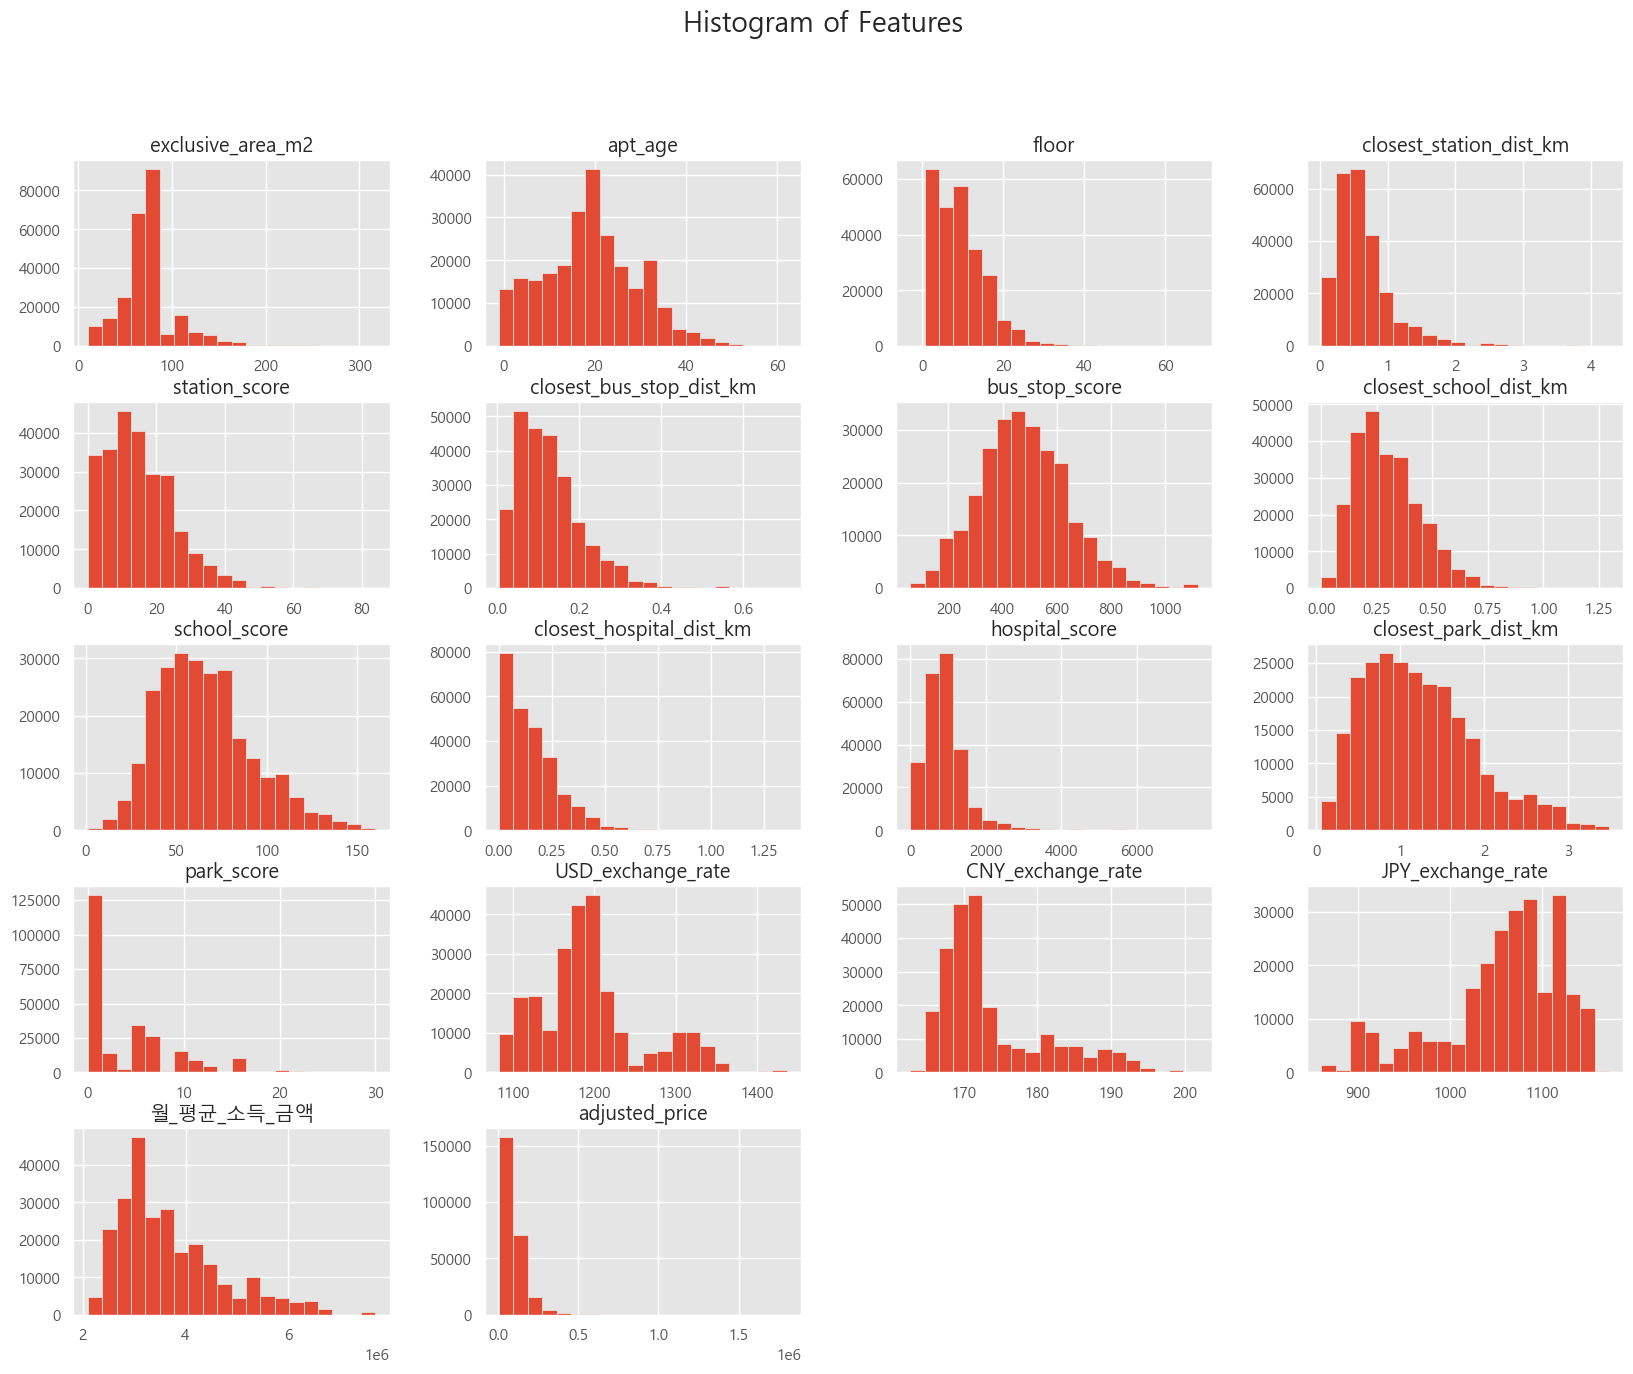

In [346]:
merged_apt_ie[['exclusive_area_m2', 'apt_age', 'floor', 
               'closest_station_dist_km', 'station_score', 
               'closest_bus_stop_dist_km', 'bus_stop_score', 
               'closest_school_dist_km', 'school_score', 
               'closest_hospital_dist_km', 'hospital_score', 
               'closest_park_dist_km', 'park_score', 
               'USD_exchange_rate', 'CNY_exchange_rate', 'JPY_exchange_rate', 
               '월_평균_소득_금액', 'adjusted_price']].hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogram of Features", fontsize=20)
plt.show()


# 지역별 매매가 및 특징 시각화 - 지도 시각화

# 거래량 분석 - 시계열 분석


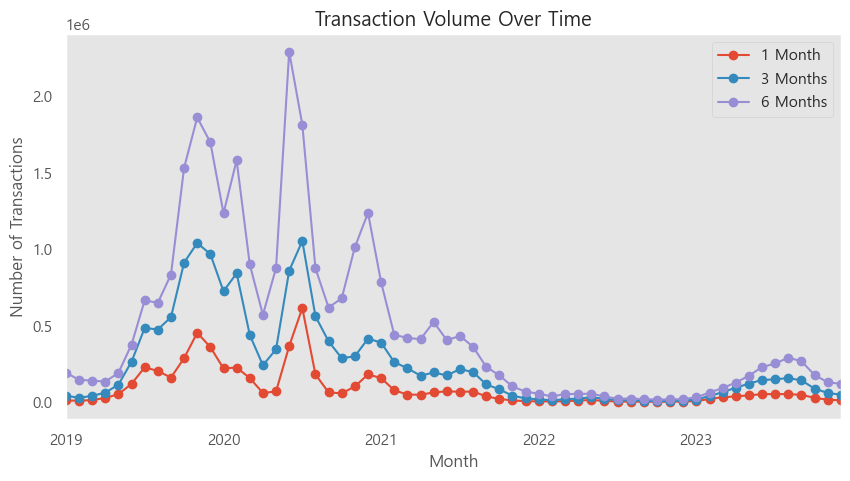

In [350]:
import matplotlib.pyplot as plt

# 거래량 추이
merged_apt_ie['contract_month'] = merged_apt_ie['contract_date'].dt.to_period('M')
monthly_transactions = merged_apt_ie.groupby('contract_month')[['adong_prev_1_month', 'adong_prev_3_months', 'adong_prev_6_months']].sum()

monthly_transactions.plot(figsize=(10, 5), marker='o')
plt.title("Transaction Volume Over Time")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.grid()
plt.legend(["1 Month", "3 Months", "6 Months"])
plt.savefig('transaction_volume.png', transparent=True)  # transparent=True로 배경을 투명하게 설정
plt.show()


In [ ]:
# '구'와 '행정동' 단위로 평균 가격 집계
price_by_dong = merged_apt_ie.groupby(['gu', 'gu_adong'])['adjusted_price'].mean().reset_index()

# GeoDataFrame에 합치기
a_dong_gdf = a_dong_gdf.merge(
    price_by_dong,
    left_on='ADM_NM',   # 행정동 이름 (shapefile의 컬럼 이름)
    right_on='gu_adong',   # 데이터프레임의 행정동 이름
    how='left'
)


In [ ]:
merged_apt_ie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  int16         
 3   gu                        251096 non-null  object        
 4   gu_adong                  251096 non-null  object        
 5   gu_ldong                  251096 non-null  object        
 6   latitude                  251096 non-null  float32       
 7   longitude                 251096 non-null  float32       
 8   brand_label_encoded       251096 non-null  float32       
 9   exclusive_area_m2         251096 non-null  float32       
 10  apt_age                   251096 non-null  float32       
 11  floor                     251096 non-null  float32       
 12  cl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251096 entries, 0 to 251095
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NO                        251096 non-null  object        
 1   contract_date             251096 non-null  datetime64[ns]
 2   year                      251096 non-null  int16         
 3   gu                        251096 non-null  object        
 4   gu_adong                  251096 non-null  object        
 5   gu_ldong                  251096 non-null  object        
 6   latitude                  251096 non-null  float32       
 7   longitude                 251096 non-null  float32       
 8   brand_label_encoded       251096 non-null  float32       
 9   exclusive_area_m2         251096 non-null  float32       
 10  apt_age                   251096 non-null  float32       
 11  floor                     251096 non-null  float32       
 12  cl

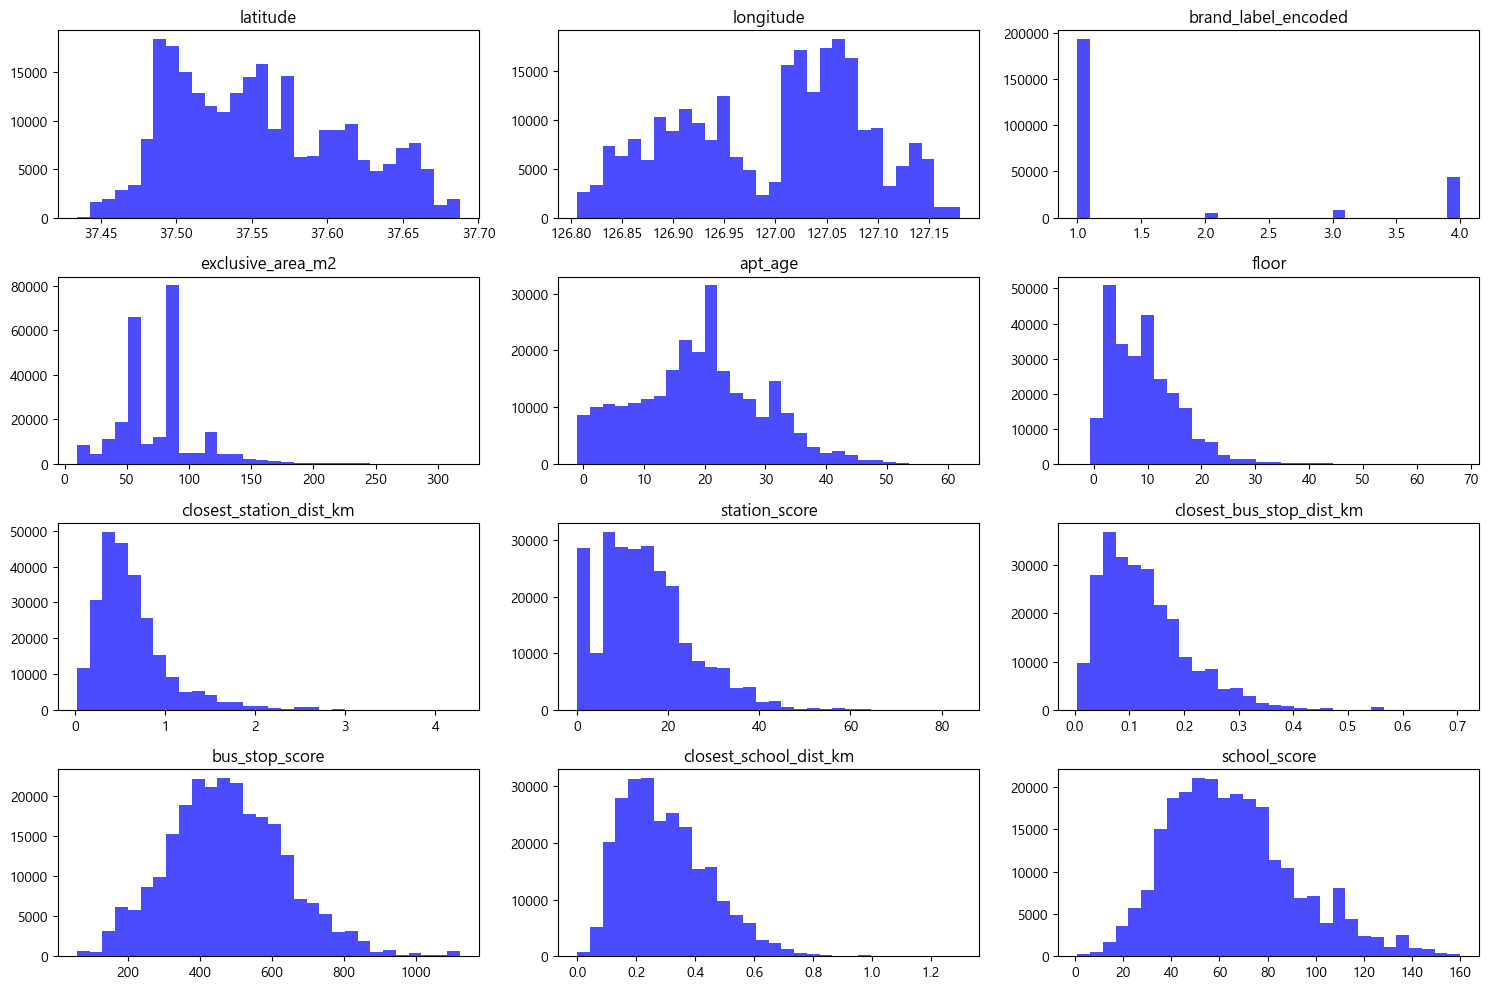

In [ ]:
# 데이터프레임 기본 정보 확인
merged_apt_ie.info()

# 데이터 요약 통계 확인
print("\n기본 통계 요약:")
print(merged_apt_ie.describe(include='all'))  # 모든 데이터 타입 포함

# 데이터프레임의 결측값 확인
print("\n결측값 확인:")
print(merged_apt_ie.isnull().sum())

# 특정 열의 고유값 확인 (카테고리 데이터 확인용)
categorical_cols = ['gu', 'Q_1', 'Q_2', 'Q_3', 'Q_4']
for col in categorical_cols:
    print(f"\n{col} 고유값 확인:")
    print(merged_apt_ie[col].value_counts())

# datetime 열에서 연도와 월 분리 확인
merged_apt_ie['year'] = merged_apt_ie['contract_date'].dt.year
merged_apt_ie['month'] = merged_apt_ie['contract_date'].dt.month

# 숫자형 데이터 분포 시각화 (히스토그램)
import matplotlib.pyplot as plt
numerical_cols = merged_apt_ie.select_dtypes(include=['float32', 'float64', 'int16']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:12], start=1):  # 첫 12개의 숫자형 열만 시각화
    plt.subplot(4, 3, i)
    plt.hist(merged_apt_ie[col], bins=30, alpha=0.7, color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()


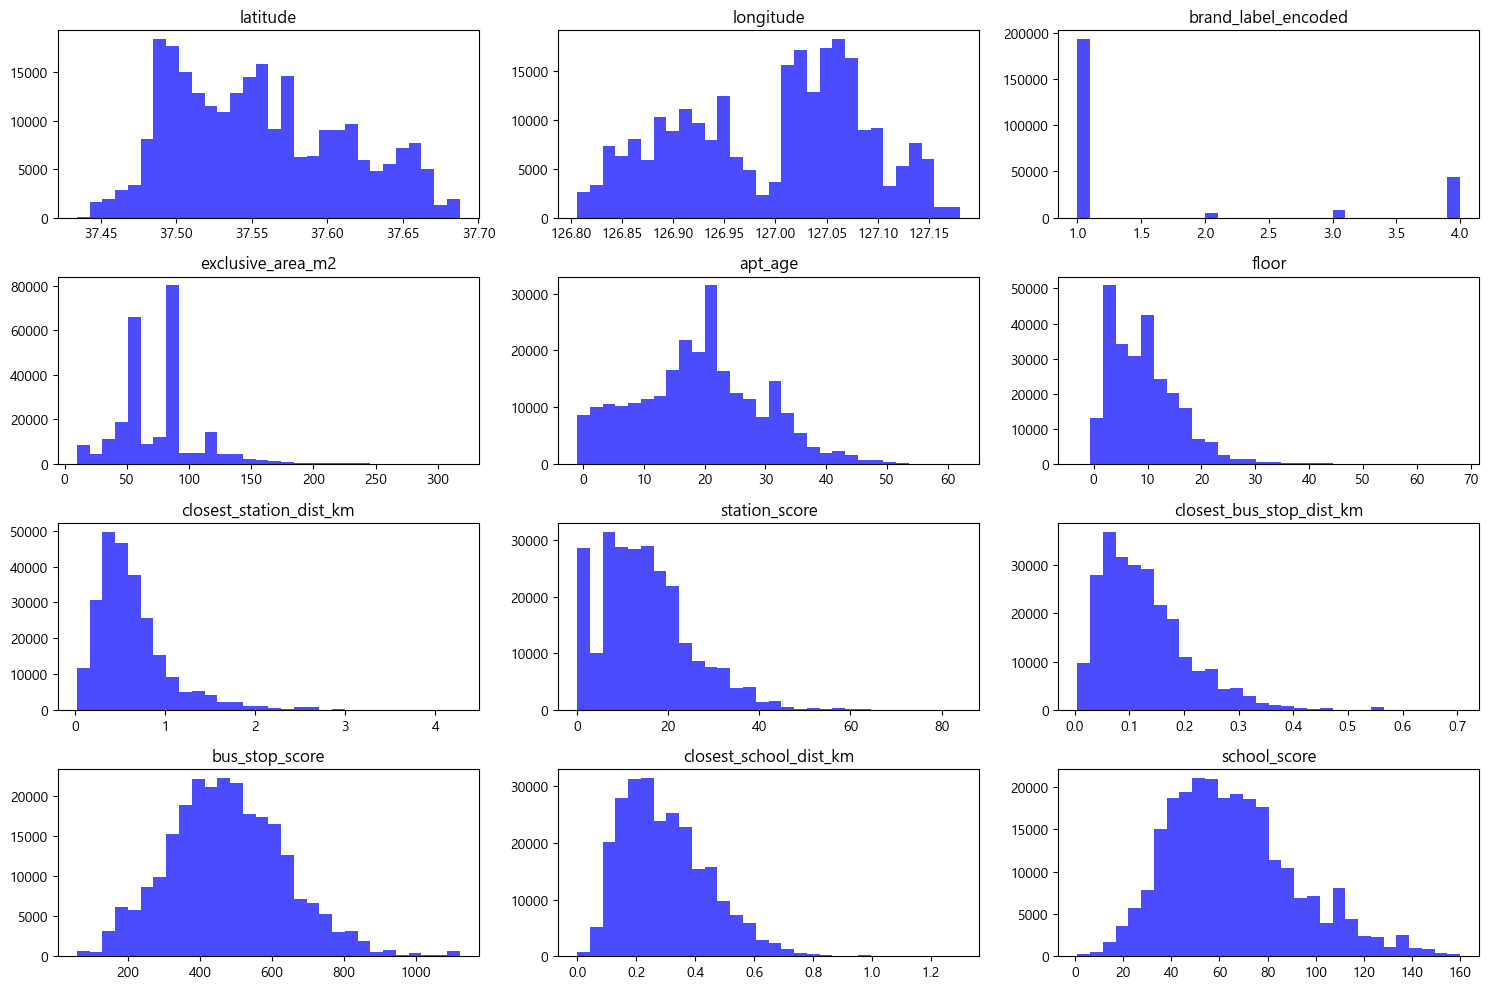

In [ ]:
import matplotlib.pyplot as plt

# 숫자형 데이터 분포 시각화
numerical_cols = merged_apt_ie.select_dtypes(include=['float32', 'float64', 'int16']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:12], start=1):  # 첫 12개 열만 시각화
    plt.subplot(4, 3, i)
    plt.hist(merged_apt_ie[col], bins=30, alpha=0.7, color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()


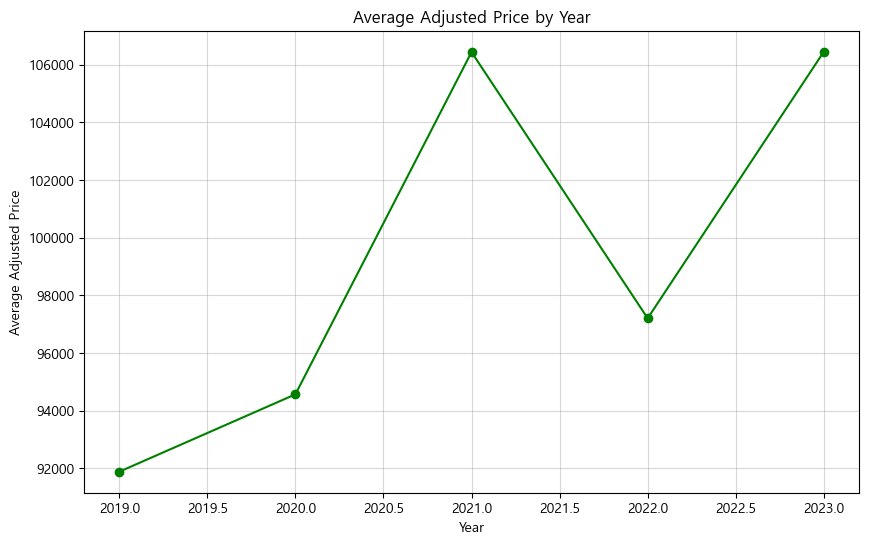

In [ ]:
# 연도별 평균 가격 계산
yearly_price = merged_apt_ie.groupby('year')['adjusted_price'].mean()

# 연도별 평균 가격 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_price.index, yearly_price.values, marker='o', linestyle='-', color='green')
plt.title("Average Adjusted Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Adjusted Price")
plt.grid(alpha=0.5)
plt.show()


In [ ]:
year = [2019, 2020, 2021, 2022, 2023]
price_year_gu = merged_apt_ie.groupby(['year', 'gu_adong'])['adjusted_price'].mean()
price_year = merged_apt_ie.groupby(['year'])['adjusted_price'].mean()
count_year = merged_apt_ie.groupby(['year'])['NO'].count()

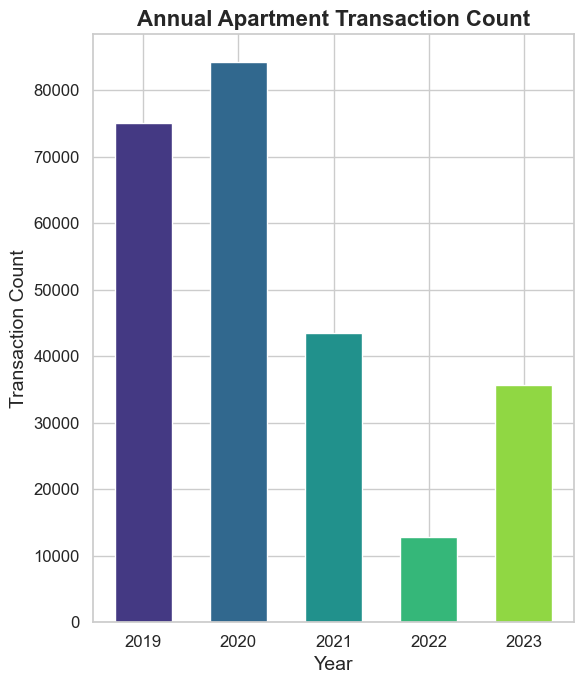

In [ ]:
# 색상 목록 설정 (막대마다 다른 색상)
colors = sns.color_palette("viridis", len(years))

# 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(6, 7))

# 각 막대마다 색상을 다르게 설정하여 막대 그래프 그리기
bars = plt.bar(year, count_year, color=colors, width=0.6)

# 제목과 레이블 설정
plt.title('Annual Apartment Transaction Count', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)

# x축, y축의 글꼴 크기 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 저장 (배경 투명)
plt.tight_layout()
plt.savefig('bar_chart_with_different_colors.png', transparent=True)  # transparent=True로 배경을 투명하게 설정

# 그래프 표시
plt.show()

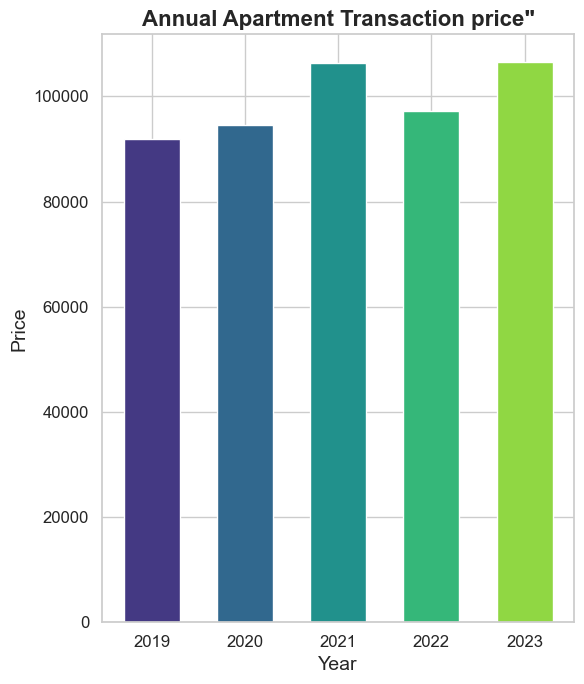

In [ ]:
# 색상 목록 설정 (막대마다 다른 색상)
colors = sns.color_palette("viridis", len(years))

# 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(6, 7))

# 각 막대마다 색상을 다르게 설정하여 막대 그래프 그리기
bars = plt.bar(year, price_year, color=colors, width=0.6)

# 제목과 레이블 설정
plt.title('Annual Apartment Transaction price"', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)

# x축, y축의 글꼴 크기 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 저장 (배경 투명)
plt.tight_layout()
plt.savefig('bar_chart_with_different_colors_price.png', transparent=True)  # transparent=True로 배경을 투명하게 설정

# 그래프 표시
plt.show()

In [ ]:
real_yearly_price = apt_real_all.groupby('year')['price_man_won'].mean()


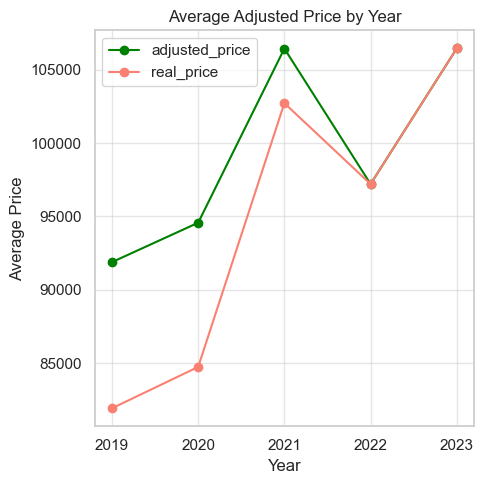

In [ ]:
# 연도별 평균 가격 계산
yearly_price = merged_apt_ie.groupby('year')['adjusted_price'].mean()

# 연도별 평균 가격 시각화
plt.figure(figsize=(5, 5))
plt.plot(yearly_price.index, yearly_price.values, marker='o', linestyle='-', color='green', label = 'adjusted_price')
plt.plot(real_yearly_price.index, real_yearly_price.values, marker='o', linestyle='-', color='salmon', label='real_price')
plt.title("Average Adjusted Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(alpha=0.5)
# 그래프 저장 (배경 투명)
plt.tight_layout()
plt.legend()
plt.savefig('chart_yearly_price.png', transparent=True)  # transparent=True로 배경을 투명하게 설정
plt.show()

In [ ]:
apt_2019 = pd.read_csv('../1.Real_Estate_Market_Data/Actual_Transaction_Price/아파트(매매)_실거래가_2019.csv', encoding='cp949')


In [ ]:
# 'contract_date'가 datetime 형식인지 확인 (만약 아니라면, datetime으로 변환)
merged_apt_ie['contract_date'] = pd.to_datetime(merged_apt_ie['contract_date'])

# 연도와 월을 기준으로 그룹화
monthly_rate = merged_apt_ie.groupby(merged_apt_ie['contract_date'].dt.to_period('M'))['한국은행_기준금리'].mean()
monthly_usd = merged_apt_ie.groupby(merged_apt_ie['contract_date'].dt.to_period('M'))['USD_exchange_rate'].mean()
monthly_cny = merged_apt_ie.groupby(merged_apt_ie['contract_date'].dt.to_period('M'))['CNY_exchange_rate'].mean()
monthly_jpy = merged_apt_ie.groupby(merged_apt_ie['contract_date'].dt.to_period('M'))['JPY_exchange_rate'].mean()


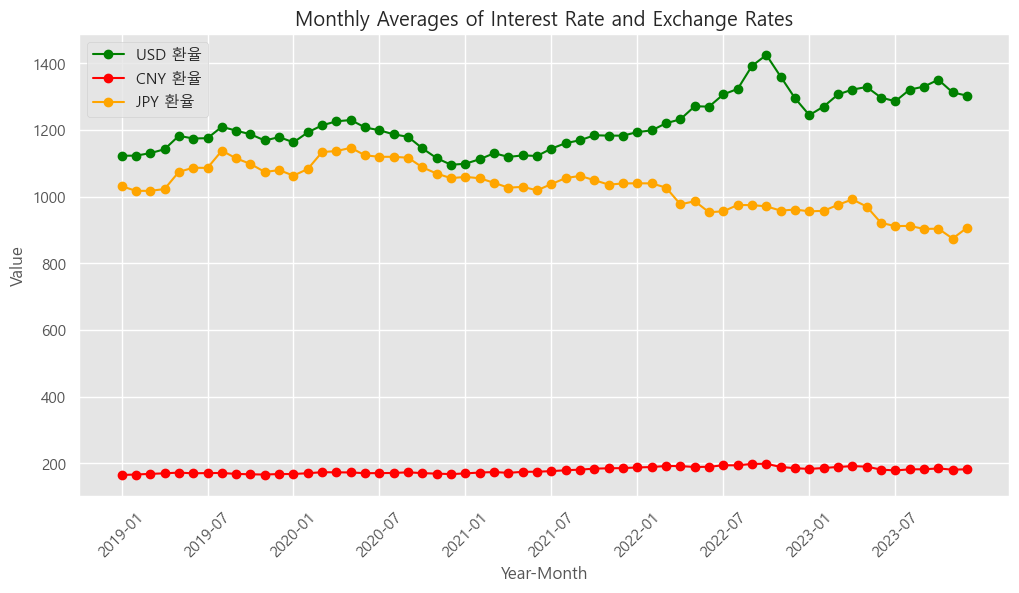

In [ ]:
# 맷플롯립 한글 사용 가능
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 선 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 데이터를 선 그래프로 추가
plt.plot(monthly_usd.index.astype(str), monthly_usd.values, label='USD 환율', color='green', marker='o')
plt.plot(monthly_cny.index.astype(str), monthly_cny.values, label='CNY 환율', color='red', marker='o')
plt.plot(monthly_jpy.index.astype(str), monthly_jpy.values, label='JPY 환율', color='orange', marker='o')

# 그래프 제목과 축 레이블 추가
plt.title('Monthly Averages of Interest Rate and Exchange Rates')
plt.xlabel('Year-Month')
plt.ylabel('Value')

# x축 레이블을 6개월마다 표시
plt.xticks(
    ticks=range(0, len(monthly_rate), 6),  # 6개월마다 표시
    labels=monthly_rate.index.astype(str)[::6],  # 6개월마다의 인덱스 레이블
    rotation=45  # x축 레이블을 45도 회전
)

# 범례 추가
plt.legend()

# 그래프 배경을 투명하게 설정
plt.grid(True)

# 그래프 배경을 투명하게 저장
plt.savefig('time_series_plot.png', transparent=True)

# 그래프 표시
plt.show()


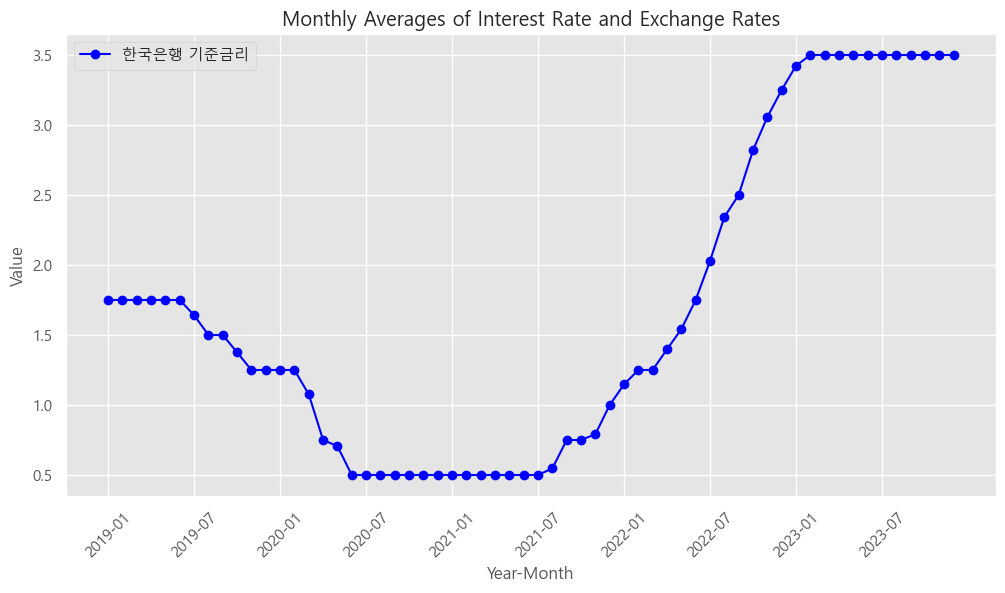

In [ ]:
# 맷플롯립 한글 사용 가능
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 선 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 데이터를 선 그래프로 추가
plt.plot(monthly_rate.index.astype(str), monthly_rate.values, label='한국은행 기준금리', color='blue', marker='o')

# 그래프 제목과 축 레이블 추가
plt.title('Monthly Averages of Interest Rate and Exchange Rates')
plt.xlabel('Year-Month')
plt.ylabel('Value')

# x축 레이블을 6개월마다 표시
plt.xticks(
    ticks=range(0, len(monthly_rate), 6),  # 6개월마다 표시
    labels=monthly_rate.index.astype(str)[::6],  # 6개월마다의 인덱스 레이블
    rotation=45  # x축 레이블을 45도 회전
)

# 범례 추가
plt.legend()

# 그래프 배경을 투명하게 설정
plt.grid(True)

# 그래프 배경을 투명하게 저장
plt.savefig('time_series_plot_rate.png', transparent=True)

# 그래프 표시
plt.show()


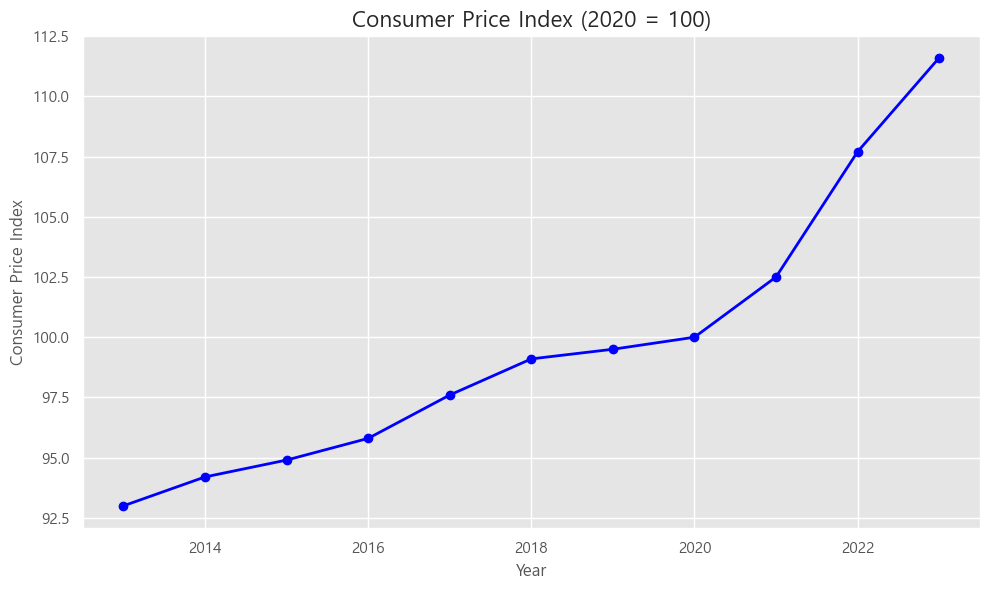

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 소비자물가 총지수 데이터
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Consumer_Price_Index': [93, 94.2, 94.9, 95.8, 97.6, 99.1, 99.5, 100, 102.5, 107.7, 111.6]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Consumer_Price_Index'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

# 그래프 제목 및 레이블 설정
plt.title('Consumer Price Index (2020 = 100)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Consumer Price Index', fontsize=12)

# 배경을 투명하게 설정하고 저장
plt.tight_layout()
plt.savefig('consumer_price_index.png', transparent=True)

# 그래프 표시
plt.show()


In [ ]:
bus_ll.info()
selected_park.info()
hospital_df.info()
merged_school_df.info()
station_2019_df.info()
station_2020_df.info()
station_2021_df.info()
station_2022_df.info()
station_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11290 non-null  int64  
 1   bus_stop_name  11290 non-null  object 
 2   latitude       11290 non-null  float64
 3   longitude      11290 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 352.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   park_name  119 non-null    object 
 1   latitude   119 non-null    float64
 2   longitude  119 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21040 entries, 0 to 21039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hospital_id 

In [ ]:
station_2019_df

,line_name,latitude,longitude
0,우이신설선_신설동,37.576095,127.023242
1,우이신설선_보문,37.585286,127.019381
2,우이신설선_성신여대입구(돈암),37.592467,127.016516
3,우이신설선_정릉,37.603133,127.013396
4,우이신설선_북한산보국문,37.612072,127.008251
...,...,...,...
537,1호선_종로5가,37.570926,127.001849
538,1호선_종로3가,37.570406,126.991847
539,1호선_종각,37.570161,126.982923
540,1호선_시청,37.565715,126.977088


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point


In [ ]:
# 공원 데이터 GeoDataFrame
selected_park['geometry'] = gpd.points_from_xy(selected_park['longitude'], selected_park['latitude'])
park_gdf = gpd.GeoDataFrame(selected_park, geometry='geometry', crs=gu_gdf.crs)

# 병원 데이터 GeoDataFrame
hospital_df['geometry'] = gpd.points_from_xy(hospital_df['longitude'], hospital_df['latitude'])
hospital_gdf = gpd.GeoDataFrame(hospital_df, geometry='geometry', crs=gu_gdf.crs)

# 학교 데이터 GeoDataFrame
merged_school_df['geometry'] = gpd.points_from_xy(merged_school_df['longitude'], merged_school_df['latitude'])
school_gdf = gpd.GeoDataFrame(merged_school_df, geometry='geometry', crs=gu_gdf.crs)

# 버스 데이터 GeoDataFrame
bus_ll['geometry'] = gpd.points_from_xy(bus_ll['longitude'], bus_ll['latitude'])
bus_gdf = gpd.GeoDataFrame(bus_ll, geometry='geometry', crs=gu_gdf.crs)


# 지하철역 데이터 GeoDataFrame (연도별)
def create_station_gdf(df, crs):
    df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])
    return gpd.GeoDataFrame(df, geometry='geometry', crs=crs)

# 딕셔너리로 데이터프레임 관리
station_dfs = {
    2019: station_2019_df,
    2020: station_2020_df,
    2021: station_2021_df,
    2022: station_2022_df,
    2023: station_2023_df,
}

# GeoDataFrame 생성
station_gdfs = {
    year: create_station_gdf(station_dfs[year], gu_gdf.crs)
    for year in range(2019, 2024)
}


In [ ]:
def count_in_boundary(data_gdf, boundary_gdf, boundary_column):
    joined = gpd.sjoin(data_gdf, boundary_gdf, how='inner', predicate='within')
    return joined.groupby(boundary_column).size().reset_index(name='count')

# 구별 개수 집계
park_count_by_gu = count_in_boundary(park_gdf, gu_gdf, 'SGG_NM')
hospital_count_by_gu = count_in_boundary(hospital_gdf, gu_gdf, 'SGG_NM')
school_count_by_gu = count_in_boundary(school_gdf, gu_gdf, 'SGG_NM')
bus_count_by_gu = count_in_boundary(bus_gdf, gu_gdf, 'SGG_NM')

station_counts_by_year = {
    year: count_in_boundary(station_gdfs[year], gu_gdf, 'SGG_NM')
    for year in range(2019, 2024)
}

# 구 데이터 병합
gu_summary = gu_gdf.copy()
gu_summary = gu_summary.merge(park_count_by_gu.rename(columns={'count': '공원'}), on='SGG_NM', how='left')
gu_summary = gu_summary.merge(hospital_count_by_gu.rename(columns={'count': '병원'}), on='SGG_NM', how='left')
gu_summary = gu_summary.merge(school_count_by_gu.rename(columns={'count': '학교'}), on='SGG_NM', how='left')
gu_summary = gu_summary.merge(bus_count_by_gu.rename(columns={'count': '버스정류장'}), on='SGG_NM', how='left')

for year, count_df in station_counts_by_year.items():
    gu_summary = gu_summary.merge(count_df.rename(columns={'count': f'지하철_{year}'}), on='SGG_NM', how='left')

gu_summary = gu_summary.fillna(0)  # 결측값 처리


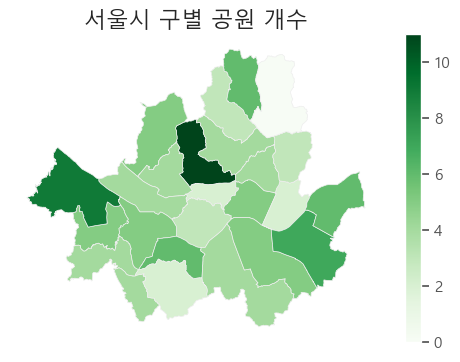

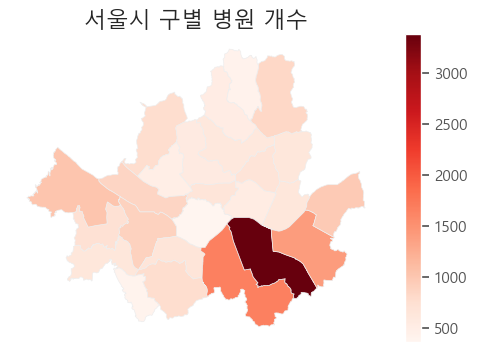

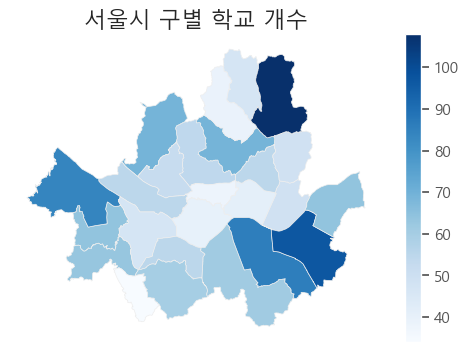

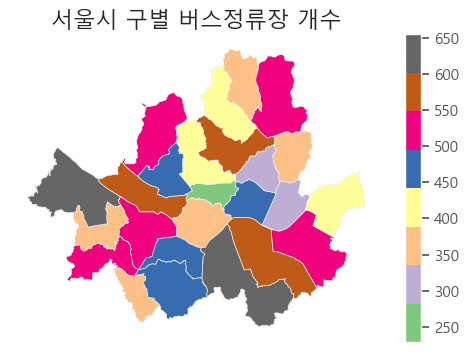

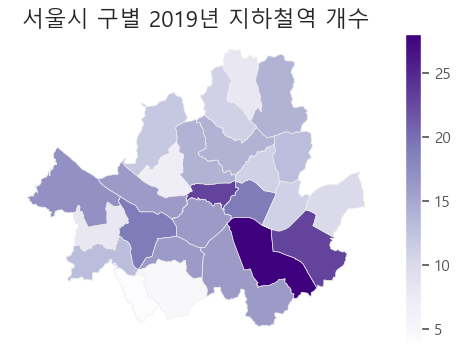

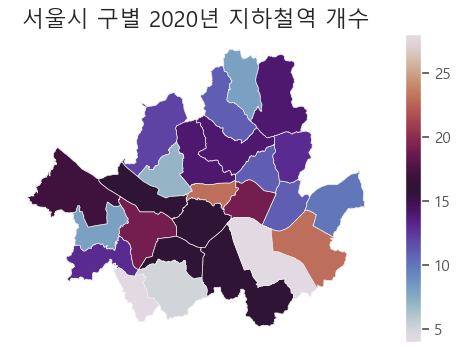

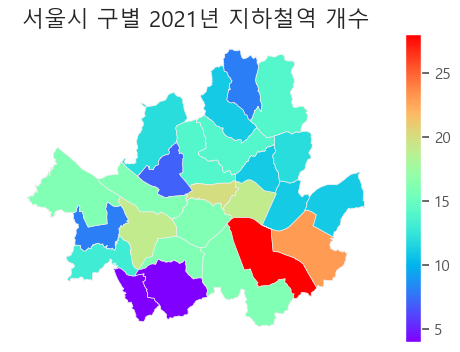

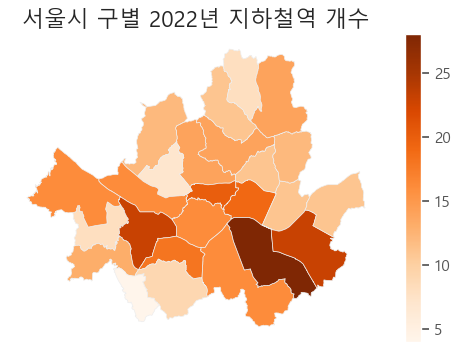

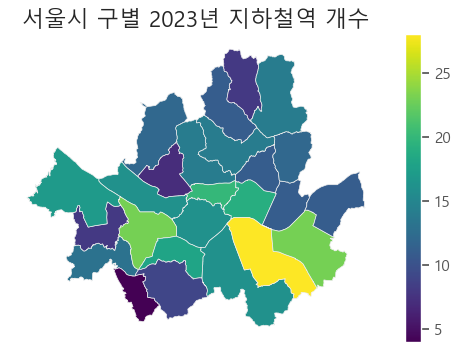

In [351]:
# 공원 데이터 투명 배경 저장
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
gu_summary.plot(column='공원', ax=ax, legend=True, cmap='Greens')
ax.set_title('서울시 구별 공원 개수', fontsize=16)
plt.axis('off')
plt.savefig('seoul_parks.png', dpi=300, transparent=True)  # 투명 배경 저장
plt.show()

# 병원 데이터 투명 배경 저장
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
gu_summary.plot(column='병원', ax=ax, legend=True, cmap='Reds')
ax.set_title('서울시 구별 병원 개수', fontsize=16)
plt.axis('off')
plt.savefig('seoul_hospitals.png', dpi=300, transparent=True)  # 투명 배경 저장
plt.show()

# 학교 데이터 투명 배경 저장
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
gu_summary.plot(column='학교', ax=ax, legend=True, cmap='Blues')
ax.set_title('서울시 구별 학교 개수', fontsize=16)
plt.axis('off')
plt.savefig('seoul_schools.png', dpi=300, transparent=True)  # 투명 배경 저장
plt.show()

# 버스정류장 데이터 투명 배경 저장
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
gu_summary.plot(column='버스정류장', ax=ax, legend=True, cmap='Accent')
ax.set_title('서울시 구별 버스정류장 개수', fontsize=16)
plt.axis('off')
plt.savefig('seoul_busstop.png', dpi=300, transparent=True)  # 투명 배경 저장
plt.show()


# 연도별 색상 지정
subway_cmaps = {
    2019: 'Purples',
    2020: 'twilight',
    2021: 'rainbow',
    2022: 'Oranges',
    2023: 'viridis'
}
for year in range(2019, 2024):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    column_name = f'지하철_{year}'
    cmap = subway_cmaps[year]  # 연도별 컬러맵 선택
    gu_summary.plot(column=column_name, ax=ax, legend=True, cmap=cmap)
    ax.set_title(f'서울시 구별 {year}년 지하철역 개수', fontsize=16)
    plt.axis('off')
    plt.savefig(f'seoul_subway_{year}.png', dpi=300, transparent=True)
    plt.show()


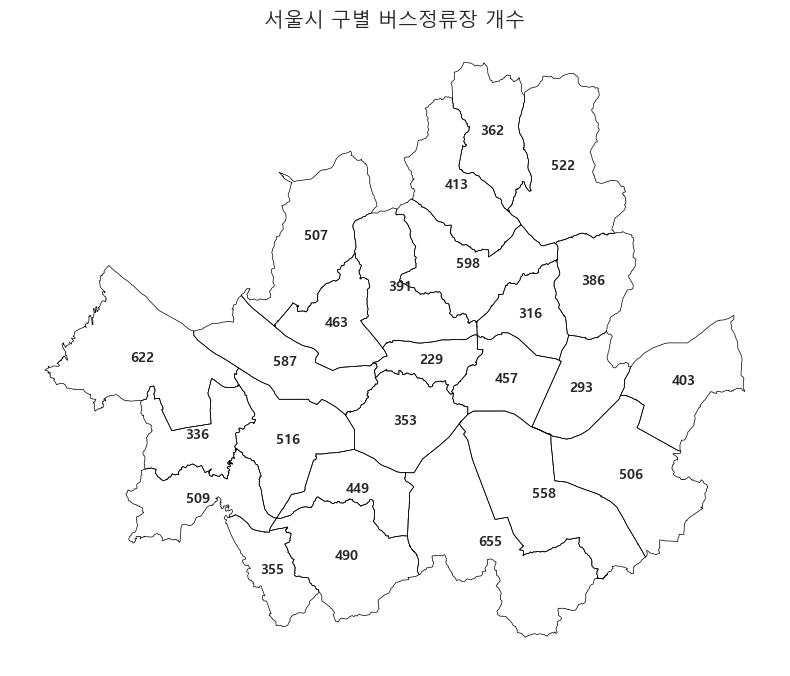

구별 버스정류장 개수:
SGG_NM
서울특별시 서초구     655
서울특별시 강서구     622
서울특별시 성북구     598
서울특별시 마포구     587
서울특별시 강남구     558
서울특별시 노원구     522
서울특별시 영등포구    516
서울특별시 구로구     509
서울특별시 은평구     507
서울특별시 송파구     506
서울특별시 관악구     490
서울특별시 서대문구    463
서울특별시 성동구     457
서울특별시 동작구     449
서울특별시 강북구     413
서울특별시 강동구     403
서울특별시 종로구     391
서울특별시 중랑구     386
서울특별시 도봉구     362
서울특별시 금천구     355
서울특별시 용산구     353
서울특별시 양천구     336
서울특별시 동대문구    316
서울특별시 광진구     293
서울특별시 중구      229
dtype: int64


In [352]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 버스정류장 데이터를 지오데이터프레임으로 변환
bus_gdf = gpd.GeoDataFrame(
    bus_ll, 
    geometry=gpd.points_from_xy(bus_ll.longitude, bus_ll.latitude), 
    crs="EPSG:4326"
)

# 공간 조인을 통해 각 구별 버스정류장 개수 계산
gu_bus_count = gpd.sjoin(bus_gdf, gu_gdf, how='inner', predicate='within')
gu_bus_summary = gu_bus_count.groupby('SGG_NM').size()

# 시각화
plt.figure(figsize=(8, 8))

# 구 경계 그리기
gu_gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='black')

# 각 구에 버스정류장 수 표시
for idx, row in gu_gdf.iterrows():
    bus_count = gu_bus_summary.get(row['SGG_NM'], 0)
    plt.annotate(f'{bus_count}', 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), 
                 ha='center', va='center',
                 fontweight='bold')

plt.title('서울시 구별 버스정류장 개수')
plt.axis('off')
plt.tight_layout()
plt.show()

# 구별 버스정류장 수 출력
print("구별 버스정류장 개수:")
print(gu_bus_summary.sort_values(ascending=False))

In [ ]:
bus_ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11290 non-null  int64  
 1   bus_stop_name  11290 non-null  object 
 2   latitude       11290 non-null  float64
 3   longitude      11290 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 352.9+ KB


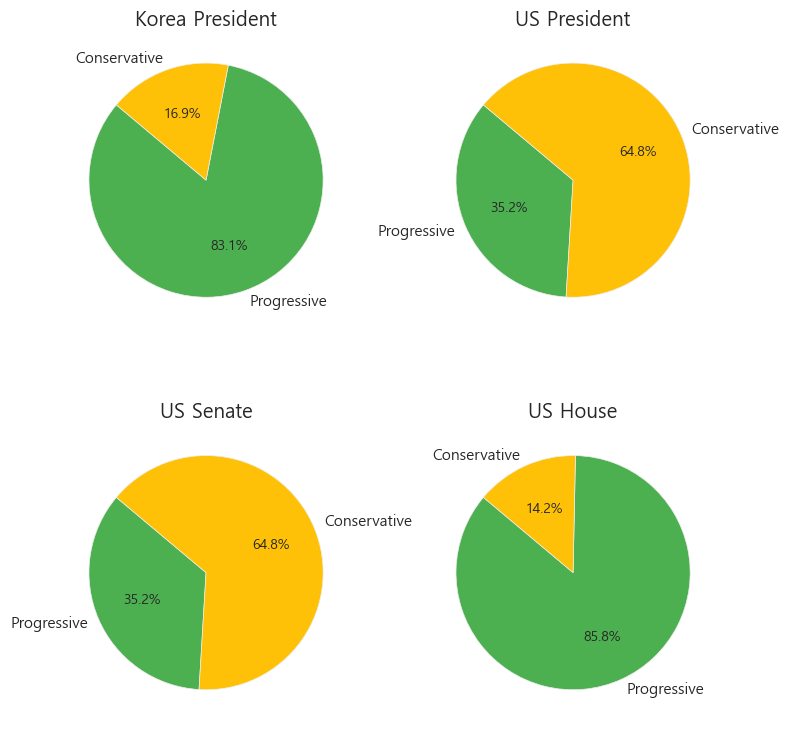

In [353]:
import matplotlib.pyplot as plt

# 진보/보수 비율 계산
korea_president = merged_apt_ie[['K_progressive_president', 'K_conservative_president']].sum()
us_president = merged_apt_ie[['A_progressive_president', 'A_conservative_president']].sum()
us_senate = merged_apt_ie[['A_progressive_senate', 'A_conservative_senate']].sum()
us_house = merged_apt_ie[['A_progressive_house', 'A_conservative_house']].sum()

data = {
    "Korea President": korea_president,
    "US President": us_president,
    "US Senate": us_senate,
    "US House": us_house
}

# 색상 지정
colors = ['#4CAF50', '#FFC107']  # 진보, 보수

# 원형 차트 그리기
fig, axes = plt.subplots(2, 2, figsize=(8, 8), subplot_kw={'aspect': 'equal'})
for ax, (title, values) in zip(axes.flatten(), data.items()):
    ax.pie(values, labels=['Progressive', 'Conservative'], autopct='%1.1f%%', colors=colors, startangle=140)
    ax.set_title(title)

# 투명 배경 저장
plt.tight_layout()
plt.savefig('political_affiliations_multiple_pie.png', dpi=300, transparent=True)
plt.show()


In [ ]:
print("Progressive period (US affiliations):")
print(progressive_us)

print("Conservative period (US affiliations):")
print(conservative_us)


Progressive period (US affiliations):
A_progressive_president     3
A_conservative_president    0
A_progressive_senate        2
A_conservative_senate       1
A_progressive_house         2
A_conservative_house        1
dtype: int64
Conservative period (US affiliations):
A_progressive_president     0
A_conservative_president    2
A_progressive_senate        1
A_conservative_senate       1
A_progressive_house         2
A_conservative_house        0
dtype: int64


In [354]:
# 조사 기간 설정
start_date = '2019-01-01'
end_date = '2023-12-31'

# 조사 기간으로 데이터 필터링
filtered_df = merged_apt_ie[
    (merged_apt_ie['contract_date'] >= start_date) & 
    (merged_apt_ie['contract_date'] <= end_date)
]


In [355]:
# 성향별 카운트 계산
political_counts = filtered_df[
    ['K_progressive_president', 'K_conservative_president',
     'A_progressive_president', 'A_conservative_president',
     'A_progressive_senate', 'A_conservative_senate',
     'A_progressive_house', 'A_conservative_house']
].sum()


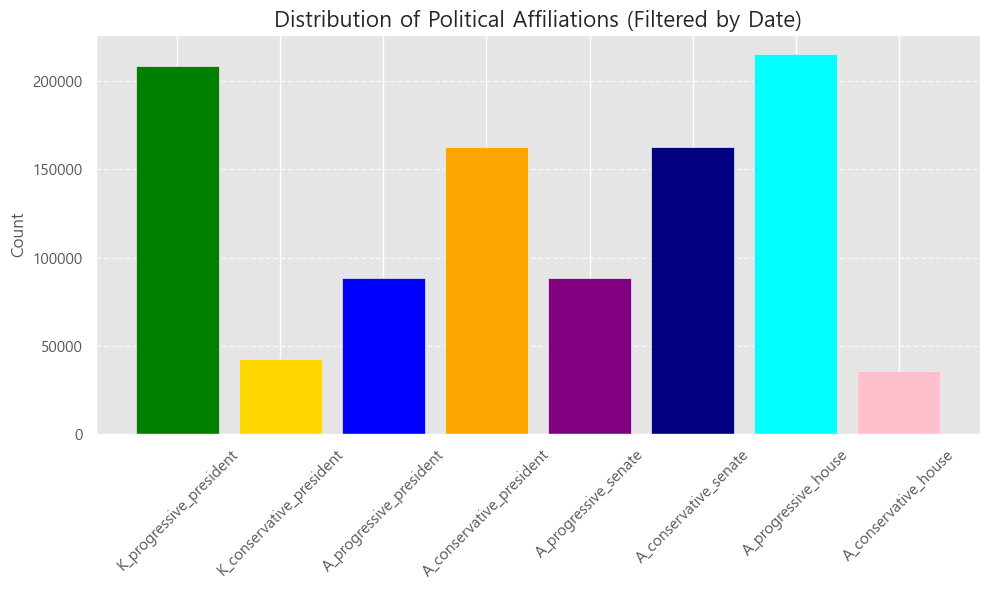

In [356]:
import matplotlib.pyplot as plt

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(political_counts.index, political_counts.values, color=['green', 'gold', 'blue', 'orange', 'purple', 'navy', 'cyan', 'pink'])
plt.title("Distribution of Political Affiliations (Filtered by Date)", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 배경 투명하게 저장
plt.savefig("filtered_political_affiliations.png", transparent=True)
plt.show()


In [357]:
# contract_date를 datetime 형식으로 변환
filtered_df['contract_date'] = pd.to_datetime(filtered_df['contract_date'])


In [358]:
# 성향별로 날짜별 평균 계산
political_columns = [
    'K_progressive_president', 'K_conservative_president',
    'A_progressive_president', 'A_conservative_president',
    'A_progressive_senate', 'A_conservative_senate',
    'A_progressive_house', 'A_conservative_house'
]

# 날짜별로 그룹화하여 평균 계산
daily_political_data = filtered_df.groupby('contract_date')[political_columns].mean()


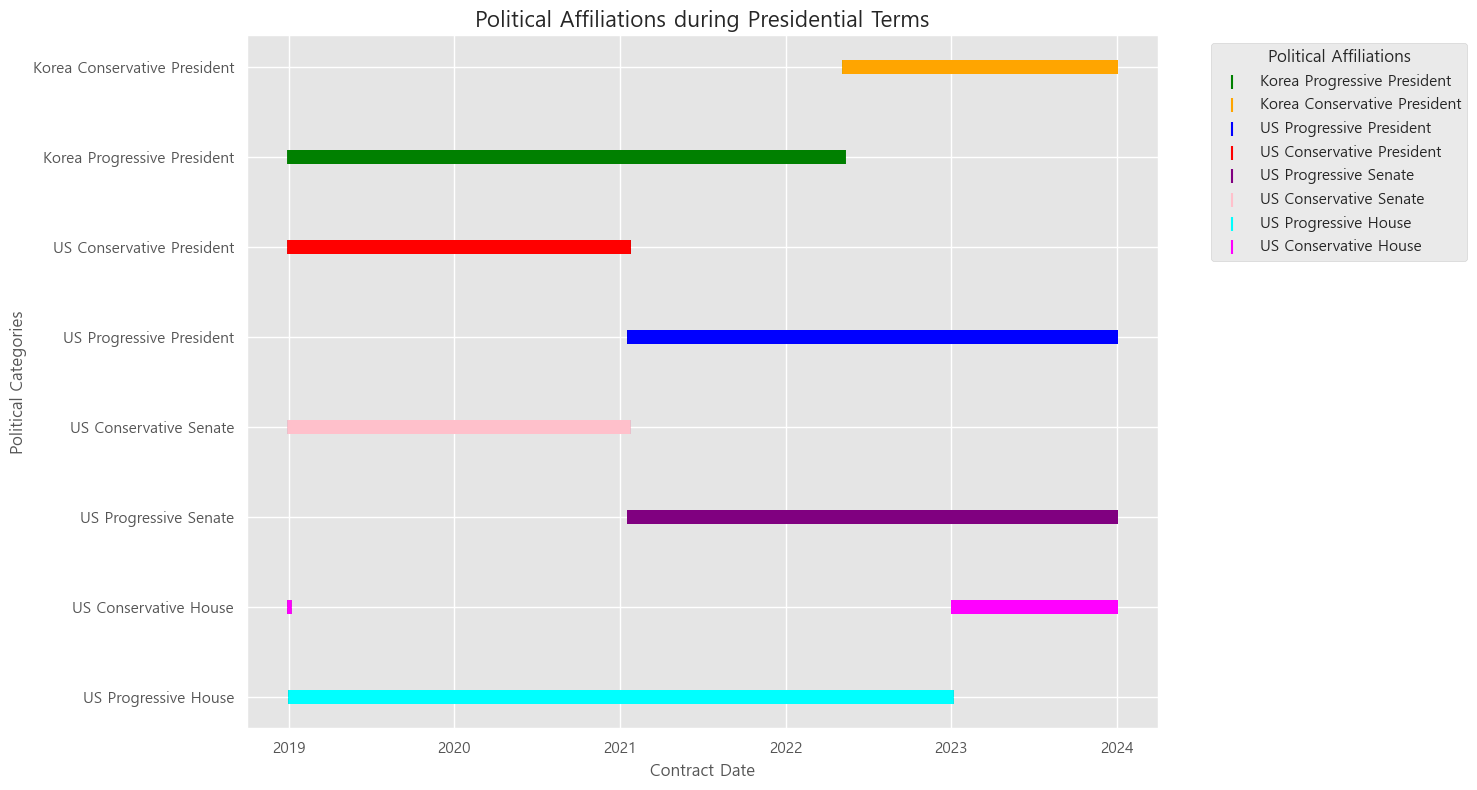

In [365]:
import matplotlib.pyplot as plt
import pandas as pd

# 계약 날짜를 datetime 형식으로 변환
filtered_df['contract_date'] = pd.to_datetime(filtered_df['contract_date'])

# 한국과 미국 대통령, 상원, 하원의 집권 기간만 표시하도록 필터링
# 한국 대통령 진보/보수 집권 기간
korea_progressive_period = filtered_df[filtered_df['K_progressive_president'] == 1]
korea_conservative_period = filtered_df[filtered_df['K_conservative_president'] == 1]

# 미국 대통령 진보/보수 집권 기간
usa_progressive_president_period = filtered_df[filtered_df['A_progressive_president'] == 1]
usa_conservative_president_period = filtered_df[filtered_df['A_conservative_president'] == 1]

# 미국 상원 진보/보수 집권 기간
usa_progressive_senate_period = filtered_df[filtered_df['A_progressive_senate'] == 1]
usa_conservative_senate_period = filtered_df[filtered_df['A_conservative_senate'] == 1]

# 미국 하원 진보/보수 집권 기간
usa_progressive_house_period = filtered_df[filtered_df['A_progressive_house'] == 1]
usa_conservative_house_period = filtered_df[filtered_df['A_conservative_house'] == 1]

# 날짜별로 범주를 표시할 y축을 정의
categories = [
    "US Progressive House",
    "US Conservative House",
    "US Progressive Senate",
    "US Conservative Senate",
    "US Progressive President",
    "US Conservative President",
    "Korea Progressive President",
    "Korea Conservative President"
]

# y축을 범주에 맞게 정수로 매핑
category_mapping = {cat: idx for idx, cat in enumerate(categories)}

# 시각화할 기간 데이터 준비
plt.figure(figsize=(15, 8))

# 한국 대통령 진보 집권 기간에 대한 점 표시
plt.scatter(korea_progressive_period['contract_date'], 
            [category_mapping["Korea Progressive President"]] * len(korea_progressive_period),
            label="Korea Progressive President", color='green', s=100, marker='|')

# 한국 대통령 보수 집권 기간에 대한 점 표시
plt.scatter(korea_conservative_period['contract_date'], 
            [category_mapping["Korea Conservative President"]] * len(korea_conservative_period),
            label="Korea Conservative President", color='orange', s=100, marker='|')

# 미국 대통령 진보 집권 기간에 대한 점 표시
plt.scatter(usa_progressive_president_period['contract_date'], 
            [category_mapping["US Progressive President"]] * len(usa_progressive_president_period),
            label="US Progressive President", color='blue', s=100, marker='|')

# 미국 대통령 보수 집권 기간에 대한 점 표시
plt.scatter(usa_conservative_president_period['contract_date'], 
            [category_mapping["US Conservative President"]] * len(usa_conservative_president_period),
            label="US Conservative President", color='red', s=100, marker='|')

# 미국 상원 진보 집권 기간에 대한 점 표시
plt.scatter(usa_progressive_senate_period['contract_date'], 
            [category_mapping["US Progressive Senate"]] * len(usa_progressive_senate_period),
            label="US Progressive Senate", color='purple', s=100, marker='|')

# 미국 상원 보수 집권 기간에 대한 점 표시
plt.scatter(usa_conservative_senate_period['contract_date'], 
            [category_mapping["US Conservative Senate"]] * len(usa_conservative_senate_period),
            label="US Conservative Senate", color='pink', s=100, marker='|')

# 미국 하원 진보 집권 기간에 대한 점 표시
plt.scatter(usa_progressive_house_period['contract_date'], 
            [category_mapping["US Progressive House"]] * len(usa_progressive_house_period),
            label="US Progressive House", color='cyan', s=100, marker='|')

# 미국 하원 보수 집권 기간에 대한 점 표시
plt.scatter(usa_conservative_house_period['contract_date'], 
            [category_mapping["US Conservative House"]] * len(usa_conservative_house_period),
            label="US Conservative House", color='magenta', s=100, marker='|')

# 그래프 제목, 레이블 설정
plt.title("Political Affiliations during Presidential Terms", fontsize=16)
plt.xlabel("Contract Date", fontsize=12)
plt.ylabel("Political Categories", fontsize=12)

# y축 범주 설정
plt.yticks(range(len(categories)), categories)

# 범례 설정
plt.legend(title="Political Affiliations", bbox_to_anchor=(1.05, 1), loc='upper left')

# 배경 투명하게 저장
plt.tight_layout()
plt.savefig("political_affiliations_terms.png", transparent=True)
plt.show()
